# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.





## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

In [2]:
from sklearn import preprocessing, pipeline, model_selection, metrics
from sklearn import decomposition, manifold
from sklearn import cluster, mixture

## 1. Знакомство со структурой данных

In [24]:
data = pd.read_csv(
    "./data/data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice CustomerID         Country  
0  12/1/2010 8:26       2.55      17850  United Kingdom  
1  12/1/2010 8:26       3.39      17850  United Kingdom  
2  12/1/2010 8:26       2.75      17850  United Kingdom  
3  12/1/2010 8:26       3.39      17850  United Kingdom  
4  12/1/2010 8:26       3.39      17850  United Kingdom

In [25]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print(f"Date interval: {data['InvoiceDate'].dt.date.min()} to {data['InvoiceDate'].dt.date.max()}")
print()
data.info()

Date interval: 2010-12-01 to 2011-12-09

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [26]:
print(f'Number of dublicates: {data.duplicated().sum()}')
print()
display(data.describe())
display(data.describe(exclude=['int', 'float']))

data.Country.value_counts().head(10)

Number of dublicates: 5268



Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000

InvoiceNo StockCode                         Description  \
count     541909    541909                              540455   
unique     25900      4070                                4223   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        1114      2313                                2369   
first        NaN       NaN                                 NaN   
last         NaN       NaN                                 NaN   

                InvoiceDate CustomerID         Country  
count                541909     406829          541909  
unique                23260       4372              38  
top     2011-10-31 14:41:00      17841  United Kingdom  
freq                   1114       7983          495478  
first   2010-12-01 08:26:00        NaN             NaN  
last    2011-12-09 12:50:00        NaN             NaN

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: Country, dtype: int64

В наборе имеется данные о 541909 транзакции, данные распределены по 8 признакам, также в данных имеется 5268 дубликатов, есть пропуски в признаках 'Description' и 'CustomerID'. Т.к. 'CustomerID' признак, по которому будем проводить группировку, чтобы произвести кластеризацию, то придется удалить все  транзакции с пропусками в данном столбце.  
Признак 'Quantity' cреднее количество товаров за одну транзакцию составляет 9.55 ед. При этом стандартное отклонение большое - 218, что указывает на значительном рабросе в количестве проданных товаров.Также вероятно присутствует возврат или ошибка при вводе данных, так как минимальное значение отрицательное. Медиана — 3 товара за транзакцию при среднемм 9.55,указывает на наличие выбросов, как и чрезмерно большое максимальное количество товаров за транзакцию - 80995.  
Признак 'UnitPrice' cредняя цена за товар составляет 4.61, медиана 2.08, стандартное отклонение в 96.76 показывают наличие товаров с очень разными ценами, преимущественно дешевых. Отрицательная минимальная цена скорее всего - это ошибка в данных или возврат средств. Максимальная цена — 38,970, что указывает на продажу дорогих предметов или большого количества неочень дорогих, также вероятный выброс.  
Признак 'InvoiceNo' - всего 25900 уникальных заказов, самый частый заказ номер 573585 повторяется 1114, что говорит о наличии в нем 1114 уникальных товаров, возможно выброс.  
Признак 'StockCode' всего 4070 уникальных кодов товаров, самый популярный - 85123A продан 2313 раз.   
Признак 'Description' - описание товара отсутствует у 1454 записей, можно заполнить в соответствии с кодом, если он был в паре с описанием, но скорее всего данный признак не будет участвовать в кластеризации.  
Признак 'InvoiceDate' имеет 23260 уникальных временных отметок в интервале от 2010-12-01 до 2011-12-09, что, вероятно, указывает на определенное количество дат с высокой активностью. Самая популярная дата транзакции — 2011-10-31 14:41:00, в эту минуту было совершенно 1114 транзакций - это саммый частый заказ 573585, вероятно выброс, необходимо посмотреть отдельно.  
Признак 'CustomerID' - 4,372 уникальных клиента, большое количество пропусков, самый часто покупающий клиент 17841, совершил 7983 транзакций.
Признак 'Country'  - товары отправлялись в 38 стран, при этом из 541,909 транзакций 495,478 приходятся на Великобританию.  


Рассмотрим те аномалии, которые были выявлены

In [28]:
display(data[data['Quantity'] < 0].describe(include='all'))
data[data['Quantity'] < 0].head(10)

InvoiceNo StockCode Description      Quantity          InvoiceDate  \
count      10624     10624        9762  10624.000000                10624   
unique      5172      2559        2110           NaN                 4851   
top      C570867         M      Manual           NaN  2011-10-12 16:17:00   
freq         101       244         244           NaN                  101   
first        NaN       NaN         NaN           NaN  2010-12-01 09:41:00   
last         NaN       NaN         NaN           NaN  2011-12-09 11:58:00   
mean         NaN       NaN         NaN    -45.607210                  NaN   
std          NaN       NaN         NaN   1092.214216                  NaN   
min          NaN       NaN         NaN -80995.000000                  NaN   
25%          NaN       NaN         NaN    -10.000000                  NaN   
50%          NaN       NaN         NaN     -2.000000                  NaN   
75%          NaN       NaN         NaN     -1.000000                  NaN   
max          NaN       NaN         NaN     -1.000000                  NaN   

           UnitPrice CustomerID         Country  
count   10624.000000       8905           10624  
unique           NaN       1589              30  
top              NaN      14911  United Kingdom  
freq             NaN        226            9192  
first            NaN        NaN             NaN  
last             NaN        NaN             NaN  
mean       42.308012        NaN             NaN  
std       623.481552        NaN             NaN  
min         0.000000        NaN             NaN  
25%         1.060000        NaN             NaN  
50%         2.100000        NaN             NaN  
75%         4.950000        NaN             NaN  
max     38970.000000        NaN             NaN

InvoiceNo StockCode                        Description  Quantity  \
141   C536379         D                           Discount        -1   
154   C536383    35004C    SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556     PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984   PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983   PACK OF 12 BLUE PAISLEY TISSUES        -24   
238   C536391     21980  PACK OF 12 RED RETROSPOT TISSUES        -24   
239   C536391     21484        CHICK GREY HOT WATER BOTTLE       -12   
240   C536391     22557   PLASTERS IN TIN VINTAGE PAISLEY        -12   
241   C536391     22553             PLASTERS IN TIN SKULLS       -24   
939   C536506     22960           JAM MAKING SET WITH JARS        -6   

            InvoiceDate  UnitPrice CustomerID         Country  
141 2010-12-01 09:41:00      27.50      14527  United Kingdom  
154 2010-12-01 09:49:00       4.65      15311  United Kingdom  
235 2010-12-01 10:24:00       1.65      17548  United Kingdom  
236 2010-12-01 10:24:00       0.29      17548  United Kingdom  
237 2010-12-01 10:24:00       0.29      17548  United Kingdom  
238 2010-12-01 10:24:00       0.29      17548  United Kingdom  
239 2010-12-01 10:24:00       3.45      17548  United Kingdom  
240 2010-12-01 10:24:00       1.65      17548  United Kingdom  
241 2010-12-01 10:24:00       1.65      17548  United Kingdom  
939 2010-12-01 12:38:00       4.25      17897  United Kingdom

Отрицательное количество скорее всего свидетельствует о возврате или скидке.

In [29]:
display(data[data['InvoiceDate'] == '2011-10-31 14:41:00'])
data[data['InvoiceDate'] == '2011-10-31 14:41:00'].describe(include='object')

InvoiceNo     StockCode                         Description  Quantity  \
430237    573585         11001         ASSTD DESIGN RACING CAR PEN         2   
430238    573585         15036           ASSORTED COLOURS SILK FAN        15   
430239    573585         15039                      SANDALWOOD FAN        15   
430240    573585       15056BL             EDWARDIAN PARASOL BLACK         1   
430241    573585        15056N           EDWARDIAN PARASOL NATURAL         1   
...          ...           ...                                 ...       ...   
431346    573585        90209C         PINK ENAMEL+GLASS HAIR COMB         3   
431347    573585        90214S           LETTER "S" BLING KEY RING         1   
431348    573585           DOT                      DOTCOM POSTAGE         1   
431349    573585  gift_0001_20  Dotcomgiftshop Gift Voucher £20.00         1   
431350    573585         23539             WALL ART LOVES' SECRET          2   

               InvoiceDate  UnitPrice CustomerID         Country  
430237 2011-10-31 14:41:00       3.29        NaN  United Kingdom  
430238 2011-10-31 14:41:00       1.63        NaN  United Kingdom  
430239 2011-10-31 14:41:00       1.63        NaN  United Kingdom  
430240 2011-10-31 14:41:00      12.46        NaN  United Kingdom  
430241 2011-10-31 14:41:00      12.46        NaN  United Kingdom  
...                    ...        ...        ...             ...  
431346 2011-10-31 14:41:00       2.07        NaN  United Kingdom  
431347 2011-10-31 14:41:00       0.83        NaN  United Kingdom  
431348 2011-10-31 14:41:00    2019.05        NaN  United Kingdom  
431349 2011-10-31 14:41:00      16.67        NaN  United Kingdom  
431350 2011-10-31 14:41:00       5.79        NaN  United Kingdom  

[1114 rows x 8 columns]

InvoiceNo StockCode                          Description CustomerID  \
count       1114      1114                                 1114          0   
unique         1      1110                                 1108          0   
top       573585     22998  CHARLIE LOLA BLUE HOT WATER BOTTLE         NaN   
freq        1114         2                                    2        NaN   

               Country  
count             1114  
unique               1  
top     United Kingdom  
freq              1114

Аномально большой заказ на 1114 позиций, который был совершен 2011-10-31 14:41:00, скорее всего ошибка, возможно подгрузка ранее не переданных данных, в любом случае рассматривать ее не будем, т.к. у данного заказа отсутствует идентификатор покупателя.

## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. 

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [30]:
print(f'Number of NaNs before deleting NaNs in CustomerID: {data.isnull().sum().sum()}')
data = data.dropna(subset=['CustomerID'])
print(f'Number of NaNs after deleting NaNs in CustomerID: {data.isnull().sum().sum()}')

Number of NaNs before deleting NaNs in CustomerID: 136534
Number of NaNs after deleting NaNs in CustomerID: 0


#### 2.1.2. Дубликаты


In [31]:
data = data.drop_duplicates()
print(f'Data shape: {data.shape}')

Data shape: (401604, 8)


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [32]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})

nb_products_per_basket['return'] = nb_products_per_basket['InvoiceNo'].apply(lambda x: 1 if x.startswith('C') else 0)
return_percent = nb_products_per_basket['return'].mean() *100
print(f'Percent of returned invoices: {round(return_percent, 2)}%')

Percent of returned invoices: 16.47%


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создадим в данных о транзакциях признак `RealQuantityCanceled`. Этот признак будет показывать реальное количество купленного товара за вычетом возвращенного для кажой транзакции. Сама транзакция с отрицательным количеством товара помечается как NaN.

В качестве вспомогательного инструмента будем использовать функцию `get_real_quantity()`. Функция будет в цикле проходить по каждому счету для того же клиента и по такому же коду товара, что и возврат, в обратном порядке от даты возврат и уменьшать количество товара на количество возврата (если больше то до нуля), пока не закончатся либо счета, либо количество возвращемого товра. Сама транзакция с отрицательным количеством товара помечается как NaN для возможности дальнейшего удаления.


In [33]:
def get_real_quantity(data):
    """
    This function creates a feature representing the purchased quantity of goods after subtracting returned items. 
    The function returns a column indicating the quantity of goods purchased minus the returned items for each transaction.
    A transaction with a negative quantityis marked as NaN.

    Args:
        data (DataFrame): table with transactions

    Returns:
        Series: column with the quantity of goods purchased minus the returned items
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = data['Quantity'].copy()    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame для каждого контрагента, который имел отрицательные суммы
        df_temp = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # отрицательные тразакции помечаем np.nan
        if df_temp.shape[0] == 0:
            quantity_canceled.loc[index] = np.nan
        else:
            temp = quantity_canceled.loc[index]
            quantity_canceled.loc[index] = np.nan
            # вычитаем из подходящего заказа количество товара, перебирая транзакции от ближайшей к дате возврата
            for i in df_temp.index[::-1]:
                if (temp+quantity_canceled.loc[i]) >= 0:
                    quantity_canceled.loc[i] += temp
                    break
                else:
                    temp += quantity_canceled.loc[i]
                    quantity_canceled.loc[i] = 0 
                    continue
     
       
    return quantity_canceled


data['RealQuantity'] = get_real_quantity(data)

In [34]:
data = data.dropna(subset=['RealQuantity'])

#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны.

In [35]:

mask = data['StockCode'].str.contains('^[A-Za-z]', regex=True)
display(data[mask]['Description'].unique())
display(data[mask].head(10))

data = data[~mask]

array(['POSTAGE', 'CARRIAGE', 'Manual', 'Bank Charges',
       'PADS TO MATCH ALL CUSHIONS', 'DOTCOM POSTAGE'], dtype=object)

InvoiceNo     StockCode   Description  Quantity         InvoiceDate  \
45      536370          POST       POSTAGE         3 2010-12-01 08:45:00   
386     536403          POST       POSTAGE         1 2010-12-01 11:27:00   
1123    536527          POST       POSTAGE         1 2010-12-01 13:04:00   
1423    536540            C2      CARRIAGE         1 2010-12-01 14:05:00   
2239    536569             M        Manual         1 2010-12-01 15:35:00   
2250    536569             M        Manual         1 2010-12-01 15:35:00   
4406    536779  BANK CHARGES  Bank Charges         1 2010-12-02 15:08:00   
5073    536840          POST       POSTAGE         1 2010-12-02 18:27:00   
5258    536852          POST       POSTAGE         1 2010-12-03 09:51:00   
5325    536858          POST       POSTAGE         2 2010-12-03 10:36:00   

      UnitPrice CustomerID         Country  RealQuantity  
45        18.00      12583          France           3.0  
386       15.00      12791     Netherlands           1.0  
1123      18.00      12662         Germany           1.0  
1423      50.00      14911            EIRE           1.0  
2239       1.25      16274  United Kingdom           1.0  
2250      18.95      16274  United Kingdom           1.0  
4406      15.00      15823  United Kingdom           1.0  
5073      18.00      12738         Germany           1.0  
5258      18.00      12686          France           1.0  
5325      40.00      13520     Switzerland           2.0

#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [36]:
data = data[data['UnitPrice'] != 0]
print(f'Data shape: {data.shape}')

Data shape: (391150, 9)


#### 2.1.6. Общая стоимость товаров в транзакции

In [37]:
data['TotalPrice'] = data['RealQuantity'] * data['UnitPrice']
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  RealQuantity  \
0 2010-12-01 08:26:00       2.55      17850  United Kingdom           6.0   
1 2010-12-01 08:26:00       3.39      17850  United Kingdom           6.0   
2 2010-12-01 08:26:00       2.75      17850  United Kingdom           8.0   
3 2010-12-01 08:26:00       3.39      17850  United Kingdom           6.0   
4 2010-12-01 08:26:00       3.39      17850  United Kingdom           6.0   

   TotalPrice  
0       15.30  
1       20.34  
2       22.00  
3       20.34  
4       20.34

In [3]:
#data.to_csv('data/data_mod.csv', index=False)

#data = pd.read_csv('data/data_mod.csv')
#data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
#data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391150 entries, 0 to 391149
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     391150 non-null  int64         
 1   StockCode     391150 non-null  object        
 2   Description   391150 non-null  object        
 3   Quantity      391150 non-null  int64         
 4   InvoiceDate   391150 non-null  datetime64[ns]
 5   UnitPrice     391150 non-null  float64       
 6   CustomerID    391150 non-null  int64         
 7   Country       391150 non-null  object        
 8   RealQuantity  391150 non-null  float64       
 9   TotalPrice    391150 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 29.8+ MB


### 2.2. Разведывательный анализ

Рассмотрим количество транзакций, приходящихся на разные страны, и количество клиентов, приходящихся на страну, также посмотрим на распределение средних для общих сумм, приходящихся на каждую страну

United Kingdom  Germany   France      EIRE     Spain  Netherlands  \
Count           348872.000  8643.00  8019.00  7126.000  2417.000     2322.000   
Percentage          89.191     2.21     2.05     1.822     0.618        0.594   

             Belgium  Switzerland  Portugal  Australia  ...    Malta  \
Count       1935.000     1810.000  1416.000   1180.000  ...  109.000   
Percentage     0.495        0.463     0.362      0.302  ...    0.028   

            United Arab Emirates  European Community     RSA  Lebanon  \
Count                     67.000              57.000  57.000   45.000   
Percentage                 0.017               0.015   0.015    0.012   

            Lithuania  Brazil  Czech Republic  Bahrain  Saudi Arabia  
Count          35.000  32.000          24.000   17.000         9.000  
Percentage      0.009   0.008           0.006    0.004         0.002  

[2 rows x 37 columns]

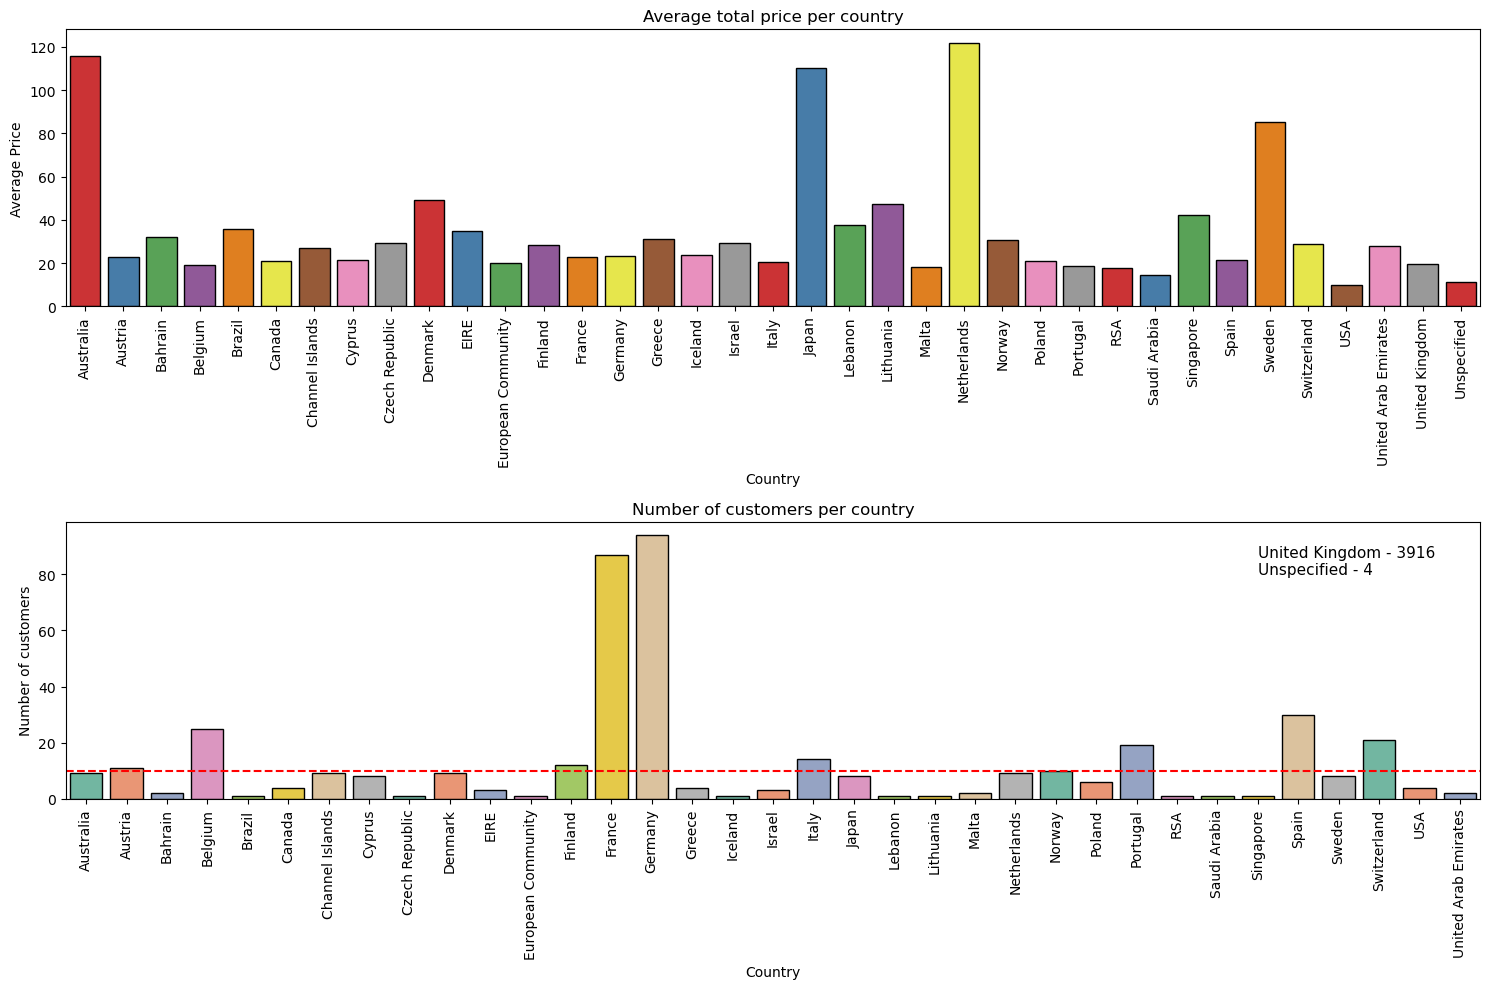

In [4]:
result = pd.DataFrame({
    'Count': data.Country.value_counts(),
    'Percentage': round(data.Country.value_counts(normalize=True)*100,3)
})
display(result.T)


# barplots
avg_total_price_per_country = data.groupby('Country')['TotalPrice'].mean().reset_index()

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.barplot(x='Country', y='TotalPrice', data=avg_total_price_per_country, palette='Set1')
plt.xticks(rotation=90)
plt.title('Average total price per country')
plt.ylabel('Average Price')

customer_count_per_country = data.groupby('Country')['CustomerID'].nunique().reset_index()[:-2]
uk_uns_customers = data.groupby('Country')['CustomerID'].nunique()[-2:]
uk_uns_customers = '\n'.join([f'{idx} - {val}' for idx, val in uk_uns_customers.items()])

plt.subplot(2, 1, 2)  
sns.barplot(x='Country', y='CustomerID', data=customer_count_per_country, palette='Set2')
plt.xticks(rotation=90)
plt.axhline(y=10, color='red', linestyle='--', label='10 customers')
plt.title('Number of customers per country')
plt.ylabel('Number of customers')
plt.text(x=29, y=80, s=uk_uns_customers, fontsize=11)

plt.tight_layout()
plt.show()


89% транзакций приходится на Великобританию, еще 6% на Ирландию, Германию и Францию. Количество клиентов также наибольшее в Великобритании - 3916, более 80 в Германии и Франции, вообще можно заметить, что больше 10 клиентов помимо вышеупомянутых стран имееют еще только Австря, Бельгия, Финляндия, Италия, Португалия, Испания и Швейцария. По средней стоимости заказа можно выделить Австралию, Японию, Нидерланды и Швецию, возможно эти страны покупают дорогой товар или возможно в стоимость включена доставка, так  Австралия и Япония самые удаленные от Великобритании из представленных стран. Еще можно заметить, что в данных есть 4 клиента, для которых страна не опредлена. Вероятно есть смысл, чтобы характеризовать клиентов с достаточным уровнем обобщения объединить клиентов в 3 группы по сложности логистики:
1. великобритания и Ирландия;
2. Европейские страны;
3. остальные.

Теперь рассмотрим распредление цен и общей стоимости

In [5]:
def hist_box_plots(data, features, bins=30):
    """This function generates and displays histograms and boxplots for a set of features from the provided DataFrame.

    Args:
        data (DataFrame): data from which the plots will be created
        features (list): A list of column names (features)
        bins (int, optional): The number of bins to be used in the histogram. Defaults to 30.
    """
    n=len(features)
    fig, axes = plt.subplots(n, 2, figsize=(10, n*5))
    
    for i, feature in enumerate(features):
        sns.histplot(data[feature], bins=bins, ax=axes[i, 0])
        axes[i, 0].set_title(f'Histplot for {feature}')
        axes[i, 0].set_xlabel(feature)
        
        sns.boxplot(x=data[feature], ax=axes[i, 1])
        axes[i, 1].set_title(f'Boxplot for {feature}')
        axes[i, 1].set_xlabel(feature)

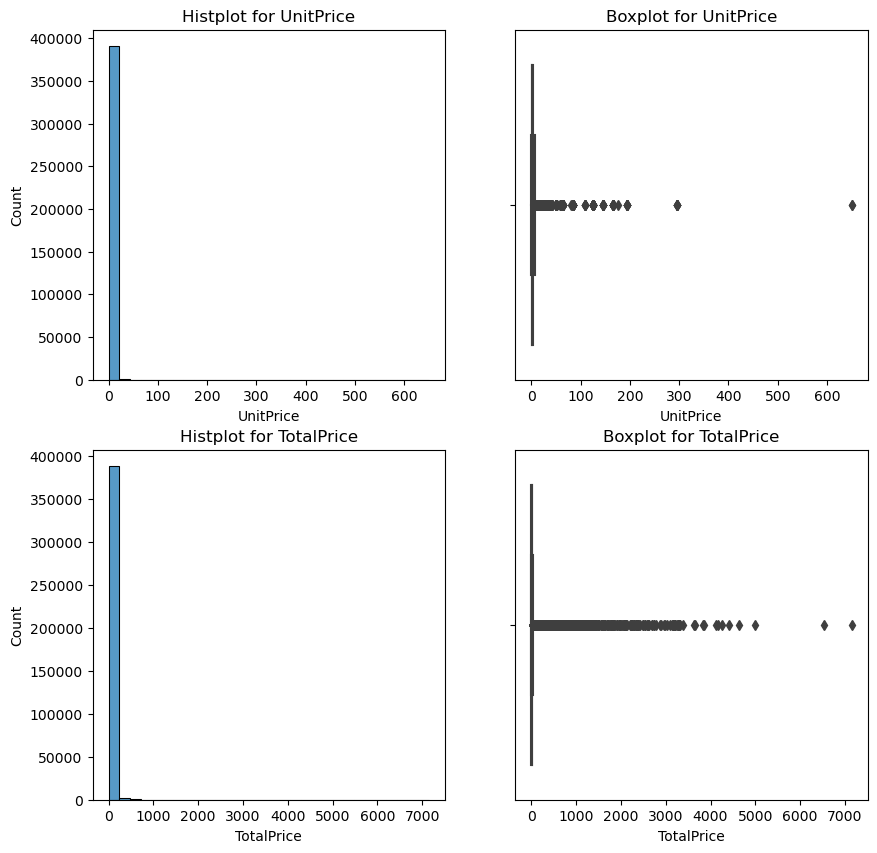

In [6]:
price_features = ['UnitPrice', 'TotalPrice']
hist_box_plots(data, price_features)

Большинство цен мелкие, но есть и дорогие товары более 300 фунтов и более 600, возможно выбросы. По общей сумме тоже видно, что распредление сгруппировано ближе к нулю, но есть и отдельные стоимости транзакций свыше 6000 фунтов

Тепрерь рассмотрим более интересное распределение для количества уникальных товаров в заказе и общей суммы заказа

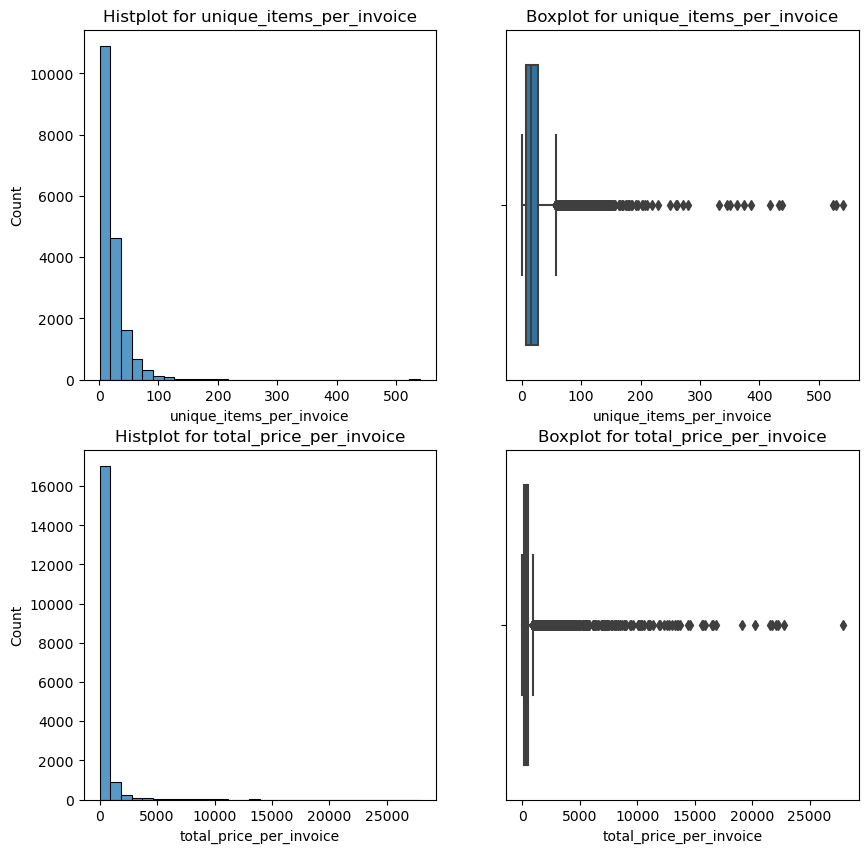

In [6]:
invoice_summary = data.groupby('InvoiceNo').agg(
    unique_items_per_invoice=('StockCode', 'nunique'),
    total_price_per_invoice=('TotalPrice', 'sum')
).reset_index()

hist_box_plots(invoice_summary, invoice_summary.columns[1:])

Большая часть заказов имеет до 100 позиций в заказе, 75% до 50, присутствуют крупные заказы с более 300 заказами.
Распределение общестоимости заказа коррелирует с распределение количества позиций в заказе, большая часть заказоа на сумму до 5000 фунтов, но имеются и крупные свыше 15000 фунтов.

Рассмотрим распределение заказов по клиентам и общую сумму поклиентам

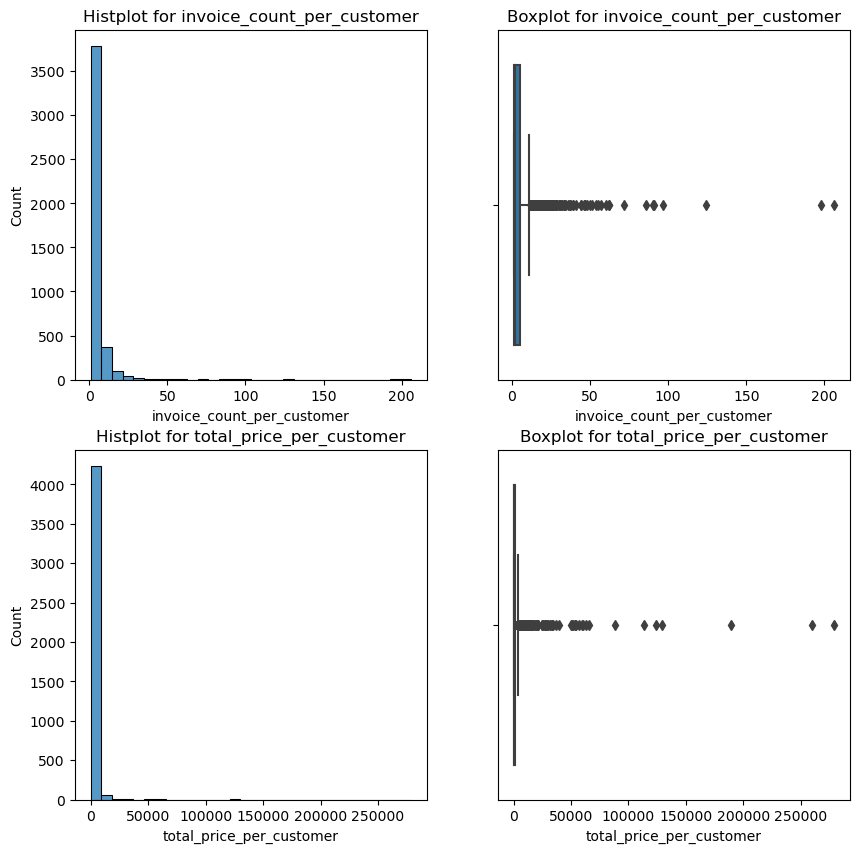

In [7]:
customer_summary = data.groupby('CustomerID').agg(
    invoice_count_per_customer=('InvoiceNo', 'nunique'),
    total_price_per_customer=('TotalPrice', 'sum')
).reset_index()

hist_box_plots(customer_summary, customer_summary.columns[1:])

Большинство клиентов сделали меннее 30 закзов на сумму менее 2000 фунтов, но присутствуют и постоянные клиенты, которые совершили более 100 заказов на суммы превышающие 100000 фунтов, вероятно выбросы.

Посмотрим на вышеупомянутые распределения, ограниченные по 97 квантилю 

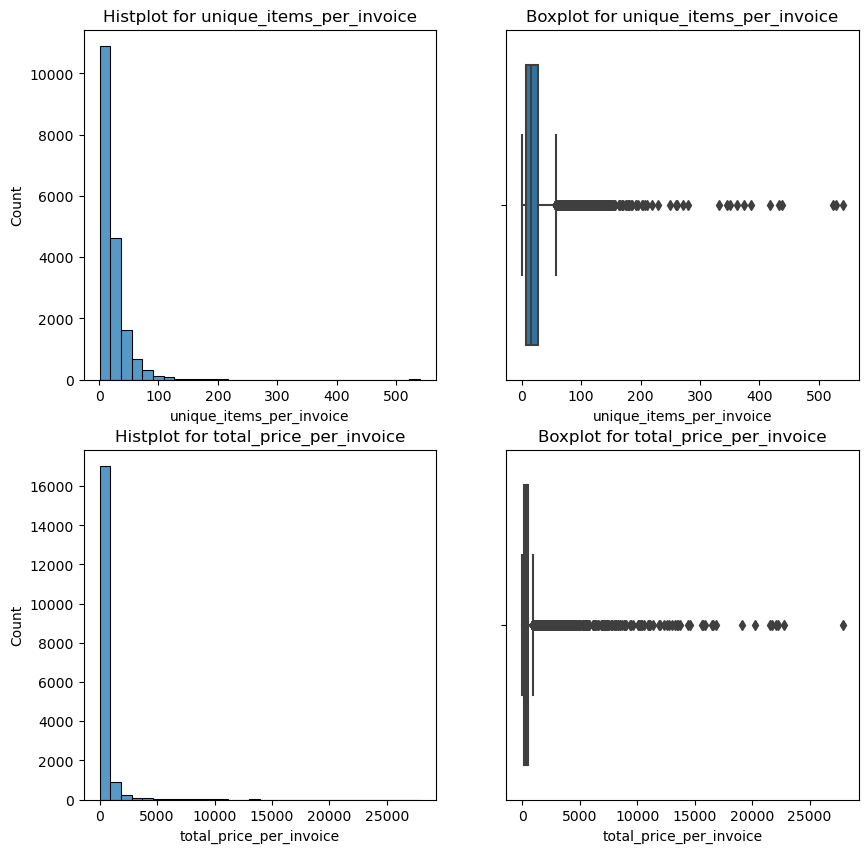

In [8]:
bound_1 = invoice_summary['unique_items_per_invoice'] < invoice_summary['unique_items_per_invoice'].quantile(0.97)
bound_2 = invoice_summary['total_price_per_invoice'] < invoice_summary['total_price_per_invoice'].quantile(0.97)
mask = bound_1 & bound_2

hist_box_plots(invoice_summary, invoice_summary.columns[1:])

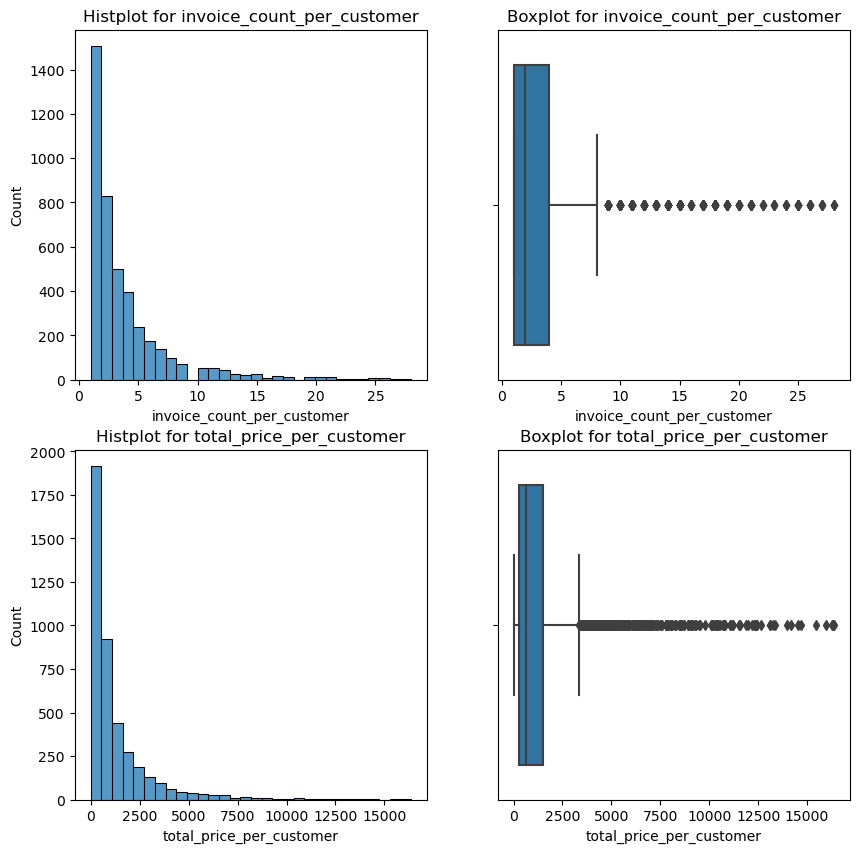

In [9]:
bound_1 = customer_summary['invoice_count_per_customer'] < customer_summary['invoice_count_per_customer'].quantile(0.99)
bound_2 = customer_summary['total_price_per_customer'] < customer_summary['total_price_per_customer'].quantile(0.99)
mask = bound_1 & bound_2

hist_box_plots(customer_summary[mask], customer_summary.columns[1:])

Для определения оптового покупателя, который моежт скупать в больших количествах разнообразный товар для дальнейшей перепродажи, можно ввести признак количества уникальных товаров, заказанных клиентом.

Теперь рассмотрим тепловые карты распределения заказов и общей стоимости транзакций

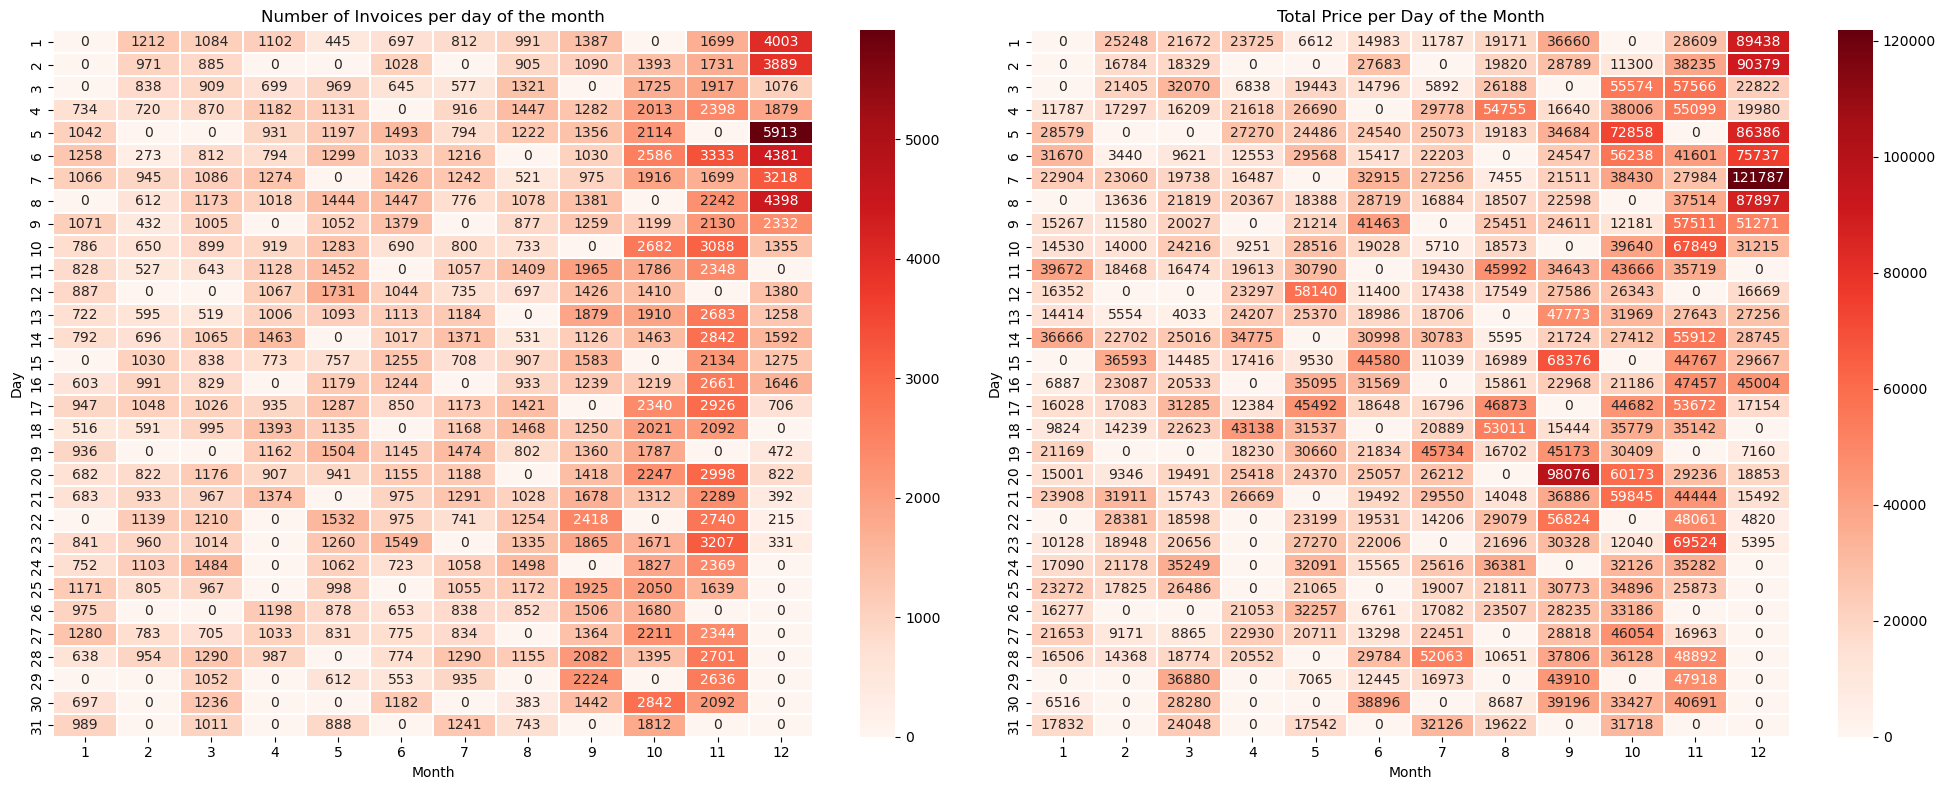

In [10]:
data['Day'] = data['InvoiceDate'].dt.day
data['Month'] = data['InvoiceDate'].dt.month

pivot_table_inv = data.pivot_table(index='Day', columns='Month', aggfunc='size', fill_value=0)
pivot_table_tot_price = data.pivot_table(index='Day', columns='Month', values='TotalPrice', aggfunc='sum', fill_value=0)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.heatmap(pivot_table_inv, cmap='Reds', annot=True, fmt='d', linewidths=0.1)
plt.title('Number of Invoices per day of the month')
plt.xlabel('Month')
plt.ylabel('Day')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_table_tot_price, cmap='Reds', annot=True, fmt='.0f', linewidths=0.1)
plt.title('Total Price per Day of the Month')
plt.xlabel('Month')
plt.ylabel('Day')

plt.tight_layout()
plt.show()

По увеличению количества покупок и общей стоимости к зиме можно явно выделить сезонность продаж, которая увеличивает покупки к началу декабря (к кануну Рождества) и потом резко спадает. также в осенний период начиная с сентября идет увеличение покупок как в денежном, так и вколичественном соотношении.
Еще можно заметить, что раз в 7 дней продажи не производятся - выходной день.

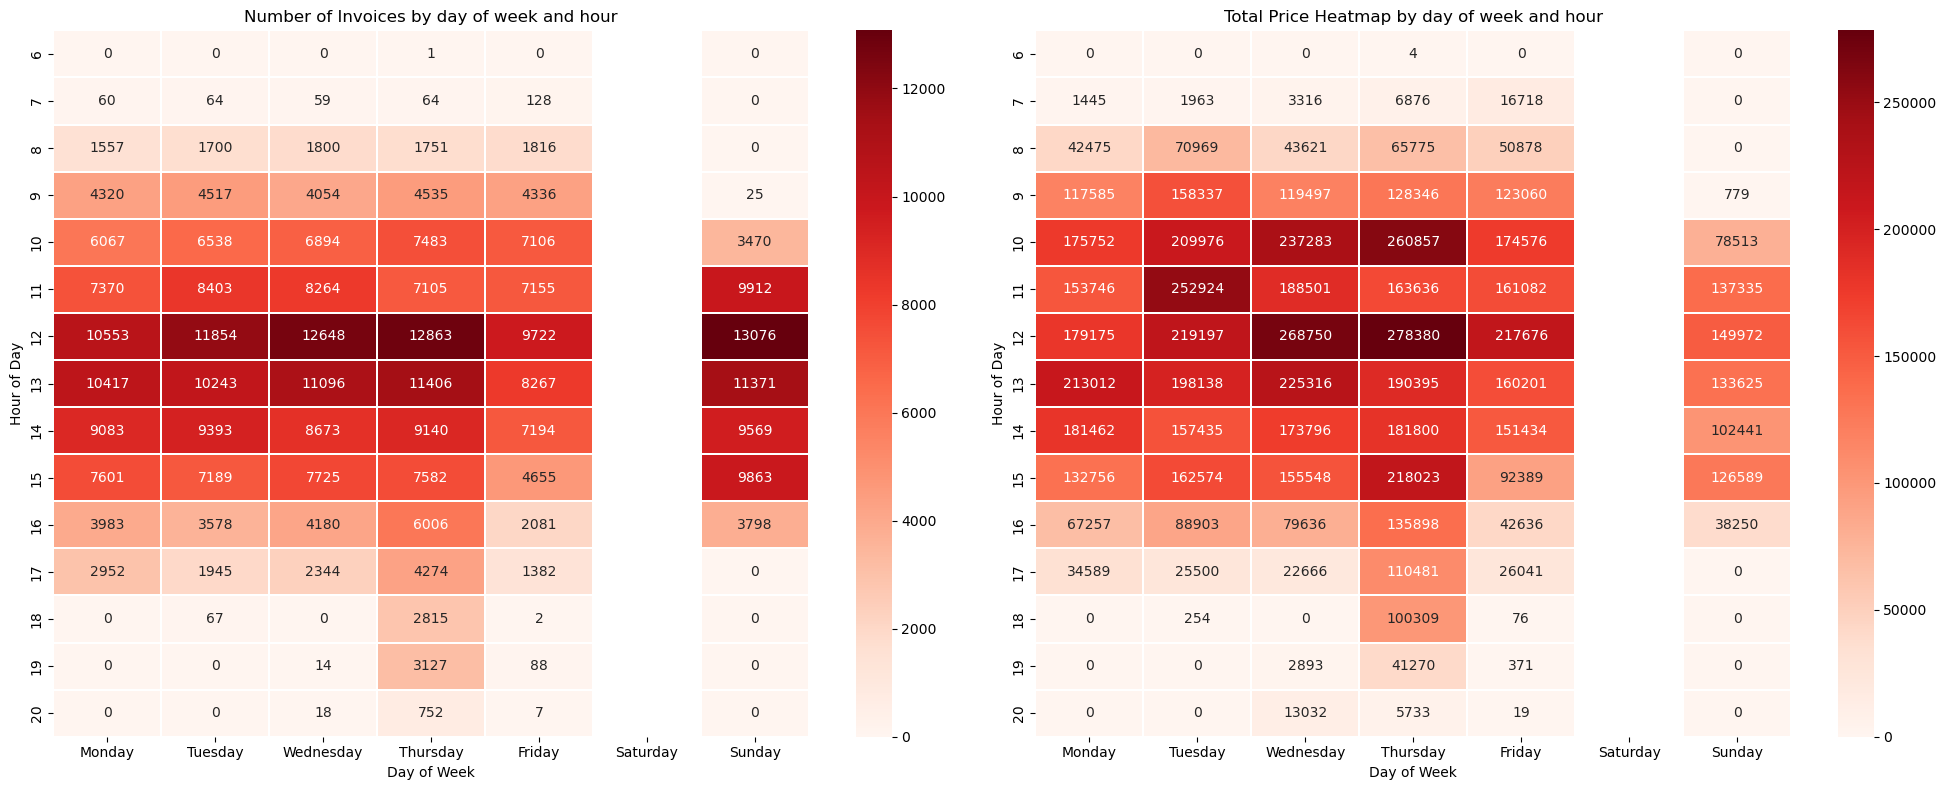

In [11]:
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
data['Hour'] = data['InvoiceDate'].dt.hour

pivot_table_inv = data.pivot_table(index='DayOfWeek', columns='Hour', aggfunc='size', fill_value=0)
pivot_table_tot_price = data.pivot_table(index='DayOfWeek', columns='Hour', values='TotalPrice', aggfunc='sum', fill_value=0)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table_inv = pivot_table_inv.reindex(day_order)
pivot_table_tot_price = pivot_table_tot_price.reindex(day_order)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.heatmap(pivot_table_inv.T, cmap='Reds', annot=True, fmt='.0f', linewidths=0.1)
plt.title('Number of Invoices by day of week and hour')
plt.ylabel('Hour of Day')
plt.xlabel('Day of Week')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_table_tot_price.T, cmap='Reds', annot=True, fmt='.0f', linewidths=0.1)
plt.title('Total Price Heatmap by day of week and hour')
plt.ylabel('Hour of Day')
plt.xlabel('Day of Week')

plt.tight_layout()
plt.show()

Теперь видно, что суббота нерабочий день, пик всех покупок каждый день с 10 до 14 часов. Также можно заметить, что общая стоимость заказов в воскресенье не так велико как их количество, вероятно это связано с тем, что крупные оптовики не закупаются по воскресеньем, поэтому заказы в этот день не дорогие.  

Для определения постоянности клиента можно выделить признак, который будет показывать в скольких месяцах закупался клиент (1 - только в одном, 12 - во всех).

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, чтобы разделить всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

In [12]:
t_max = pd.to_datetime('2011-12-10 00:00:00')

data['Days_after_invoice'] = (t_max - data['InvoiceDate']).dt.days

rfm_table = data.groupby('CustomerID').agg({
    'Days_after_invoice': 'min',  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
})
rfm_table.columns = ['Recency', 'Frequency', 'Monetary']
display(rfm_table.head())

Recency  Frequency  Monetary
CustomerID                              
12346           325          1      0.00
12347             2          7   4310.00
12348            75          4   1437.24
12349            18          1   1457.55
12350           310          1    294.40

Визуализация распределения

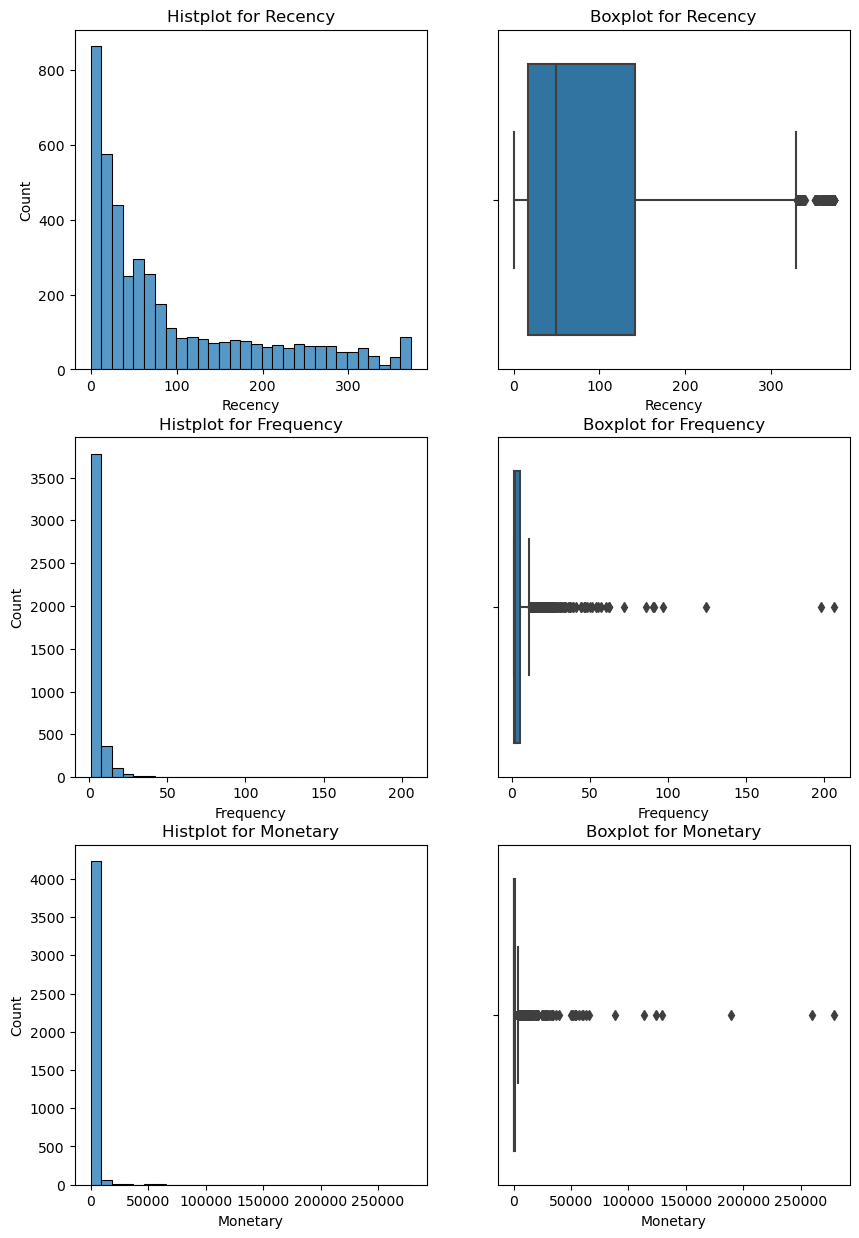

In [13]:
hist_box_plots(rfm_table, rfm_table.columns)

Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans.
Удалим данные тех клиентов, для которых значение параметров Recency (давно ушедшие), Frequency или параметра Monetary выше, чем у 95 % клиентов.


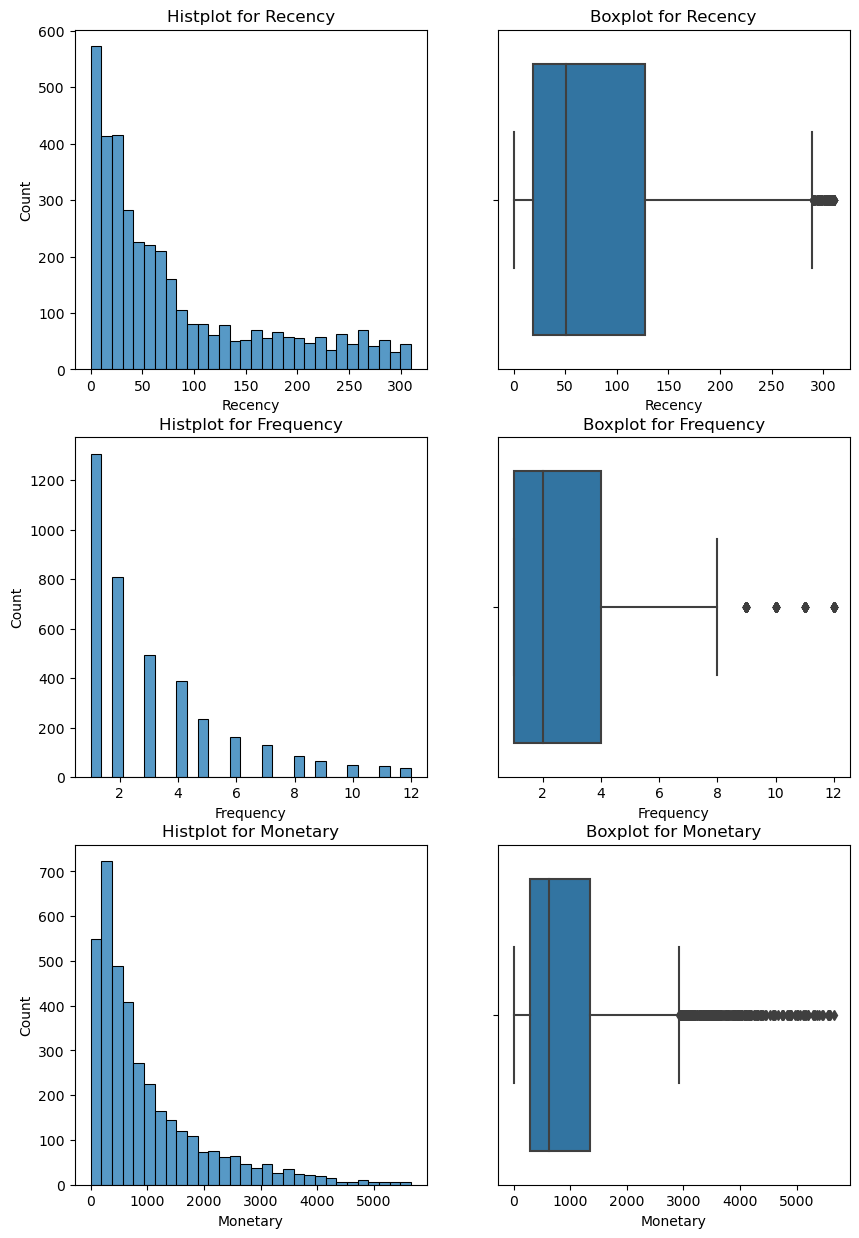

In [14]:
bound_1 = rfm_table['Recency'] < rfm_table['Recency'].quantile(0.95)
bound_2 = rfm_table['Frequency'] < rfm_table['Frequency'].quantile(0.95)
bound_3 = rfm_table['Monetary'] < rfm_table['Monetary'].quantile(0.95)
mask = bound_1 & bound_2 & bound_3

rfm_table = rfm_table[mask]
hist_box_plots(rfm_table, rfm_table.columns)

## 3. Исследования

### Кластеризация на основе RFM-характеристик

Понижение размерности

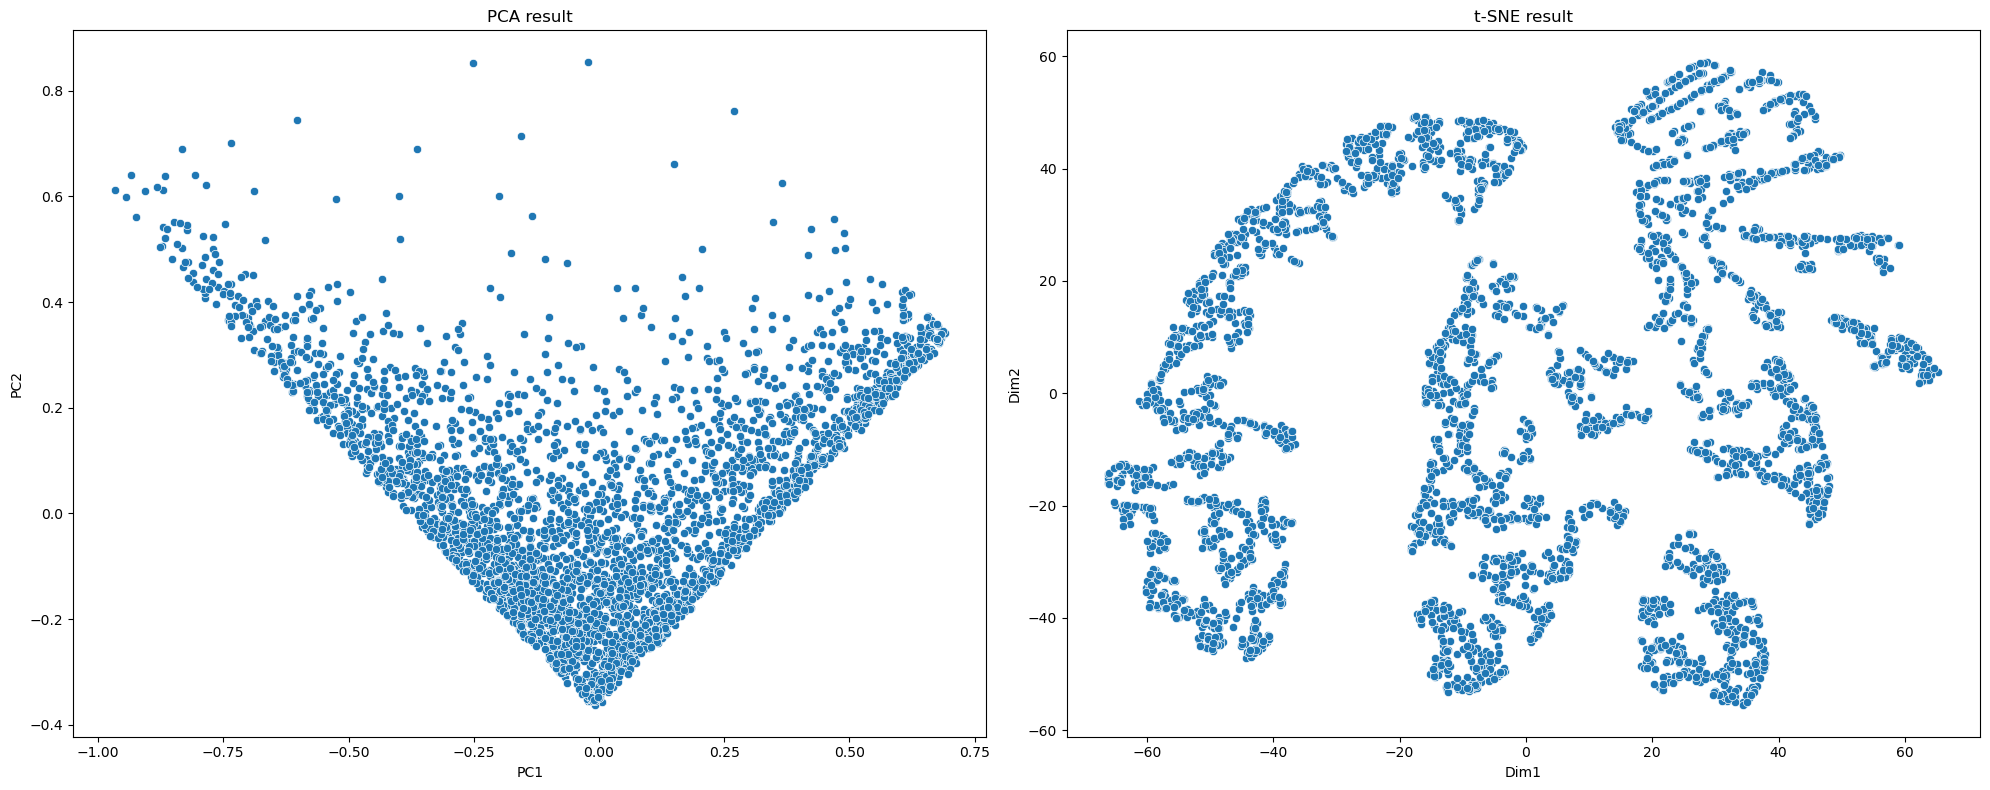

In [15]:
# Pipeline with PCA
pipeline_pca = pipeline.Pipeline([
    ('scaler', preprocessing.MinMaxScaler()), 
    ('pca', decomposition.PCA(n_components=2))  
])

rfm_pca = pipeline_pca.fit_transform(rfm_table)
rfm_pca_df = pd.DataFrame(rfm_pca, columns=['PC1', 'PC2'])

# Pipeline with t-SNE
pipeline_tsne = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),  
    ('tsne', manifold.TSNE(n_components=2, random_state=42))  
])

rfm_tsne = pipeline_tsne.fit_transform(rfm_table)
rfm_tsne_df = pd.DataFrame(rfm_tsne, columns=['Dim1', 'Dim2'])

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', data=rfm_pca_df)
plt.title('PCA result')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Dim1', y='Dim2', data=rfm_tsne_df)
plt.title('t-SNE result')

plt.tight_layout()
plt.show()

Из графиков видно, что понижение размерности с помощью PCA модели дало более плотную и менее разделимую диаграмму рассеивания, а алгоритм t-SNE лучше справился, визуально можно определить разлечимые границы кластеров. Определим оптимальное количесвто кластеров для каждого из наборов.

In [16]:
def elbow_silhouette_methods(data, min_n_clusters, max_n_clusters):
    """This function helps determine the optimal number of clusters to Kmeans model
    using line plots of the Elbow Method and the Silhouette Method.

    Args:
        data (array-like): 2D array or a DataFrame
        min_n_clusters (int): minimum number of clusters to evaluate
        max_n_clusters (int): maximum number of clusters to evaluate
    """
    
    inertia_scores = []
    silhouette_scores = []
    num_list = range(min_n_clusters, max_n_clusters+1)

    for n in num_list:
        kmeans = cluster.KMeans(n_clusters=n, n_init=10, random_state=42)
        clusters = kmeans.fit_predict(data)
    
        inertia_scores.append(kmeans.inertia_)   
        silhouette_scores.append(metrics.silhouette_score(data, clusters))
    
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.plot(num_list, inertia_scores, 'bo-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow method for optimal n')

    plt.subplot(1, 2, 2)
    plt.plot(num_list, silhouette_scores, 'bo-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette Method for optimal n')

    plt.tight_layout()
    plt.show()

Optimal number of clusters for PCA RFM by KMeans:


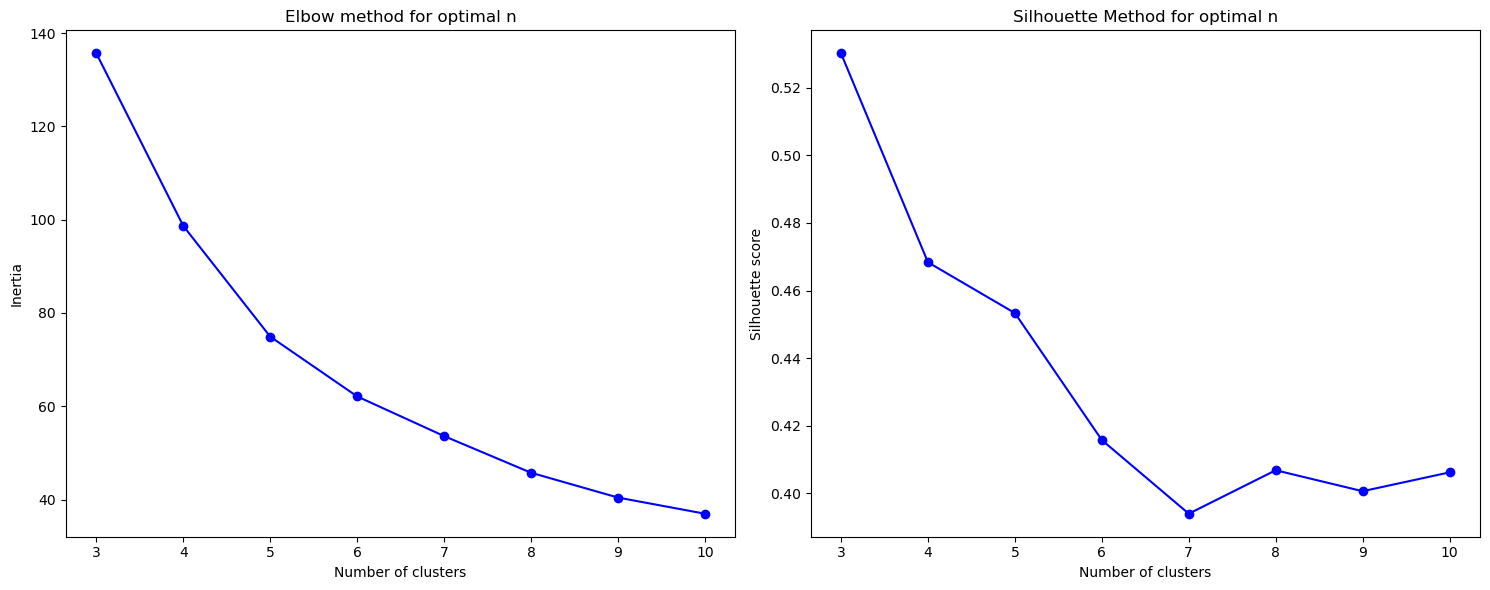

Optimal number of clusters for t-SNE RFM by KMeans:


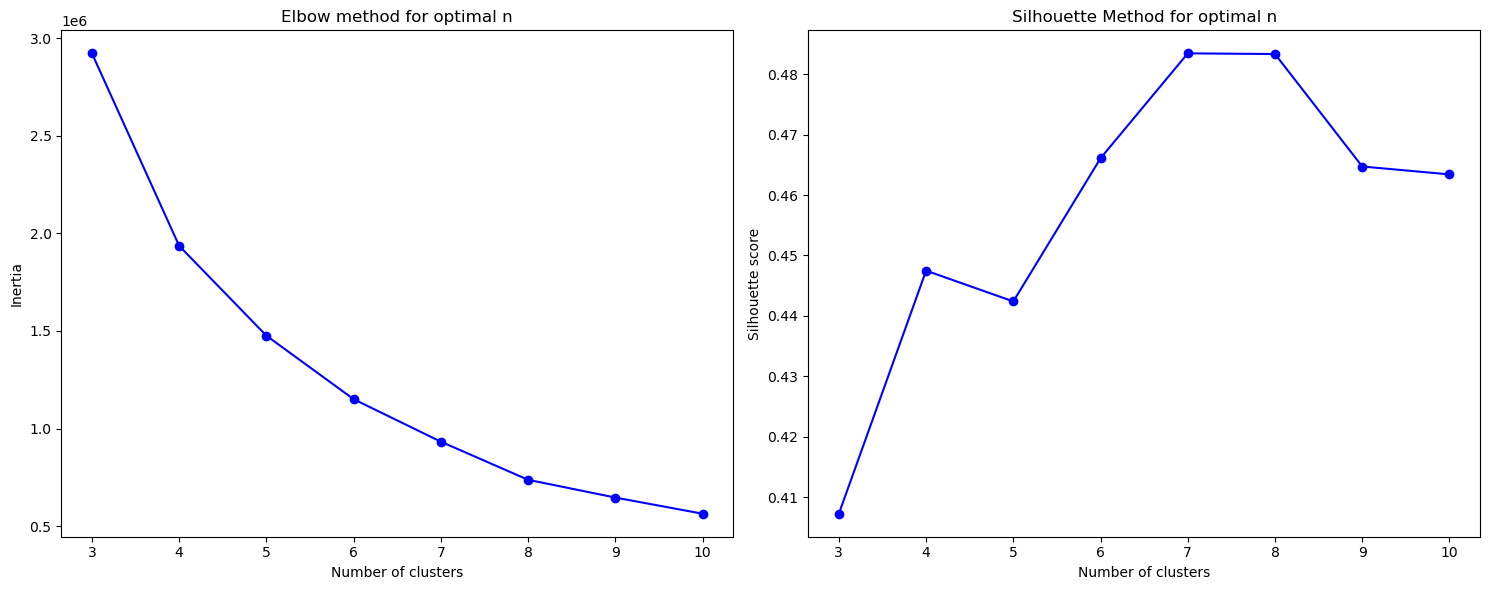

In [17]:
print('Optimal number of clusters for PCA RFM by KMeans:')
elbow_silhouette_methods(rfm_pca, 3, 10)
print('Optimal number of clusters for t-SNE RFM by KMeans:')
elbow_silhouette_methods(rfm_tsne, 3, 10)

Для данных, к которым применялся t-SNE алгоритм, однозначноможно определить оптимальное количесвто кластеров равное 7, а для PCA данных сложно определить, но исходя из метрики Silhouette score, будем считать равным трем. Поиск оптимального количества осуществлялся для алгоритма кластеризации KMeans, целесообразно проверить оптимальное количество кластеров для каждого из алгоритмов, которые будем использовать.

Найдем оптимальное количество кластеров для разных алгоритмов кластеризации, оптимальный будем считать с максимальным коэффициентом силуэта.

In [18]:
def optimal_clustering(data, min_n_clusters, max_n_clusters):
    """The function finds the optimal number of clusters by silhouette score for three clustering algorithms: 
    KMeans, GaussianMixture, and AgglomerativeClustering.


data: The dataset to be clustered, expected to be in the form of a DataFrame or a 2D array.
min_n_clusters: The minimum number of clusters to evaluate.
max_n_clusters: The maximum number of clusters to evaluate.

    Args:
        data: DataFrame or a 2D array
        min_n_clusters (int): minimum number of clusters to evaluate
        max_n_clusters (int): maximum number of clusters to evaluate

    Returns:
        DataFrame: DataFrame containing the best number of clusters, and metrics
    """
    
    algorithms = {
        'KMeans': cluster.KMeans,
        'GaussianMixture': mixture.GaussianMixture,
        'AgglomerativeClustering': cluster.AgglomerativeClustering
    }
    
    results = []

    for name, algorithm in algorithms.items():
        best_score = -1
        best_n_clusters = 0

        for n_clusters in range(min_n_clusters, max_n_clusters + 1):
            if name == 'GaussianMixture':
                model = algorithm(n_components=n_clusters, random_state=42)
                labels = model.fit_predict(data)
            else:
                model = algorithm(n_clusters=n_clusters)
                labels = model.fit_predict(data)

            score = metrics.silhouette_score(data, labels)

            if score > best_score:
                best_score = score
                best_n_clusters = n_clusters
                calinski_harabasz_score = metrics.calinski_harabasz_score(data, labels)
                davies_bouldin_score = metrics.davies_bouldin_score(data, labels)

        results.append({
            'Algorithm': name,
            'Best_n_clusters': best_n_clusters,
            'Best_silhouette_score': best_score,
            'calinski_harabasz_score': calinski_harabasz_score,
            'davies_bouldin_score': davies_bouldin_score
        })
 
 
    return pd.DataFrame(results)


In [19]:
print('Optimal number of clusters for PCA RFM')
rfm_pca_scores = optimal_clustering(rfm_pca, 3, 10)
display(rfm_pca_scores)

Optimal number of clusters for PCA RFM


Algorithm  Best_n_clusters  Best_silhouette_score  \
0                   KMeans                3               0.530054   
1          GaussianMixture                3               0.476340   
2  AgglomerativeClustering                3               0.482144   

   calinski_harabasz_score  davies_bouldin_score  
0              5829.402806              0.638637  
1              4849.113333              0.683814  
2              4545.821177              0.679842

Для RFM таблицы с PCA понижением размерности  лучший коэффициент силуэта дала модель KMeans при разделении на 3 кластера. Коэффициенты Калински-Харабаза и Дэвиса-Болдина также лушие у этой модели.

In [20]:
print('Optimal number of clusters for t-SNE RFM:')
rfm_tsne_scores = optimal_clustering(rfm_tsne, 3, 10)
display(rfm_tsne_scores)

Optimal number of clusters for t-SNE RFM:


Algorithm  Best_n_clusters  Best_silhouette_score  \
0                   KMeans                8               0.483397   
1          GaussianMixture                8               0.453656   
2  AgglomerativeClustering                7               0.453584   

   calinski_harabasz_score  davies_bouldin_score  
0              5531.943723              0.678701  
1              4875.868033              0.714320  
2              4600.864811              0.742130

Для RFM таблицы с t-SNE понижением размерности, лучший коэффициент силуэта дала модель KMeans при разделении на 7 кластера. Коэффициенты Калински-Харабаза и Дэвиса-Болдина также лушие у этой модели. 

Попробуем провести кластеризацию с помощью DBSCAN.

In [21]:
def silhouette_scorer(model, data):
    """This function returns silhouette_score if number of clusters more then 1
    """
    labels = model.fit_predict(data)
    
    if (11 > len(set(labels)) > 2): # marketung restiction for clusters
        return metrics.silhouette_score(data, labels)
    else:
        return -1 


param_grid = {
    'eps': np.arange(0.1, 2, 0.1),
    'min_samples': range(2, 10)
}

dbscan = cluster.DBSCAN()

grid_search = model_selection.GridSearchCV(dbscan, param_grid, scoring=silhouette_scorer, n_jobs=-1)
grid_search.fit(rfm_pca)


dbscan = cluster.DBSCAN(**grid_search.best_params_)
labels = dbscan.fit_predict(rfm_pca)

dbscan_scores = {
            'Algorithm': ['DBSCAN'],
            'Best_n_clusters': [len(set(labels)) - (1 if -1 in labels else 0)],
            'Best_silhouette_score': [metrics.silhouette_score(rfm_pca, labels)],
            'calinski_harabasz_score': [metrics.calinski_harabasz_score(rfm_pca, labels)],
            'davies_bouldin_score': [metrics.davies_bouldin_score(rfm_pca, labels)]
        }
new_row = pd.DataFrame(dbscan_scores)

rfm_pca_scores = pd.concat([rfm_pca_scores, new_row], ignore_index=True)

print('Optimal number of clusters for PCA RFM')
display(rfm_pca_scores)

Optimal number of clusters for PCA RFM


Algorithm  Best_n_clusters  Best_silhouette_score  \
0                   KMeans                3               0.530054   
1          GaussianMixture                3               0.476340   
2  AgglomerativeClustering                3               0.482144   
3                   DBSCAN                1               0.426743   

   calinski_harabasz_score  davies_bouldin_score  
0              5829.402806              0.638637  
1              4849.113333              0.683814  
2              4545.821177              0.679842  
3                40.660688              0.868796

Для RFM таблицы с понижением размерности PCA алгоритм DBSCAN смог только найти выбросы, при этом даже для одного кластера и выбросов коэффициент силуэта гораздо ниже, чем у других моделей. Также для определения параметров 'eps' и 'min_samples' использовался GridSearchCV, кросс-валидация могла ухудшить качество алгоритма, поэтому для подбора данных параметров для t-SNE набора воспользуемя перебором по циклу.

In [22]:
def dbscan_optimal(data, eps_values, min_samples_values):
    """This function finds the optimal 'eps' and 'min_samples' by silhouette score for DBSCAN.
    Number of clusters from 3 to 10/

    Args:
        data: DataFrame or a 2D array
        eps_values: space of 'eps' values
        min_samples_values: range of min_samples values

    Returns:
        DataFrame: dictonary of metrics and number of clusters
    """
    
    best_score = -1
    best_params = None
    

    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)

            if (11 >len(set(labels)) > 2): 
                score = metrics.silhouette_score(data, labels)
                
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
                    dbscan_scores = {
                        'Algorithm': 'DBSCAN',
                        'Best_n_clusters': [len(set(labels)) - (1 if -1 in labels else 0)],
                        'Best_silhouette_score': [best_score],
                        'calinski_harabasz_score': [metrics.calinski_harabasz_score(data, labels)],
                        'davies_bouldin_score': [metrics.davies_bouldin_score(data, labels)]   
                    }
   
    print(best_params)
                    

    return pd.DataFrame(dbscan_scores)


In [23]:
new_row = dbscan_optimal(rfm_tsne, np.linspace(0.1, 4.0, 20), range(2, 11))
rfm_tsne_scores = pd.concat([rfm_tsne_scores, new_row], ignore_index=True)

print('Optimal number of clusters for t-SNE RFM')
display(rfm_tsne_scores)

{'eps': 3.5894736842105264, 'min_samples': 2}
Optimal number of clusters for t-SNE RFM


Algorithm  Best_n_clusters  Best_silhouette_score  \
0                   KMeans                8               0.483397   
1          GaussianMixture                8               0.453656   
2  AgglomerativeClustering                7               0.453584   
3                   DBSCAN                5               0.262350   

   calinski_harabasz_score  davies_bouldin_score  
0              5531.943723              0.678701  
1              4875.868033              0.714320  
2              4600.864811              0.742130  
3              1882.138894              1.063121

Для RFM таблицы с понижением размерности t-SNE алгоритм DBSCAN показал значительно худше коэффициент силуэта и другие метрики.

Теперь посмотрим как распределяются кластеры в пониженной разсерности, для каждого набора возьмем модель с лучшим результатом. 

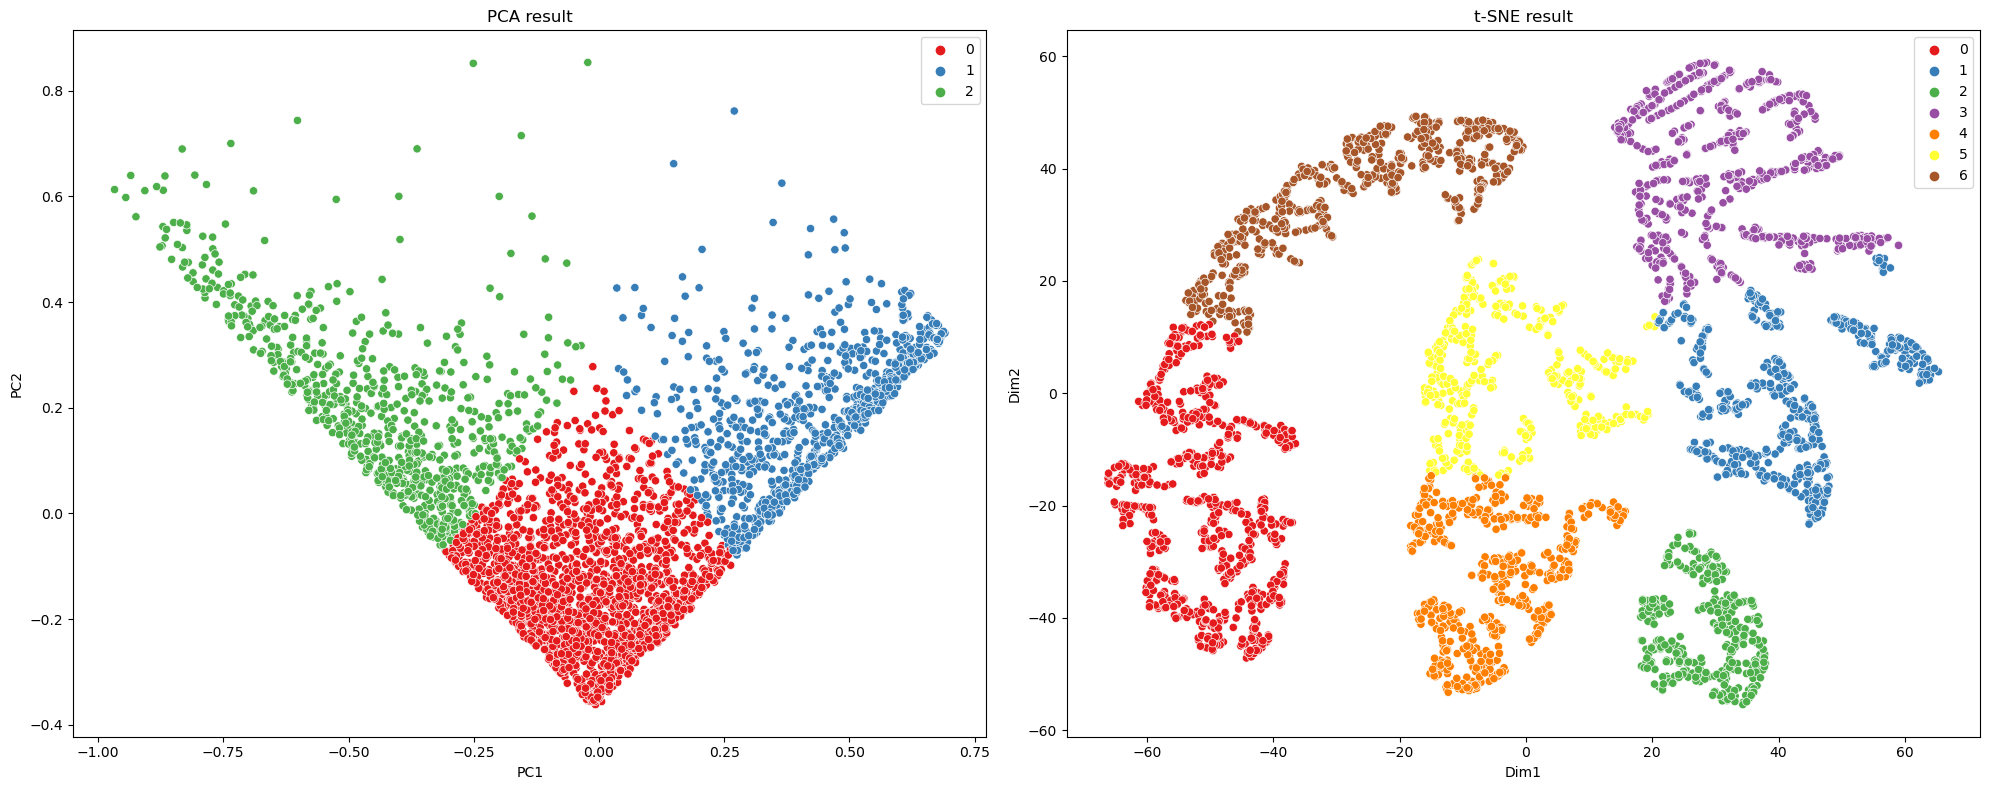

In [20]:
km_pca = cluster.KMeans(n_clusters=3, n_init=10, random_state=42)
clusters_pca = km_pca.fit_predict(rfm_pca)

km_tsne = cluster.KMeans(n_clusters=7, n_init=10, random_state=42)
clusters_tsne = km_tsne.fit_predict(rfm_tsne)


plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=rfm_pca_df['PC1'], y=rfm_pca_df['PC2'], hue=clusters_pca, palette='Set1')
plt.title('PCA result')

plt.subplot(1, 2, 2)
sns.scatterplot(x=rfm_tsne_df['Dim1'], y=rfm_tsne_df['Dim2'], hue=clusters_tsne, palette='Set1')
plt.title('t-SNE result')

plt.tight_layout()
plt.show()

Кластеризация t-SNE показала более понятные результаты, но это на данных с пониженной размерности, позже проверим интерпритируемость данных на RFM таблице.

Так как объем данных небольшой, посмотрим как алгоритмы кластеризации справятся на непредобработанных данных.

Посмотрим какие результаты покажет кластеризация непредобработанной RFM таблицы:

In [24]:
print('Optimal number of clusters for RFM:')
rfm_scores = optimal_clustering(rfm_table, 3, 10)
display(rfm_scores)

Optimal number of clusters for RFM:


Algorithm  Best_n_clusters  Best_silhouette_score  \
0                   KMeans                3               0.634396   
1          GaussianMixture                3               0.259298   
2  AgglomerativeClustering                4               0.587798   

   calinski_harabasz_score  davies_bouldin_score  
0             11276.811847              0.517187  
1              1864.390384              1.318836  
2             11641.453808              0.519045

Метрики для KMeans и AgglomerativeClustering гораздо выше чем метрики после нормалтзации и понижения размерности, но фактически это будет кластеризация по признаку 'Monetary', так как данные алгоритмы используют расстояние для определения кластеров, а расстояние по этому признаку будет самым большим.
Данную таблицу не будем учитывать в исследовании. Но посмотрим на метрики для стандартизированной/нормализованной RFM таблицы.

In [25]:
scaler = preprocessing.StandardScaler()
rfm_st_scaled = scaler.fit_transform(rfm_table)

rfm_st_scaled_scores = optimal_clustering(rfm_st_scaled, 3, 10)
new_row = dbscan_optimal(rfm_st_scaled, np.linspace(0.1, 2.0, 20), range(2, 11))
rfm_st_scaled_scores = pd.concat([rfm_st_scaled_scores, new_row], ignore_index=True)

print('Optimal number of clusters for Standard scaled RFM:')
display(rfm_st_scaled_scores)

{'eps': 0.5, 'min_samples': 9}
Optimal number of clusters for Standard scaled RFM:


Algorithm  Best_n_clusters  Best_silhouette_score  \
0                   KMeans                3               0.469528   
1          GaussianMixture                4               0.311975   
2  AgglomerativeClustering                3               0.435764   
3                   DBSCAN                2               0.425857   

   calinski_harabasz_score  davies_bouldin_score  
0              4055.036943              0.757051  
1              2050.844161              1.222612  
2              3693.046785              0.797183  
3               134.733331              1.348989

In [26]:
scaler = preprocessing.MinMaxScaler()
rfm_mm_scaled = scaler.fit_transform(rfm_table)

rfm_mm_scaled_scores = optimal_clustering(rfm_mm_scaled, 3, 10)
new_row = dbscan_optimal(rfm_mm_scaled, np.linspace(0.1, 1.0, 10), range(2, 11))
rfm_mm_scaled_scores = pd.concat([rfm_mm_scaled_scores, new_row], ignore_index=True)

print('Optimal number of clusters for MinMax scaled RFM:')
display(rfm_mm_scaled_scores)

{'eps': 0.2, 'min_samples': 2}
Optimal number of clusters for MinMax scaled RFM:


Algorithm  Best_n_clusters  Best_silhouette_score  \
0                   KMeans                3               0.490205   
1          GaussianMixture                4               0.324306   
2  AgglomerativeClustering                3               0.461011   
3                   DBSCAN                2               0.340836   

   calinski_harabasz_score  davies_bouldin_score  
0              4516.120297              0.749011  
1              2252.378240              1.224409  
2              4167.791993              0.770903  
3                12.363906              0.844426

В обоих случаях лучший результат дала модель KMeans, построенная для 3 кластеров. Отметим, что нормалзация MinMax дала лучшей резултат, чем StandardScaler на всех моделях кроме  DBSCAN. Еще можно заметить, что данные нормализованные MinMaxScaler показли лучшей коэффициент силуета чем данные с предобработкой StandardScaler и t-SNE, но хуже по коэффициенту Дэвиса-Болдина, что  может говорить о том, что межкластерное расстояние для t-SNE данных больше.

Для упрощения дальнейших исследований напишем функцию, которая будет оптимизировать гипрепараметры с помощью Optuna и выводить датафрейм с метриками и количество кластеров. Также в уже сформированный ранеее набор алгоритмов добавим HDBSCAN. Для DBSCAN и HDBSCAN проверять в том числе будем на разном расстоянии между координатами объектов. Т.к. для интерпритации результатов кластеризации нам важно чтобы разделение на каждом признаке было четкое, есть предположение что манхэттенское расстояние даст лучше результат.

In [30]:
import optuna
import fast_hdbscan as hdbscan

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.exceptions import NotFittedError
import logging

In [31]:
def optimize_clustering(algorithm, data, trial):
    """This function optimizes a clustering algorithm by tuning its hyperparameters and evaluating the model's performance using clustering quality metrics

    Args:
        algorithm (str): clustering algorithm to optimize
        data (DataFrame or ndarray): dataset forclustering 
        trial (optuna.Trial): trial object from Optuna

    

    Returns:
        values of metrics
    """
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'cosine'])
    
    if algorithm == 'KMeans':
        n_clusters = trial.suggest_int('n_clusters', 3, 11)
        model = cluster.KMeans(n_clusters=n_clusters, random_state=42)

    elif algorithm == 'GaussianMixture':
        n_components = trial.suggest_int('n_components', 3, 11)
        covariance_type = trial.suggest_categorical('covariance_type', ['full', 'tied', 'diag', 'spherical'])
        model = mixture.GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)

    elif algorithm == 'AgglomerativeClustering':
        n_clusters = trial.suggest_int('n_clusters', 3, 11)
        linkage = trial.suggest_categorical('linkage', ['ward', 'complete', 'average', 'single'])
        model = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)

    elif algorithm == 'DBSCAN':
        eps = trial.suggest_loguniform('eps', 0.1, 50.0)
        min_samples = trial.suggest_int('min_samples', 3, 20)
        model = cluster.DBSCAN(eps=eps, min_samples=min_samples, metric=metric)

    elif algorithm == 'HDBSCAN':
        min_samples = trial.suggest_int('min_samples', 3, 20)
        min_cluster_size = trial.suggest_int('min_cluster_size', 3, 30)
        model = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, metric=metric)
    
    else:
        raise ValueError("Unknown algorithm: {}".format(algorithm))

    try:
        labels = model.fit_predict(data)
        
        if (11 > len(set(labels)) > 2):
            silhouette_score = metrics.silhouette_score(data, labels, metric=metric)
            calinski_harabasz_score = metrics.calinski_harabasz_score(data, labels)
            davies_bouldin_score = metrics.davies_bouldin_score(data, labels)
        else:
            silhouette_score = -1
            calinski_harabasz_score = -1
            davies_bouldin_score = -1

    except NotFittedError:
        silhouette_score = -1
        calinski_harabasz_score = -1
        davies_bouldin_score = -1
    
    return silhouette_score, calinski_harabasz_score, davies_bouldin_score, len(set(labels))


def find_optimal_hyperparameters(data, n_trials=50):
    """This function optimizes hyperparameters for various clustering algorithms and finds the best-performing model for each algorithm.

    Args:
        data (DataFrame or ndarray): dataset forclustering 
        n_trials (int, optional): number of trials. Defaults to 50.

    Returns:
        DataFrame: DataFrame with best metrics? algorytm and hyperparameters
    """
    algorithms = ['KMeans', 'GaussianMixture', 'AgglomerativeClustering', 'DBSCAN', 'HDBSCAN']
    results = []

    for algorithm in algorithms:
        def objective(trial):
            silhouette_score, calinski_harabasz_score, davies_bouldin_score, n_clusters = optimize_clustering(algorithm, data, trial)
            return silhouette_score
        
        optuna.logging.set_verbosity(optuna.logging.WARNING)

        study = optuna.create_study(direction='maximize')
        study.optimize(objective, n_trials=n_trials)

        # Получаем лучшую модель и параметры
        best_silhouette_score, best_calinski_harabasz_score, best_davies_bouldin_score, best_n_clusters = optimize_clustering(algorithm, data, study.best_trial)

        # Сохраняем результаты для каждого алгоритма
        results.append({
            'Algorithm': algorithm,
            'Best_Silhouette_Score': best_silhouette_score,
            'Best_Calinski_Harabasz_Score': best_calinski_harabasz_score,
            'Best_Davies_Bouldin_Score': best_davies_bouldin_score,
            'Best_n_clusters': best_n_clusters,
            'Best_Params': study.best_params
        })

    return pd.DataFrame(results)

In [34]:
rfm_pca_scores = find_optimal_hyperparameters(rfm_pca, n_trials=70)
print('Clustering for PCA RFM table:')
display(rfm_pca_scores)

rfm_tsne_scores = find_optimal_hyperparameters(rfm_tsne, n_trials=70)
print('Clustering for t-SNE RFM table:')
display(rfm_tsne_scores)

rfm_mm_scaled_scores = find_optimal_hyperparameters(rfm_mm_scaled, n_trials=70)
print('Clustering for MinMaxScaled RFM table:')
display(rfm_mm_scaled_scores)

rfm_st_scaled_scores = find_optimal_hyperparameters(rfm_st_scaled, n_trials=70)
print('Clustering for StandardScaled RFM table:')
display(rfm_st_scaled_scores)

Clustering for PCA RFM table:


Algorithm  Best_Silhouette_Score  \
0                   KMeans               0.546749   
1          GaussianMixture               0.743964   
2  AgglomerativeClustering               0.515263   
3                   DBSCAN              -1.000000   
4                  HDBSCAN               0.270299   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   5829.579425                   0.637690                3   
1                   4849.113333                   0.683814                3   
2                   5107.101902                   0.661276                3   
3                     -1.000000                  -1.000000                1   
4                    359.392769                   1.446552                3   

                                         Best_Params  
0           {'metric': 'manhattan', 'n_clusters': 3}  
1  {'metric': 'cosine', 'n_components': 3, 'covar...  
2  {'metric': 'manhattan', 'n_clusters': 3, 'link...  
3  {'metric': 'cosine', 'eps': 1.0742868480092616...  
4  {'metric': 'manhattan', 'min_samples': 4, 'min...

Clustering for t-SNE RFM table:


Algorithm  Best_Silhouette_Score  \
0                   KMeans               0.610314   
1          GaussianMixture               0.631429   
2  AgglomerativeClustering               0.584055   
3                   DBSCAN               0.283438   
4                  HDBSCAN               0.283438   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   3470.130371                   0.854989                3   
1                   3460.635249                   0.841209                3   
2                   3857.035918                   0.819910                4   
3                   1882.138894                   1.063121                5   
4                   1882.138894                   1.063121                5   

                                         Best_Params  
0              {'metric': 'cosine', 'n_clusters': 3}  
1  {'metric': 'cosine', 'n_components': 3, 'covar...  
2  {'metric': 'cosine', 'n_clusters': 4, 'linkage...  
3  {'metric': 'manhattan', 'eps': 6.4165167739068...  
4  {'metric': 'manhattan', 'min_samples': 10, 'mi...

Clustering for MinMaxScaled RFM table:


Algorithm  Best_Silhouette_Score  \
0                   KMeans               0.489969   
1          GaussianMixture               0.476361   
2  AgglomerativeClustering               0.461011   
3                   DBSCAN               0.323294   
4                  HDBSCAN               0.088020   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   4516.009090                   0.749676                3   
1                   4296.033807                   0.776282                3   
2                   4167.791993                   0.770903                3   
3                    329.976388                   1.387850                3   
4                    397.579638                   2.400850                9   

                                         Best_Params  
0           {'metric': 'euclidean', 'n_clusters': 3}  
1  {'metric': 'euclidean', 'n_components': 3, 'co...  
2  {'metric': 'euclidean', 'n_clusters': 3, 'link...  
3  {'metric': 'manhattan', 'eps': 0.1010247578789...  
4  {'metric': 'manhattan', 'min_samples': 13, 'mi...

Clustering for StandardScaled RFM table:


Algorithm  Best_Silhouette_Score  \
0                   KMeans               0.469676   
1          GaussianMixture               0.534512   
2  AgglomerativeClustering               0.540262   
3                   DBSCAN               0.402527   
4                  HDBSCAN               0.133133   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   4055.038724                   0.756824                3   
1                   3638.175850                   0.782360                3   
2                   3169.074579                   0.975432                4   
3                     38.343952                   1.228012                3   
4                    481.558672                   2.532313               10   

                                         Best_Params  
0           {'metric': 'euclidean', 'n_clusters': 3}  
1  {'metric': 'cosine', 'n_components': 3, 'covar...  
2  {'metric': 'cosine', 'n_clusters': 4, 'linkage...  
3  {'metric': 'euclidean', 'eps': 0.6635345870925...  
4  {'metric': 'manhattan', 'min_samples': 8, 'min...

На наборах пониженной размерности лучший результат дала модель GaussianMixture, лучший результат по метрики Silhouette_Score - 0,74 был плучен на данных обработанных MinMaxScaler и PCA понижением, что скорее всего говорит о линейности данных RFM таблицы. По метрикам Calinski_Harabasz_Score и Davies_Bouldin_Score также лучший результат получен на том же наборе данных, но моделью KMeans. По всем мертрикам и наборам данных лучший результат показывает на разделение на 3 кластера, кром модели AgglomerativeClustering на стандартизированном наборе. 
Также стоит отметить, что модели DBSCAN и HDBSCAN даже с разными метриками расстояния дали худший результат.  
Теперь соберем для сравнения все значения Silhouette_Score в один датафрейм и выберем модели для интерпритации результатов.

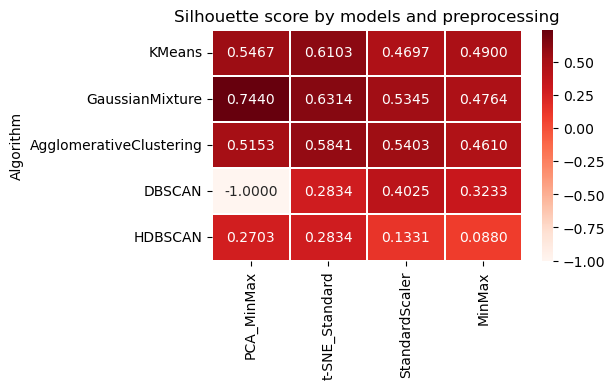

In [35]:
col_name = 'Best_Silhouette_Score'
result_df = pd.concat([rfm_pca_scores[col_name], rfm_tsne_scores[col_name], 
                       rfm_st_scaled_scores[col_name], rfm_mm_scaled_scores[col_name]],
                      axis=1
                      )
result_df.index = [rfm_pca_scores['Algorithm']]
result_df.columns = ['PCA_MinMax','t-SNE_Standard', 'StandardScaler', 'MinMax']


plt.figure(figsize=(5,3))
sns.heatmap(result_df, annot=True, fmt='.4f', cmap='Reds', linewidths=0.1)
plt.title('Silhouette score by models and preprocessing')

plt.show()

In [36]:
df_scores = [('PCA_MinMax', rfm_pca_scores), ('t-SNE_Standard', rfm_tsne_scores), 
             ('MinMax', rfm_mm_scaled_scores), ('StandardScaler', rfm_st_scaled_scores)]

for  name, df in df_scores:
    max_idx = df['Best_Silhouette_Score'].idxmax()
    print(f'{name} DataFrame: Best algorithm = {df.iloc[max_idx, 0]}, \n \
          Best params:  {dict(list((df.iloc[max_idx, -1]).items())[1:])}')

PCA_MinMax DataFrame: Best algorithm = GaussianMixture, 
           Best params:  {'n_components': 3, 'covariance_type': 'full'}
t-SNE_Standard DataFrame: Best algorithm = GaussianMixture, 
           Best params:  {'n_components': 3, 'covariance_type': 'tied'}
MinMax DataFrame: Best algorithm = KMeans, 
           Best params:  {'n_clusters': 3}
StandardScaler DataFrame: Best algorithm = AgglomerativeClustering, 
           Best params:  {'n_clusters': 4, 'linkage': 'ward'}


Для набора данных с предобработкой MinMaxScaler возьмем модель KMeans с лучшими полученными гиперпараметрами, для остальных это будет модель GaussianMixture

### 3.2. Интерпретация результатов кластеризации

Визуализируем результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary

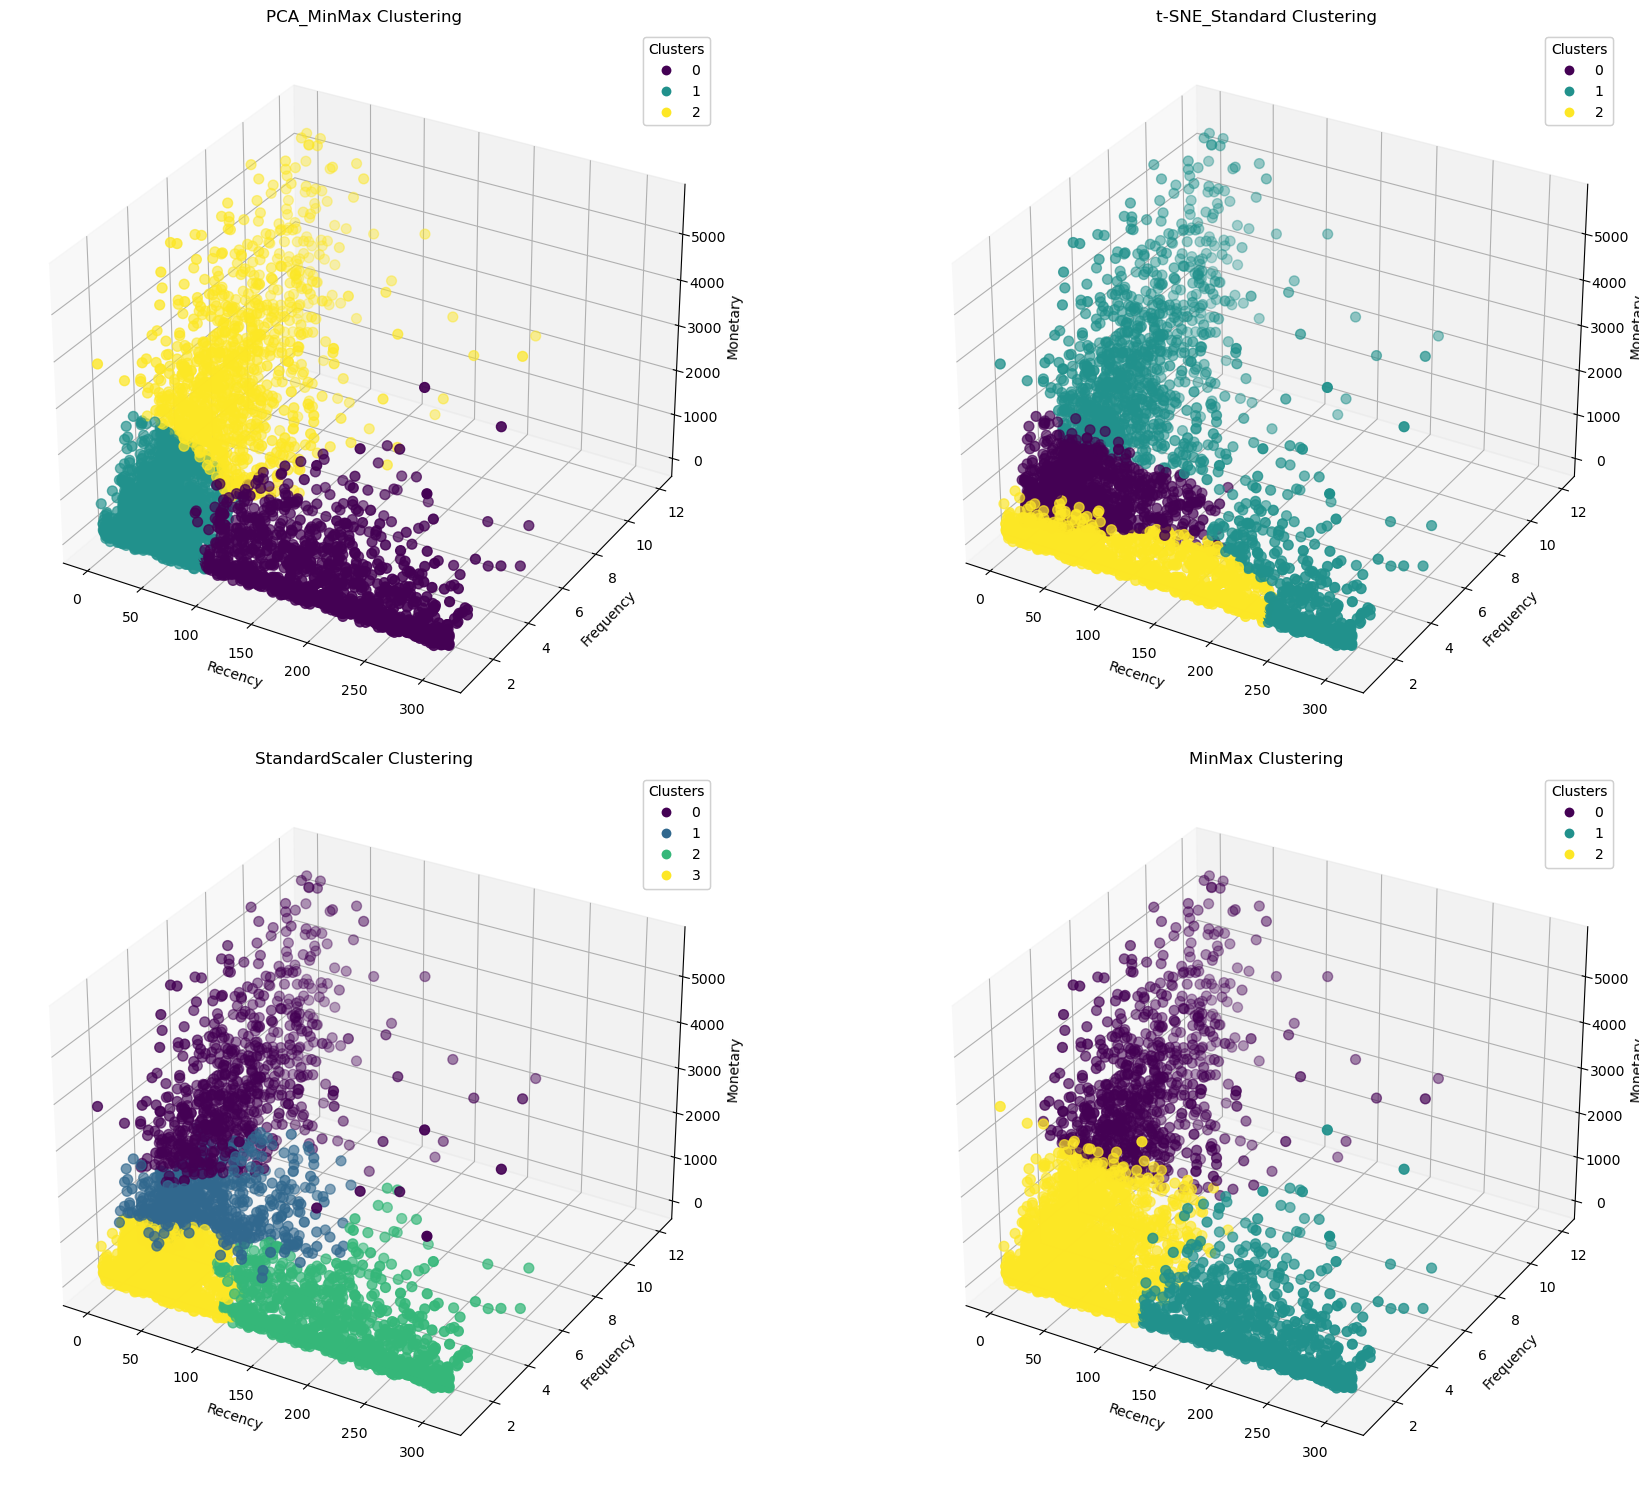

In [38]:
gm_pca = mixture.GaussianMixture(**dict(list(rfm_pca_scores['Best_Params'].iloc[1].items())[1:])) # metric only for DBSCAN and HDBSCAN
clusters_pca_rfm = gm_pca.fit_predict(rfm_pca)

gm_tsne = mixture.GaussianMixture(**dict(list(rfm_tsne_scores['Best_Params'].iloc[1].items())[1:])) # metric only for DBSCAN and HDBSCAN
clusters_tsne_rfm = gm_tsne.fit_predict(rfm_tsne)

km_mm = cluster.KMeans(**dict(list(rfm_mm_scaled_scores['Best_Params'].iloc[0].items())[1:])) # metric only for DBSCAN and HDBSCAN
clusters_mm_rfm = km_mm.fit_predict(rfm_mm_scaled)

ac_st = cluster.AgglomerativeClustering(**dict(list(rfm_st_scaled_scores['Best_Params'].iloc[2].items())[1:])) # metric only for DBSCAN and HDBSCAN
clusters_st_rfm = ac_st.fit_predict(rfm_st_scaled)


clustering_prep= {
    'PCA_MinMax': clusters_pca_rfm,
    't-SNE_Standard': clusters_tsne_rfm,
    'StandardScaler': clusters_st_rfm,
    'MinMax': clusters_mm_rfm
}

fig = plt.figure(figsize=(20, 15))

for i, (name, clustering) in enumerate(clustering_prep.items()):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    

    scatter = ax.scatter(rfm_table['Recency'], rfm_table['Frequency'], rfm_table['Monetary'], c=clustering, cmap='viridis', s=50)
    

    ax.set_title(f'{name} Clustering')
    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Monetary')
    
    legend = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend)

plt.tight_layout()
plt.show()

Построим 3D scatterplot с помощью plotly

In [39]:
fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
                                           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
                    subplot_titles=list(clustering_prep.keys()))


for i, (name, clustering) in enumerate(clustering_prep.items()):
    row = i // 2 + 1  
    col = i % 2 + 1   
 
    scatter = go.Scatter3d(
        x=rfm_table['Recency'], 
        y=rfm_table['Frequency'], 
        z=rfm_table['Monetary'],
        mode='markers',
        marker=dict(
            size=5,
            color=clustering,  
            colorscale='Viridis',
            opacity=0.8
        )
    )
    
    fig.add_trace(scatter, row=row, col=col)


fig.update_layout(height=800, width=800, title_text="Clustering  3D Visualization")
fig.show()

Для кластеризации на MinMax и PCA MinMax наборов данных картина схожая:  
Первая группа клиентов - покупают не часто, преимущественно не больше 4 заказов,и последний раз заказывали давно, также в основном покпают на небольшие суммы - спящие/ушедшие клиенты.  
Вторая группа - это новые клиенты, которые покупали немного но в последние 3-4 месяца и возможно захотят еще.  
Третья группа - это лояльные клиенты: покпают много и последний раз покупали совсем недавно.  

Для StandardScaler набора получились такие же кластеры, но второй кластер новых клиентов разделился на 2: те, кто сделал не больше 2-3 заказов, и те, кто сдела больше 3 заказов.

Также выделяется кластерзация t-SNE набора, т.к. в ней группы разделены примерно так: первая - последний раз заказывали в течение 9 месяцев, не больше двух заказов и в основном на сумму меньше 1000 фунтов, третья - заказывали в ближайшие 5 месяцев, на сумму не больше 2500 фунтов и не более 6 заказов, вторая  - это либо те кто много заказывает и недевно, либо кто мало и давно (как-будто напрашивается еще один кластер).

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

_________

### Кластеризация на основе RFMQ-характеристик

In [44]:
rfmq_table = rfm_table.copy()
rfmq_table['Quantity'] = data.groupby('CustomerID').sum()['RealQuantity'] # total quantity of products
rfmq_table.head()

Recency  Frequency  Monetary  Quantity
CustomerID                                        
12347             2          7   4310.00    2458.0
12348            75          4   1437.24    2332.0
12349            18          1   1457.55     630.0
12350           310          1    294.40     196.0
12352            36          7   1265.41     463.0

Для кластеризации рассмотрим 3 преобразованных набора данных: нормализованных с помощью MinMaxScaler, нормализованных с помощью MinMaxScaler и уменьшенных до 2 размерностей с помощью PCA, стандартизированных с помощью StandardScaler и уменьшенных до 2 размерностей с помощью t-SNE.

In [45]:
scaler_mm = preprocessing.MinMaxScaler()
rfmq_mm_scaled = scaler_mm.fit_transform(rfmq_table)

rfmq_pca = pipeline_pca.fit_transform(rfmq_table)

rfmq_tsne = pipeline_tsne.fit_transform(rfmq_table)


Воспользуемся функциейдля поиска оптимальных гиперпараметров и количества кластеров, написанной ранее.

In [46]:
rfmq_mm_scores = find_optimal_hyperparameters(rfmq_mm_scaled, n_trials=100)
print('Clustering for MinMAxScaled RFMQ table:')
display(rfmq_mm_scores)

rfmq_pca_scores = find_optimal_hyperparameters(rfmq_pca, n_trials=100)
print('Clustering for PCA RFMQ table:')
display(rfmq_pca_scores)

rfmq_tsne_scores = find_optimal_hyperparameters(rfmq_tsne, n_trials=100)
print('Clustering for t-SNE RFMQ table:')
display(rfmq_tsne_scores)

Clustering for MinMAxScaled RFMQ table:


Algorithm  Best_Silhouette_Score  \
0                   KMeans               0.484319   
1          GaussianMixture               0.462660   
2  AgglomerativeClustering               0.473379   
3                   DBSCAN               0.399941   
4                  HDBSCAN               0.075510   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   4302.583121                   0.764430                3   
1                   3985.736070                   0.799277                3   
2                     11.965346                   0.655240                3   
3                    305.156928                   1.336838                3   
4                    389.542409                   2.508838                9   

                                         Best_Params  
0           {'metric': 'euclidean', 'n_clusters': 3}  
1  {'metric': 'euclidean', 'n_components': 3, 'co...  
2  {'metric': 'manhattan', 'n_clusters': 3, 'link...  
3  {'metric': 'manhattan', 'eps': 0.1531325960886...  
4  {'metric': 'manhattan', 'min_samples': 9, 'min...

Clustering for PCA RFMQ table:


Algorithm  Best_Silhouette_Score  \
0                   KMeans               0.547072   
1          GaussianMixture               0.747622   
2  AgglomerativeClustering               0.491258   
3                   DBSCAN               0.370591   
4                  HDBSCAN              -0.117575   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   5817.089035                   0.636056                3   
1                   4845.486200                   0.680535                3   
2                   3474.253965                   0.815123                4   
3                     21.076675                   0.832944                3   
4                    162.196896                   1.281227                3   

                                         Best_Params  
0           {'metric': 'manhattan', 'n_clusters': 3}  
1  {'metric': 'cosine', 'n_components': 3, 'covar...  
2  {'metric': 'manhattan', 'n_clusters': 4, 'link...  
3  {'metric': 'euclidean', 'eps': 0.1036364772570...  
4  {'metric': 'cosine', 'min_samples': 14, 'min_c...

Clustering for t-SNE RFMQ table:


Algorithm  Best_Silhouette_Score  \
0                   KMeans               0.655716   
1          GaussianMixture               0.647895   
2  AgglomerativeClustering               0.468664   
3                   DBSCAN               0.061021   
4                  HDBSCAN               0.075714   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   3525.269823                   0.863756                3   
1                   4674.069315                   0.699540                4   
2                   5175.977917                   0.703900                9   
3                   1309.075125                   4.077289                3   
4                   1309.075125                   4.077289                3   

                                         Best_Params  
0              {'metric': 'cosine', 'n_clusters': 3}  
1  {'metric': 'cosine', 'n_components': 4, 'covar...  
2  {'metric': 'euclidean', 'n_clusters': 9, 'link...  
3  {'metric': 'manhattan', 'eps': 7.7763159174143...  
4  {'metric': 'euclidean', 'min_samples': 19, 'mi...

Результаты схожи с кластеризацией RFM таблицы, метрики немного улучшились лучший результат по  Silhouette_Score - 0,75 дала модель GaussianMixture, на данных обработанных MinMaxScaler и PCA понижением. По метрикам Calinski_Harabasz_Score и Davies_Bouldin_Score также лучший результат получен на этом же наборе данных, но моделью KMeans. Для t-SNE набора луший результат по  Silhouette_Score показала модели KMeans, для MinMax набора также модель KMeans. По всем наборам данных лучший результат показывает на разделение на 3 кластера.  Модели DBSCAN и HDBSCAN опять дали худший результат.  
Теперь соберем для сравнения все значения Silhouette_Score в один датафрейм и выберем модели для интерпритации результатов.

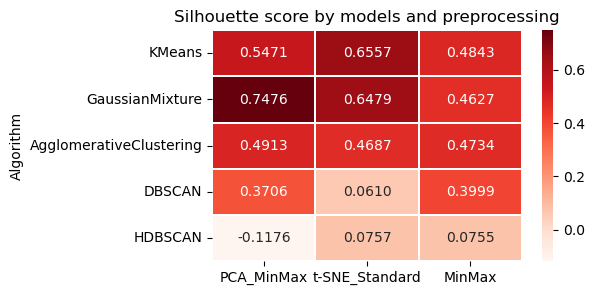

In [47]:
col_name = 'Best_Silhouette_Score'
result_df = pd.concat([rfmq_pca_scores[col_name], 
                       rfmq_tsne_scores[col_name], 
                       rfmq_mm_scores[col_name]],
                      axis=1
                      )
result_df.index = [rfmq_mm_scores['Algorithm']]
result_df.columns = ['PCA_MinMax','t-SNE_Standard', 'MinMax']


plt.figure(figsize=(5,3))
sns.heatmap(result_df, annot=True, fmt='.4f', cmap='Reds', linewidths=0.1)
plt.title('Silhouette score by models and preprocessing')

plt.show()

In [48]:
df_scores = [('PCA_MinMax', rfmq_pca_scores), 
             ('t-SNE_Standard', rfmq_tsne_scores), 
             ('MinMax', rfmq_mm_scores)
        ]

for  name, df in df_scores:
    max_idx = df['Best_Silhouette_Score'].idxmax()
    print(f'{name} DataFrame: Best algorithm = {df.iloc[max_idx, 0]}, \n \
          Best params:  {dict(list((df.iloc[max_idx, -1]).items())[1:])}')

PCA_MinMax DataFrame: Best algorithm = GaussianMixture, 
           Best params:  {'n_components': 3, 'covariance_type': 'full'}
t-SNE_Standard DataFrame: Best algorithm = KMeans, 
           Best params:  {'n_clusters': 3}
MinMax DataFrame: Best algorithm = KMeans, 
           Best params:  {'n_clusters': 3}


Для набора данных с предобработкой MinMaxScaler возьмем модель AgglomerativeClustering с лучшими полученными гиперпараметрами, для t-SNE набора - KMeans, для PCA - это будет модель GaussianMixture. 
Сначала посмотрим на разбмение на кластеры в пониженной размерности: 

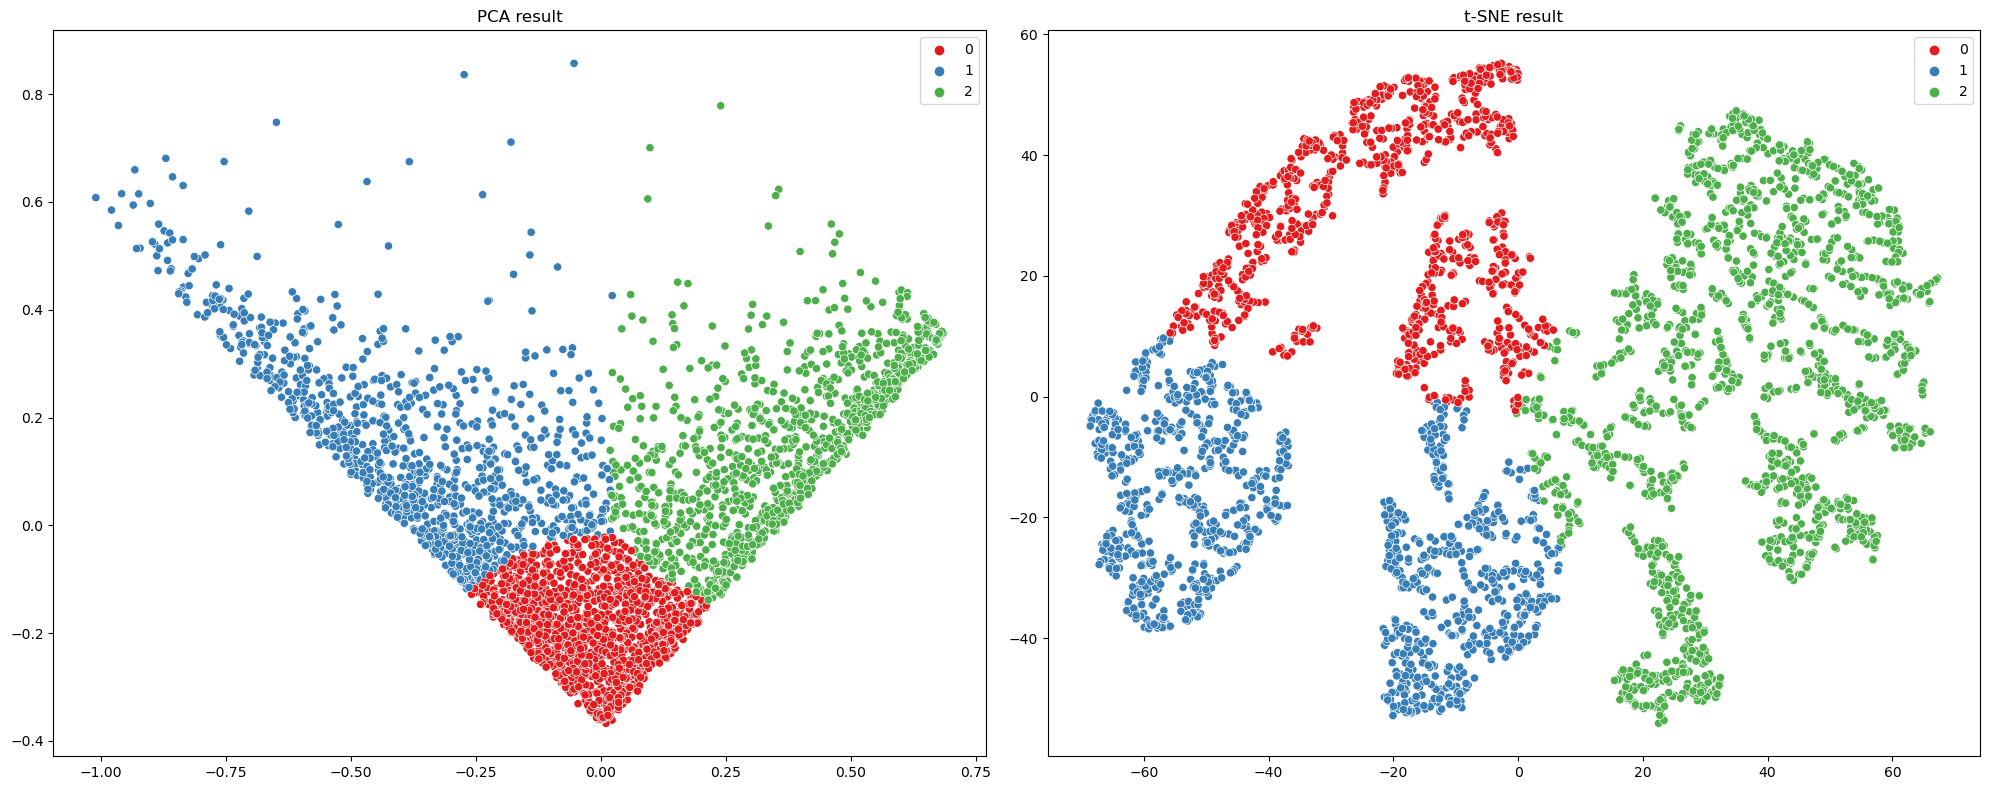

In [49]:
gm_pca = mixture.GaussianMixture(**dict(list(rfmq_pca_scores['Best_Params'].iloc[1].items())[1:])) # metric only for DBSCAN and HDBSCAN
clusters_pca = gm_pca.fit_predict(rfmq_pca)

km_tsne = cluster.KMeans(**dict(list(rfmq_tsne_scores['Best_Params'].iloc[0].items())[1:])) # metric only for DBSCAN and HDBSCAN
clusters_tsne = km_tsne.fit_predict(rfmq_tsne)

ac_mm = cluster.KMeans(**dict(list(rfmq_mm_scores['Best_Params'].iloc[0].items())[1:])) # metric only for DBSCAN and HDBSCAN
clusters_mm = ac_mm.fit_predict(rfmq_mm_scaled)


plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=rfmq_pca[:,0], y=rfmq_pca[:,1], hue=clusters_pca, palette='Set1')
plt.title('PCA result')

plt.subplot(1, 2, 2)
sns.scatterplot(x=rfmq_tsne[:,0], y=rfmq_tsne[:,1], hue=clusters_tsne, palette='Set1')
plt.title('t-SNE result')

plt.tight_layout()
plt.show()

#### Визуализация через построение профиля кластеров
 
Так как признаков уже больше трех для визуализации бкдем использовать построение профиля кластера.

Для визуализации будем использовать Radar Chart.  
На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник.

In [50]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

In [51]:
rfmq_table_pca = rfmq_table.copy()
rfmq_table_pca['clusters_pca'] = clusters_pca
rfmq_pca_for_plot = rfmq_table_pca.groupby('clusters_pca').mean()[['Recency', 'Frequency', 'Monetary', 'Quantity']]

plot_cluster_profile(rfmq_pca_for_plot , 3)

Для PCA  набора:  
Первая группа - это новые клиенты, которые в среднем совершили по одной две покупки в последние 2-3 месяца, так и в товарном выражении, покупают не часто и давно не не покупали.  
Вторая группа - это лояльные клиенты: покпают много как в денежном, так и в товарном выражениии последний раз покупали совсем недавно.  
Третья группа - это уходящие клиенты: не покпали за последние 3 месяца, в среднем покупали более чем полгода назад,делали по одному-два заказа, покупали мало как в денежном, так и в товарном выражениии.

In [52]:
rfmq_table_tsne = rfmq_table.copy()
rfmq_table_tsne['clusters_tsne'] = clusters_tsne
rfmq_tsne_for_plot = rfmq_table_tsne.groupby('clusters_tsne').mean()[['Recency', 'Frequency', 'Monetary', 'Quantity']]

plot_cluster_profile(rfmq_tsne_for_plot, 3)

Для t-SNE  набора:  
Первая группа и третья группа - это как и для PCA набора уходящие и лояльные клиенты, вторая группа здесь - это тоже новые клиенты но границы давности покупок и количества покупок здесь выше по сравнению с кластеризацией PCA набор и совершали они немного меньше покупок в среднем.  

In [53]:
rfmq_table_mm = rfmq_table.copy()
rfmq_table_mm['clusters_mm'] = clusters_mm
rfmq_mm_for_plot = rfmq_table_mm.groupby('clusters_mm').mean()[['Recency', 'Frequency', 'Monetary', 'Quantity']]

plot_cluster_profile(rfmq_mm_for_plot, 3)

In [70]:
rfmq_table_mm[rfmq_table_mm['clusters_mm'] == 1].describe()

Recency    Frequency     Monetary     Quantity  clusters_mm
count  2100.000000  2100.000000  2100.000000  2100.000000       2100.0
mean     45.880000     2.268571   662.039033   417.387619          1.0
std      33.427599     1.215378   484.804564   381.732532          0.0
min       0.000000     1.000000     0.000000     0.000000          1.0
25%      18.000000     1.000000   296.927500   163.750000          1.0
50%      38.500000     2.000000   550.685000   310.000000          1.0
75%      70.000000     3.000000   920.515000   564.000000          1.0
max     137.000000     6.000000  3106.620000  7026.000000          1.0

Для MinMax набора получилось схожие разбиение на кластеры, только к новым клиентам были отнесены клиенты, совершившие свой последний заказ в последние 4 месяца. 

_________

### Кластеризация на основе RFMQ+ характеристик

Создадим несколько дополнительных признаков, в соответствии с гипотезами, выдвинутыми на этапе EDA:  
В таблицу RFMQ добавим:
1. Признак доставки: 1- Великобритания, Ирландия 2 - Европа, 3 - остальные страны.  
2. Признак разнообразия уникальных товаров: количество уникальных товаров (по коду) для каждого покупателя.  
3. Признак постоянного клиента (по уровням): количество месяцев, в которых производилась покупка (12 - клиент оформлял заказ в каждом месяце, 1 - только в одном месяце).  
4. Количество заказов за последние 90 дней для каждого клиента.

In [54]:
addit_table = data.groupby('CustomerID').agg({
    'Country': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0],  # Country
    'StockCode': 'nunique',  # Unique_products
    'Month': 'nunique'  # Loyalty_Level
})
addit_table.columns = ['Delivery_Region', 'Unique_products', 'Loyalty_Level']

nearest = ['United Kingdom', 'EIRE']
others =['Australia', 'Japan', 'Israel', 'Unspecified', 'Singapore', 'USA', 'Canada', 'United Arab Emirates']

addit_table['Delivery_Region'] = addit_table['Delivery_Region'].apply(
    lambda x: 1 if x in nearest else (
        3 if x in others else 2
    )
)

recent_period_start = t_max - pd.DateOffset(days=90)
recent_orders = data[data['InvoiceDate'] >= recent_period_start].groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
recent_orders.columns = ['CustomerID', 'Recent_Orders']
addit_table = addit_table.merge(recent_orders, on='CustomerID', how='left')

addit_table['Recent_Orders'].fillna(0, inplace=True)


rfmq_plus = rfmq_table.merge(addit_table, on='CustomerID', how='left')
rfmq_plus = rfmq_plus.set_index('CustomerID')

display(rfmq_plus.head())
rfmq_plus.describe()

Recency  Frequency  Monetary  Quantity  Delivery_Region  \
CustomerID                                                            
12347             2          7   4310.00    2458.0                2   
12348            75          4   1437.24    2332.0                2   
12349            18          1   1457.55     630.0                2   
12350           310          1    294.40     196.0                2   
12352            36          7   1265.41     463.0                2   

            Unique_products  Loyalty_Level  Recent_Orders  
CustomerID                                                 
12347                   103              6            2.0  
12348                    21              4            1.0  
12349                    72              1            1.0  
12350                    16              1            0.0  
12352                    57              4            3.0

Recency    Frequency     Monetary     Quantity  Delivery_Region  \
count  3801.000000  3801.000000  3801.000000  3801.000000      3801.000000   
mean     83.307814     3.067351   997.086075   618.566956         1.098921   
std      83.651555     2.477836  1014.022198   727.500746         0.323145   
min       0.000000     1.000000     0.000000     0.000000         1.000000   
25%      19.000000     1.000000   299.700000   158.000000         1.000000   
50%      51.000000     2.000000   623.930000   353.000000         1.000000   
75%     127.000000     4.000000  1351.090000   816.000000         1.000000   
max     310.000000    12.000000  5655.480000  9322.000000         3.000000   

       Unique_products  Loyalty_Level  Recent_Orders  
count      3801.000000    3801.000000    3801.000000  
mean         52.823468       2.575638       1.199684  
std          55.891932       1.832636       1.267970  
min           1.000000       1.000000       0.000000  
25%          16.000000       1.000000       0.000000  
50%          34.000000       2.000000       1.000000  
75%          71.000000       3.000000       2.000000  
max         579.000000      10.000000       9.000000

Проведем понижение размерности до 3 признаков:

In [55]:
# Pipeline with PCA
pipeline_pca = pipeline.Pipeline([
    ('scaler', preprocessing.MinMaxScaler()), 
    ('pca', decomposition.PCA(n_components=3))  
])

rfmq_plus_pca = pipeline_pca.fit_transform(rfmq_plus)

# Pipeline with t-SNE
pipeline_tsne = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),  
    ('tsne', manifold.TSNE(n_components=3, random_state=42))  
])

rfmq_plus_tsne = pipeline_tsne.fit_transform(rfmq_plus)

In [56]:
rfmq_plus_pca_scores = find_optimal_hyperparameters(rfmq_plus_pca, n_trials=100)
print('Clustering for PCA RFMQ+ table:')
display(rfmq_plus_pca_scores)

rfmq_plus_tsne_scores = find_optimal_hyperparameters(rfmq_plus_tsne, n_trials=100)
print('Clustering for t-SNE RFMQ+ table:')
display(rfmq_plus_tsne_scores)

Clustering for PCA RFMQ+ table:


Algorithm  Best_Silhouette_Score  \
0                   KMeans               0.481310   
1          GaussianMixture               0.569513   
2  AgglomerativeClustering               0.449664   
3                   DBSCAN               0.484172   
4                  HDBSCAN               0.409119   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   3674.160047                   0.786008                3   
1                   2095.039806                   0.969299                3   
2                   1853.756592                   0.978465                3   
3                     61.787593                   1.494124                3   
4                    243.807809                   1.690659                3   

                                         Best_Params  
0              {'metric': 'cosine', 'n_clusters': 3}  
1  {'metric': 'cosine', 'n_components': 3, 'covar...  
2  {'metric': 'cosine', 'n_clusters': 3, 'linkage...  
3  {'metric': 'manhattan', 'eps': 0.4018605934452...  
4  {'metric': 'manhattan', 'min_samples': 7, 'min...

Clustering for t-SNE RFMQ+ table:


Algorithm  Best_Silhouette_Score  \
0                   KMeans               0.619700   
1          GaussianMixture               0.581908   
2  AgglomerativeClustering               0.604445   
3                   DBSCAN               0.204423   
4                  HDBSCAN               0.015752   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   2833.384309                   0.854913                9   
1                   2436.484298                   0.970282                6   
2                   2581.690067                   0.831936                9   
3                   1216.806639                   1.302936                6   
4                     96.361232                   1.533770                7   

                                         Best_Params  
0              {'metric': 'cosine', 'n_clusters': 9}  
1  {'metric': 'cosine', 'n_components': 6, 'covar...  
2  {'metric': 'cosine', 'n_clusters': 9, 'linkage...  
3  {'metric': 'manhattan', 'eps': 2.9437982911385...  
4  {'metric': 'euclidean', 'min_samples': 5, 'min...

Лучший результат по Silhouette_Score на этот раз показал стандартизированный набор с t-SNE понижением размерности (0.62) на 9 кластерах расчитанных моделью  KMeans, для данного набора она же показала лучший Calinski_Harabasz_Score, а Davies_Bouldin_Score у AgglomerativeClustering.    
Для PCA набора по метрике Silhouette_Score лучшая опять оказалась модель GaussianMixture с 3 кластерами, по мтерикам Calinski_Harabasz_Score и Davies_Bouldin_Score -  модель KMeans с 3 кластерами.  
Для сравнения все значения Silhouette_Score поставим в один датафрейм и выберем модели для интерпритации результатов.


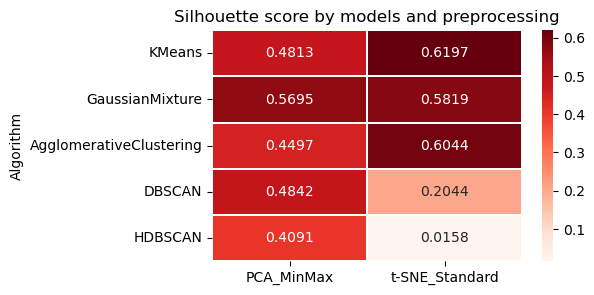

In [57]:
col_name = 'Best_Silhouette_Score'
result_df = pd.concat([rfmq_plus_pca_scores[col_name], 
                       rfmq_plus_tsne_scores[col_name]], 
                      axis=1
                      )
result_df.index = [rfmq_plus_pca_scores['Algorithm']]
result_df.columns = ['PCA_MinMax','t-SNE_Standard']


plt.figure(figsize=(5,3))
sns.heatmap(result_df, annot=True, fmt='.4f', cmap='Reds', linewidths=0.1)
plt.title('Silhouette score by models and preprocessing')

plt.show()

In [58]:
df_scores = [('PCA_MinMax', rfmq_plus_pca_scores), ('t-SNE_Standard', rfmq_plus_tsne_scores)]

for  name, df in df_scores:
    max_idx = df['Best_Silhouette_Score'].idxmax()
    print(f'{name} DataFrame: Best algorithm = {df.iloc[max_idx, 0]}, \n \
          Best params:  {dict(list((df.iloc[max_idx, -1]).items())[1:])}')

PCA_MinMax DataFrame: Best algorithm = GaussianMixture, 
           Best params:  {'n_components': 3, 'covariance_type': 'spherical'}
t-SNE_Standard DataFrame: Best algorithm = KMeans, 
           Best params:  {'n_clusters': 9}


Для набора данных t-SNE  - KMeans с 9 кластерами, для PCA - это будет модель GaussianMixture с 3 кластерами. 

In [59]:
gm_pca = mixture.GaussianMixture(**dict(list(rfmq_plus_pca_scores['Best_Params'].iloc[1].items())[1:]))
clusters_pca = gm_pca.fit_predict(rfmq_plus_pca)

km_tsne = cluster.KMeans(**dict(list(rfmq_plus_tsne_scores['Best_Params'].iloc[0].items())[1:]))
clusters_tsne = km_tsne.fit_predict(rfmq_plus_tsne)

Визаулизация через построение профиля

Для визуализации будем использовать Radar Chart.  

In [60]:
rfmq_plus_pca = rfmq_plus.copy()
rfmq_plus_pca['clusters_pca'] = clusters_pca
rfmq_plus_pca_for_plot = rfmq_plus_pca.groupby('clusters_pca').mean()[rfmq_plus.columns]

plot_cluster_profile(rfmq_plus_pca_for_plot, 3)

Для PCA набора:
 
Первая группа - это новые пробующие клиенты, которые последний раз покупали в среднем в течение 2-3 месяцев, при этом это их первая или вторая покупка,покупалия разнообразный товар,из Великобритании и Ирландии.
Вторая группа - это лояльные клиенты: покпают много как в денежном, так и в товарном выражениии, покупают постоянно в том числе и в последнее время.
Третья группа - уходящие клиенты, которые по всем характеристикам заказывают мало и редко, в последние 4 месяца не заказывали, из Великобритании и Ирландии.  

In [61]:
rfmq_plus_tsne = rfmq_plus.copy()
rfmq_plus_tsne['clusters_tsne'] = clusters_tsne
rfmq_plus_tsne_for_plot = rfmq_plus_tsne.groupby('clusters_tsne').mean()[rfmq_plus.columns]

plot_cluster_profile(rfmq_plus_tsne_for_plot, 9)

Для t-SNE  набора:  
Первая группа - ушедшие клиенты, которые по всем характеристикам заказывают мало и редко, в последнее время не заказывали, из Великобритании и Ирландии.  
Вторая группа - это уходящие клиенты, которые делали заказы раньше, но за последние 3 месяца совершили 1 покупку, и в последний месяц не совершали покупок,  из Великобритании и Ирландии.  
Третья группа - клиенты, пришедшие в последние пару месяцев и сделавшие по одному заказу и больше не вернувшиеся, из Великобритании и Ирландии.     
Четвертая группа - кэто новые сомневающиеся клиенты, которые вернулись делать покупки,покупают разнообразный товар, но в ближайщее время перестали покупать, из Великобритании и Ирландии.    
Пятая группа -  это клиенты, не из Великобритании и Ирландии, объединенные в одну группу.  
Шестая группа - это новые заинтересовавшиеся клиенты, которые покупали часто в последние 3 месяца, и продолжают покупать сейчас,  из Великобритании и Ирландии.
это новые сомневающиеся клиенты, которые осуществили  последние 3 месяца  пару покупок и покупали разнообразный товар, но в ближайщее время перестали покупать, из Великобритании и Ирландии.  
Седьмая группа - это клиенты, которы не делали покупок уже 3 месяца, преимущественно полгода, до этого покупали несколько раз, из Великобритании и Ирландии.  
Восьмая группа - это недовольные клиенты, которые раньше покупали постоянно, но последнее время покупки стали совершать реже, из Великобритании и Ирландии.  
Девятая группа - это лояльные клиенты, которые покупают постоянно и много, из Великобритании и Ирландии.

_____
_____
_____

### Экспериментально

Так как полярная диаграмма по среднему не в полне объемно позволяет оценить качество возможной интерпретации этой кластеризации и с большим числом признаков это достаточно затруднительно, а конечная цель получить хорошо интерпретируемую кластеризациюб попробуем получить такой коэффициент, который численно покажет уровень интерпритациии в получившейся кластеризации.  
Возьмем два основных тезиса:
1. Чем лучше объекты кластера отделены от объектов другого кластера на области значений признака, тем лучше данный признак можно интерпретировать. Например: клиенты, которые совершают от 1 до 2 покупок, клиенты, которые совершают от 3 до 5 покупок и клиенты, которые покупают больше 5 покупок.
2. Если объекты слабо разделимы на всех признаках, но абсолютно разделимы на одном признаке, то это тоже хорошо интерпретируемый результат. Например: клиенты из разных стран, могут иметь схожие показатели по всем характеристикам, но для интерпретации кластеризации этот фактор будет важнее.  

Алгоритм подсчета коэффициента интерпретации:
-  Посчитать количество вхождений точек других кластеров в диапозон значений по i-тому признаку для j-того кластера (для устранения возможных выбросов стоит взять диапозон не от миниммума до максимума, а от близких к ним квантилей) и поделить на количество точек, не принадлежащих j-тому кластера. Получается доля точек других кластеров, которые входят в диапазон данного кластера. В идельном слкчае, абсолютное разделение, доля равна нулю, в худшем, в диапазон входят все точки - 1.
- Посчитать долю вхождений для каждого кластера по каждому признаку (Матрица долей).
- Просуммировать доли вхождений по каждому признаку для кажого кластера и разделить на количество признаков, усиленное, если одна из долей была равно нулю (т.е. если для одного признака, есть абсолютное разделение по данному признаку - тезис 2). Усилим, умножив количество признаков на 2 в степени k+1, где изначально k=0, а каждый признак, который абсолютно разделим добавляет единицу к k. Получатся коэффициенты интерпритации для каждого кластера.  
- Посчитать средний взвешенный коэффициент для всех кластеров (Итоговоый коэффициент).

Коэффициент будет изменяться от 0 до 1.




In [347]:
def interpretation_score(data, cluster_labels, feature_names, quantile_min=0.01, quantile_max=0.99):
    """
    This function counts ratio of number of points from each cluster that fall into the feature quantiles of other clusters, 
    and then counts score of interpretation for each cluster, and weighted average for all clusters.

    Args:
        data (DataFrame or ndarray): DataFrame for counting metric.
        cluster_labels (pd.Series or np.array): predicted cluster labels.
        feature_names (list): list of featurenames
        quantile_min (float): Min quantile (default 0.01).
        quantile_max (float): Max quantile (default 0.99).
    
    Returns:
        DataFrame of ratio for each cluster and each feature, list of interpretation score for each cluster, result interpretation score
    """

    
    result_df = pd.DataFrame(columns=(["Cluster"] + feature_names))

    
    unique_clusters = np.unique(cluster_labels)
    cluster_score = []
    cluster_size = []
    m = len(feature_names)
    n = data.shape[0]

    
    for cluster in unique_clusters:
        k = 0
        cluster_points = data[cluster_labels == cluster]
        cluster_size.append(cluster_points.shape[0])
        feature_range_counts = {feature: 0 for feature in feature_names}

        for feature in feature_names:
            min_quantile = cluster_points[feature].quantile(quantile_min)
            max_quantile = cluster_points[feature].quantile(quantile_max)

            # count how many points from other clusters fall within this quantile range
            for other_cluster in unique_clusters:
                if other_cluster != cluster:
                    other_cluster_points = data[cluster_labels == other_cluster]
                                        
                    count_in_range = ((other_cluster_points[feature] >= min_quantile) &
                                      (other_cluster_points[feature] <= max_quantile)).sum()                     
                    feature_range_counts[feature] += count_in_range
            
            if feature_range_counts[feature] == 0: # k is encouragement for an absolute separation
                k += 1
            # count proportion for feature and cluster    
            feature_range_counts[feature] /= (n-cluster_points.shape[0])

        # add to matrix of proportions
        result_df = result_df.append({"Cluster": cluster, **feature_range_counts}, ignore_index=True)
        # count encouraged mean for cluster
        cluster_score.append(sum(feature_range_counts.values()) / (m*2**k)) # 2**k is encouragement for an absolute separation of cluster
    
    # result score    
    score = sum([num*score for num, score in zip(cluster_size, cluster_score)]) / n  


    return result_df, cluster_score, score

Проверим полученный коэффициент интерпретации на проведенной кластерзации RFMQ+ таблиц

In [348]:
interpretation_score(rfmq_plus, clusters_pca, list(rfmq_plus.columns))

(   Cluster   Recency  Frequency  Monetary  Quantity  Delivery_Region  \
 0      0.0  0.570652   0.664298  0.730351  0.780936         0.854933   
 1      1.0  0.962416   1.000000  0.922595  0.905593         1.000000   
 2      2.0  0.055126   0.730756  0.744202  0.832269         0.883361   
 
    Unique_products  Loyalty_Level  Recent_Orders  
 0         0.890468       0.604097       0.904264  
 1         0.949441       1.000000       1.000000  
 2         0.835966       0.682017       0.131429  ,
 [0.75, 0.9675055928411633, 0.6118907563025211],
 0.809598927412561)

Для GaussianMixture кластеризации PCA набора на 3 кластера коэффициент получился 0,81. Причем в списке коэффициентов для кажого кластера  - лучший коэффициент имеет третий кластер (0,61), который было легко интерпретировать - это клинеты которые покупают мало и давно не покупали. В матрице долей можно заметить, что второй кластер имеет несколько единиц, что говорит о том, что в этом кластере представлены все частоты покупок в общем и за последние 3 месяца, все регионы и все уровни лояльности. Т.е. данный класс сложнее всего интерпретировать (коэф. 0,97).

In [349]:
interpretation_score(rfmq_plus, clusters_tsne, list(rfmq_plus.columns))

(   Cluster   Recency  Frequency  Monetary  Quantity  Delivery_Region  \
 0      0.0  0.180245   0.470274  0.632589  0.654294         0.890846   
 1      1.0  0.647458   0.470056  0.700847  0.772599         0.901977   
 2      2.0  0.596022   0.476072  0.696395  0.729646         0.892169   
 3      3.0  0.636052   0.659800  0.740773  0.816309         0.900715   
 4      4.0  0.993631   0.990446  0.977707  0.982629         0.000000   
 5      5.0  0.587632   0.449883  0.839977  0.831770         0.898300   
 6      6.0  0.228242   0.879515  0.773535  0.848135         0.897276   
 7      7.0  0.857015   0.990149  0.434328  0.654030         0.896418   
 8      8.0  0.486694   0.374630  0.520402  0.602306         0.897398   
 
    Unique_products  Loyalty_Level  Recent_Orders  
 0         0.722240       0.253853       0.187166  
 1         0.950565       0.506497       0.348305  
 2         0.752952       0.262896       0.283095  
 3         0.896996       0.579971       0.339914  
 4      

Для KMeans кластеризации  t-SNE набора на 9 кластеров коэффициент получился значительно ниже 0,63. В списке коэффициентов для кластеров выделяется пятый кластер (коэф. 0,43), это как раз группа клиентов из других стран (не из Великобритании и Ирландии), если посмотреть в матрицу долей то там по признаку 'Delivery_Region' будет стоять ноль, это значит, что в остальных группах нет клиентов из других стран, поэтому при расчете коэффициента интерпритации для данного кластера применялось усиленное среднее - сумма долей делилась не на 8 (количество признаков), а на 8*2**(0+1)=16. Еще можно заметить, что по остальным признакам данная группа не выделяется, все коэффициенты близки к единице.  
Также можно увидеть, что в шестой группе доля по признаку Recent_Orders равна 0,14. Если проверить, то в данный кластер попали только те клиенты, которые делали ровно два заказа за последние 3 месяца, и только 14% из клиентов других кластеров делали также ровно 2 заказа в последние 3 месяца.
Еще можно выделить первый кластер (коэф. 0,50), он также легко интерпретировался - это ушедшие клиенты.

Посмотрим еще коэффициенты интерпритации для RFM таблиц и кластеризации произведенной на PCA наборе и t-SNE наборе:

In [92]:
print('Interpretation_score for RFM table and t-SNE clastering')
display(interpretation_score(rfm_table, clusters_tsne_rfm, list(rfm_table)))

print('Interpretation_score for RFM table and PCA clastering')
display(interpretation_score(rfm_table, clusters_pca_rfm, list(rfm_table)))

Interpretation_score for RFM table and t-SNE clastering


(   Cluster   Recency  Frequency  Monetary
 0      0.0  0.703925   0.702056  0.747664
 1      1.0  0.996998   1.000000  0.974271
 2      2.0  0.811946   0.350289  0.532563,
 [0.7178816199376947, 0.990423098913665, 0.5649325626204239],
 0.7746842691066165)

Interpretation_score for RFM table and PCA clastering


(   Cluster   Recency  Frequency  Monetary
 0      0.0  0.037397   0.788706  0.814136
 1      1.0  0.436782   0.634943  0.735172
 2      2.0  0.707592   0.527061  0.381039,
 [0.5467464472700074, 0.6022988505747127, 0.5385639907979175],
 0.5682547328239933)

Действтительно, как и на 3D визуализации GaussianMixture кластеризация PCA набора (коэф. 0.57) более легко интерпретируется, чем t-SNE набор (коэф. 0.77). Также можно заметить, что в кластеризации t-SNE набора в диапазоны второго кластера по всем признакам попадают почти все точки других кластеров, что заметно ухудшает интерпретацию данного кластера. А в кластеризации PCA набора, наоборот есть первый кластер, в диапазон значений по давности покупки которого попадают только 4 процента объектов из других кластеров. Это как раз кластер, клиенты которого давно не покупали.

_____

Можно попробовать пойти дальше и написать функцию оптимизации гиперпараметров, которая будет искать лучшую кластеризацию по коэффициенту интерпретации, так как конечная цель исследования получить кластеры, которые хорошо интерпретируются. Преобразуем ранее написанную функцию, поменяв метрику для оптимизации на коэффициент интерпретации, рассчитанный на исходном наборе, также сократим максимальное количество кластеров до 8.

In [305]:
def optimize_cluster_interp(algorithm, data, data_origin, trial):
    """This function optimizes a clustering algorithm by tuning its hyperparameters 
    and evaluating the model's performance using clustering quality metrics

    Args:
        algorithm (str): clustering algorithm to optimize
        data (DataFrame or ndarray): dataset forclustering 
        data_origin (DataFrame or ndarray): dataset for counting interpretation_score
        trial (optuna.Trial): trial object from Optuna
        

    Returns:
        values of metrics"""
        
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'cosine'])
    
    if algorithm == 'KMeans':
        n_clusters = trial.suggest_int('n_clusters', 3, 8)
        model = cluster.KMeans(n_clusters=n_clusters, random_state=42)

    elif algorithm == 'GaussianMixture':
        n_components = trial.suggest_int('n_components', 3, 8)
        covariance_type = trial.suggest_categorical('covariance_type', ['full', 'tied', 'diag', 'spherical'])
        model = mixture.GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)

    elif algorithm == 'AgglomerativeClustering':
        n_clusters = trial.suggest_int('n_clusters', 3, 8)
        linkage = trial.suggest_categorical('linkage', ['ward', 'complete', 'average', 'single'])
        model = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)

    elif algorithm == 'DBSCAN':
        eps = trial.suggest_loguniform('eps', 0.01, 50)
        min_samples = trial.suggest_int('min_samples', 3, 20)
        model = cluster.DBSCAN(eps=eps, min_samples=min_samples, metric=metric)

    elif algorithm == 'HDBSCAN':
        min_samples = trial.suggest_int('min_samples', 3, 20)
        min_cluster_size = trial.suggest_int('min_cluster_size', 5, 100)
        model = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, metric=metric)
    
    else:
        raise ValueError("Unknown algorithm: {}".format(algorithm))

    try:
        labels = model.fit_predict(data)
        
        if (8 > len(set(labels)) > 2):
            interp_score = interpretation_score(data_origin, labels, data_origin.columns)[2]
            silhouette_score = metrics.silhouette_score(data, labels, metric=metric)
            calinski_harabasz_score = metrics.calinski_harabasz_score(data, labels)
            davies_bouldin_score = metrics.davies_bouldin_score(data, labels)
        else:
            interp_score = 1
            silhouette_score = -1
            calinski_harabasz_score = -1
            davies_bouldin_score = -1

    except NotFittedError:
        interp_score = 1
        silhouette_score = -1
        calinski_harabasz_score = -1
        davies_bouldin_score = -1
    
    return interp_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score, len(set(labels))


def find_optimal_hyperparameters_interp(data, data_origin, n_trials=50):
    """This function optimizes hyperparameters for various clustering algorithms and finds the best-performing model for each algorithm.

    Args:
        data (DataFrame or ndarray): dataset for clustering 
        data_origin (DataFrame or ndarray): dataset for counting interpretation_score
        n_trials (int, optional): number of trials. Defaults to 50.

    Returns:
        DataFrame: DataFrame with best metrics, algorytm and hyperparameters
    """
    algorithms = ['KMeans', 'GaussianMixture', 'AgglomerativeClustering', 'DBSCAN', 'HDBSCAN']
    results = []

    for algorithm in algorithms:
        def objective(trial):
            interp_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score, n_clusters = optimize_cluster_interp(algorithm, data,data_origin, trial)
            return interp_score
        
        optuna.logging.set_verbosity(optuna.logging.WARNING)

        study = optuna.create_study(direction='minimize')
        study.optimize(objective, n_trials=n_trials)

        # Получаем лучшую модель и параметры
        best_interpretation_score, best_silhouette_score, best_calinski_harabasz_score, best_davies_bouldin_score, best_n_clusters = optimize_cluster_interp(algorithm, data, data_origin, study.best_trial)

        # Сохраняем результаты для каждого алгоритма
        results.append({
            'Algorithm': algorithm,
            'Best_interpretation_score': best_interpretation_score,
            'Best_Silhouette_Score': best_silhouette_score,
            'Best_Calinski_Harabasz_Score': best_calinski_harabasz_score,
            'Best_Davies_Bouldin_Score': best_davies_bouldin_score,
            'Best_n_clusters': best_n_clusters,
            'Best_Params': study.best_params
        })
        
        
    return pd.DataFrame(results)

Подберем оптимальную кластеризацию для RFM таблиц

In [94]:
rfm_pca_scores_int = find_optimal_hyperparameters_interp(rfm_pca, rfm_table, n_trials=70)
print('Clustering for PCA RFM table:')
display(rfm_pca_scores_int)

rfm_tsne_scores_int = find_optimal_hyperparameters_interp(rfm_tsne, rfm_table, n_trials=70)
print('Clustering for t-SNE RFM table:')
display(rfm_tsne_scores_int)

rfm_mm_scaled_scores_int = find_optimal_hyperparameters_interp(rfm_mm_scaled, rfm_table, n_trials=70)
print('Clustering for MinMaxScaled RFM table:')
display(rfm_mm_scaled_scores_int)

rfm_st_scaled_scores_int = find_optimal_hyperparameters_interp(rfm_st_scaled, rfm_table, n_trials=70)
print('Clustering for StandardScaled RFM table:')
display(rfm_st_scaled_scores_int)

Clustering for PCA RFM table:


Algorithm  Best_interpretation_score  Best_Silhouette_Score  \
0                   KMeans                   0.530154               0.311932   
1          GaussianMixture                   0.521061               0.426319   
2  AgglomerativeClustering                   0.520043               0.426148   
3                   DBSCAN                   0.873497               0.380112   
4                  HDBSCAN                   0.740595              -0.415582   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   5820.637772                   0.774849                7   
1                   5540.763157                   0.773915                7   
2                   5206.746955                   0.822965                7   
3                     16.595488                   0.917079                3   
4                    444.863949                   1.195462                7   

                                         Best_Params  
0              {'metric': 'cosine', 'n_clusters': 7}  
1  {'metric': 'euclidean', 'n_components': 7, 'co...  
2  {'metric': 'euclidean', 'n_clusters': 7, 'link...  
3  {'metric': 'euclidean', 'eps': 0.1276624020208...  
4  {'metric': 'cosine', 'min_samples': 15, 'min_c...

Clustering for t-SNE RFM table:


Algorithm  Best_interpretation_score  Best_Silhouette_Score  \
0                   KMeans                   0.553788               0.449689   
1          GaussianMixture                   0.542320               0.491439   
2  AgglomerativeClustering                   0.515579               0.453584   
3                   DBSCAN                   0.569363               0.274306   
4                  HDBSCAN                   0.610116               0.109645   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   4844.953270                   0.720612                7   
1                   4636.804065                   0.706080                7   
2                   4600.864811                   0.742130                7   
3                   1675.682556                   0.870461                7   
4                   1505.433038                   1.249623                6   

                                         Best_Params  
0           {'metric': 'manhattan', 'n_clusters': 7}  
1  {'metric': 'cosine', 'n_components': 7, 'covar...  
2  {'metric': 'euclidean', 'n_clusters': 7, 'link...  
3  {'metric': 'euclidean', 'eps': 3.9962512127944...  
4  {'metric': 'euclidean', 'min_samples': 20, 'mi...

Clustering for MinMaxScaled RFM table:


Algorithm  Best_interpretation_score  Best_Silhouette_Score  \
0                   KMeans                   0.532242               0.377325   
1          GaussianMixture                   0.507469               0.053930   
2  AgglomerativeClustering                   0.568945              -0.046935   
3                   DBSCAN                   1.000000              -1.000000   
4                  HDBSCAN                   1.000000              -1.000000   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   3740.439300                   0.948366                6   
1                    742.864780                   2.062237                7   
2                   3571.933262                   0.975710                4   
3                     -1.000000                  -1.000000                1   
4                     -1.000000                  -1.000000                9   

                                         Best_Params  
0           {'metric': 'manhattan', 'n_clusters': 6}  
1  {'metric': 'cosine', 'n_components': 7, 'covar...  
2  {'metric': 'cosine', 'n_clusters': 4, 'linkage...  
3  {'metric': 'euclidean', 'eps': 87.787016002781...  
4  {'metric': 'cosine', 'min_samples': 11, 'min_c...

Clustering for StandardScaled RFM table:


Algorithm  Best_interpretation_score  Best_Silhouette_Score  \
0                   KMeans                   0.523424               0.367312   
1          GaussianMixture                   0.507405               0.063676   
2  AgglomerativeClustering                   0.544425               0.406544   
3                   DBSCAN                   0.661741              -0.256472   
4                  HDBSCAN                   0.573860               0.102183   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   3372.179573                   0.925687                7   
1                   1052.524679                   1.989344                7   
2                    832.957491                   0.936462                5   
3                    317.025186                   1.719710                7   
4                    630.599308                   2.508148                7   

                                         Best_Params  
0           {'metric': 'manhattan', 'n_clusters': 7}  
1  {'metric': 'euclidean', 'n_components': 7, 'co...  
2  {'metric': 'manhattan', 'n_clusters': 5, 'link...  
3  {'metric': 'euclidean', 'eps': 0.1487916331591...  
4  {'metric': 'manhattan', 'min_samples': 13, 'mi...

Выбирать оптимальную модель с подобранными гиперпараметрами будем сбаансировано, обращая внимание на коэффициент интерпретации и остальные метрики.

In [99]:
print(f"For PCA: algorithm - GaussianMixture, \n \
      best_params: {dict(list((rfm_pca_scores_int['Best_Params'].iloc[1]).items())[1:])}")

print(f"For t-SNE: algorithm - AgglomerativeClustering, \n \
      best_params: {dict(list((rfm_tsne_scores_int['Best_Params'].iloc[2]).items())[1:])}")

print(f"For MinMaxScaled: algorithm - KMeans, \n \
      best_params: {dict(list((rfm_mm_scaled_scores_int['Best_Params'].iloc[0]).items())[1:])}")

print(f"For StandardScaled: algorithm - KMeans, \n \
      best_params: {dict(list((rfm_st_scaled_scores_int['Best_Params'].iloc[0]).items())[1:])}")

For PCA: algorithm - GaussianMixture, 
       best_params: {'n_components': 7, 'covariance_type': 'spherical'}
For t-SNE: algorithm - AgglomerativeClustering, 
       best_params: {'n_clusters': 7, 'linkage': 'ward'}
For MinMaxScaled: algorithm - KMeans, 
       best_params: {'n_clusters': 6}
For StandardScaled: algorithm - KMeans, 
       best_params: {'n_clusters': 7}


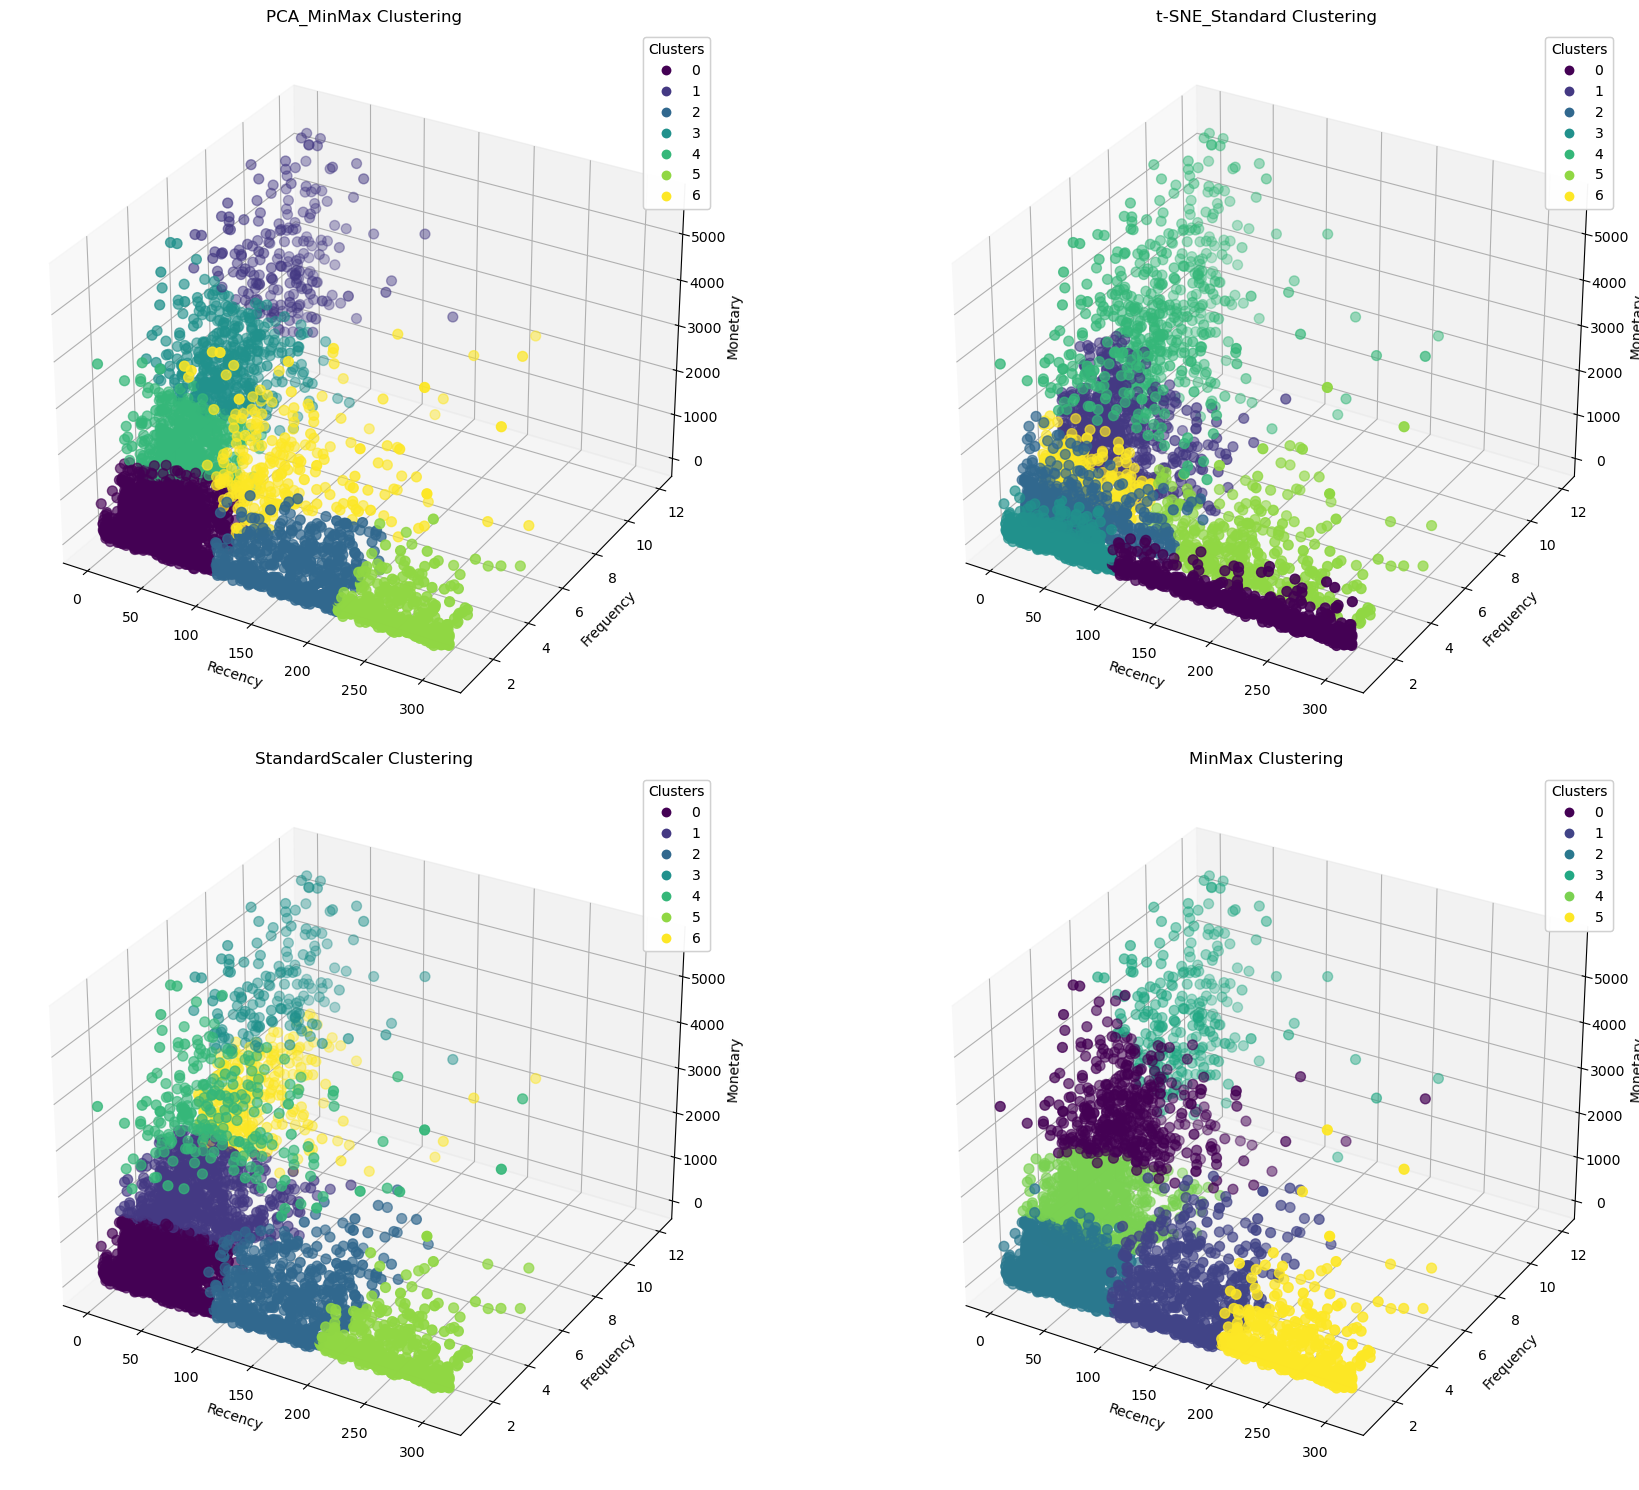

In [122]:
gm_pca = mixture.GaussianMixture(**dict(list(rfm_pca_scores_int['Best_Params'].iloc[1].items())[1:]))
clusters_pca_int = gm_pca.fit_predict(rfm_pca)

ac_tsne = cluster.AgglomerativeClustering(**dict(list(rfm_tsne_scores_int['Best_Params'].iloc[2].items())[1:]))
clusters_tsne_int = ac_tsne.fit_predict(rfm_tsne)

km_mm = cluster.KMeans(**dict(list(rfm_mm_scaled_scores_int['Best_Params'].iloc[0].items())[1:]))
clusters_mm_int = km_mm.fit_predict(rfm_mm_scaled)

km_st = cluster.KMeans(**dict(list(rfm_st_scaled_scores_int['Best_Params'].iloc[0].items())[1:]))
clusters_st_int = km_st.fit_predict(rfm_st_scaled)


clustering_prep_int= {
    'PCA_MinMax': clusters_pca_int,
    't-SNE_Standard': clusters_tsne_int,
    'StandardScaler': clusters_st_int,
    'MinMax': clusters_mm_int
}

fig = plt.figure(figsize=(20, 15))

for i, (name, clustering) in enumerate(clustering_prep_int.items()):
    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    

    scatter = ax.scatter(rfm_table['Recency'], rfm_table['Frequency'], rfm_table['Monetary'], c=clustering, cmap='viridis', s=50)
    

    ax.set_title(f'{name} Clustering')
    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Monetary')
    
    legend = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend)

plt.tight_layout()
plt.show()

In [123]:
fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
                                           [{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
                    subplot_titles=list(clustering_prep_int.keys()))


for i, (name, clustering) in enumerate(clustering_prep_int.items()):
    row = i // 2 + 1  
    col = i % 2 + 1   
 
    scatter = go.Scatter3d(
        x=rfm_table['Recency'], 
        y=rfm_table['Frequency'], 
        z=rfm_table['Monetary'],
        mode='markers',
        marker=dict(
            size=5,
            color=clustering,  
            colorscale='Viridis',
            opacity=0.8
        )
    )
    
    fig.add_trace(scatter, row=row, col=col)


fig.update_layout(height=800, width=800, title_text="Clustering  3D Visualization")
fig.show()

Интерпретация результатов кластеризации:  

Для PCA набора:  
Первый кластер - новые клиенты, совершили по одной-две покупки, покупают преимущественно в последние 2 месяца.  
Второй кластер - лояльные оптовые клиенты, закупают много и часто, на большие суммы и не перестают закупать.   
Третий кластер - ухоядщие клиенты, котрые уже на закупали от 100 до 200 дней, раньше делали по 1-2 заказу на небольшие суммы.  
Четвертый кластер - лояльные неоптовые клиенты, закупают часто не крупные заказы, продолжают закупать сейчас.  
Пятый кластер - новые заинтересовавшиеся клиенты, сделали в среднем по 4 заказа, купили на небольшую сумму, продолжают заупать.  
Шестой кластер - ушедшие клиенты, которые сделали один заказ и уже не менее 7 месяцев не заказывали.  
Седьмой кластер - недовольные клиенты, раньше они закупали в среднем по 4 заказа, на разные суммы, но уже более 2 месяцев не покупают.  

Для MinMaxScaled набора схожее разбиение на кластеры, только седьмой кластер разбит между третьим, шестым, вторым и четвертым кластером.  

Для StandardScaled набора:  
Первый кластер - новые клиенты, совершили по одной-две покупки, покупают преимущественно в последние 2 месяца.  
Второй кластер - лояльные клиенты, которые выставили по 3-5  заказов на небольшие суммы, продолжают закупать в последнее время.    
Третий кластер - ухоядщие клиенты, котрые уже на закупали от 3 до 7 месяцев, раньше делали по 1-2 заказу на небольшие суммы.  
Четвертый кластер - лояльные оптовые клиенты, закупают много и часто, на большие суммы и не перестают закупать сейчас.  
Пятый кластер - это клиенты, которые закупали либо дорогие товары, либо много товаров в одном заказе, это те клиенты, которые много потратили, но сделали в среднем по 4 заказа.    
Шестой кластер - ушедшие клиенты, которые сделали в среднем по одному заказу и уже не менее 7 месяцев не заказывали.  
Седьмой кластер - лояльные неоптовые клиенты, закупают часто, но не крупные заказы, преимущественно продолжают закупать сейчас.  

Для t-SNE набора кластеризация достаточно отличается и основоное разделение клиентов представлено по оси частоты заказов:  
Первый кластер - ушедшие клиенты, которые сделали ровно 1 заказ более 100 дней назад и больше не заказывали. 
Второй кластер - лояльные клиенты, которые выставили по 4-5  заказов на небольшие суммы, продолжают закупать в последнее время.    
Третий кластер -клиенты, котрые преимущественно в последние 3 месяца сделали либо 2 не крупных заказа, либо один средний заказ.  
Четвертый кластер - новые клиенты, совершили ровно одну покупку в последние 100 дней.  
Пятый кластер - крупные клиенты, которые совершили либо много заказов, либо на крупную сумму, преимущественно продолжают закупать сейчас.    
Шестой кластер - уходящие клиенты, которые сделали более одной покупки и уже более 3 месяцев не заказывали.  
Седьмой кластер - лояльные  клиенты, которые совершили ровно три покупки, последняя из которых была в течение ближайших 3 месяцев.  


_______

Теперь рассмотрим RFMQ таблицу, рассмотрим ранее сформированные таблицы с понижением размерности до 2 признаков.

In [105]:
rfmq_pca_scores_int = find_optimal_hyperparameters_interp(rfmq_pca, rfmq_table, n_trials=70)
print('Clustering for PCA RFMQ table:')
display(rfmq_pca_scores_int)

rfmq_tsne_scores_int = find_optimal_hyperparameters_interp(rfmq_tsne, rfmq_table, n_trials=70)
print('Clustering for t-SNE RFMQ table:')
display(rfmq_tsne_scores_int)

Clustering for PCA RFMQ table:


Algorithm  Best_interpretation_score  Best_Silhouette_Score  \
0                   KMeans                   0.584312               0.393578   
1          GaussianMixture                   0.552255               0.188303   
2  AgglomerativeClustering                   0.599946               0.353573   
3                   DBSCAN                   1.000000              -1.000000   
4                  HDBSCAN                   0.723335               0.057072   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   5817.005828                   0.825048                7   
1                   2430.019492                   1.547353                7   
2                   5130.736096                   0.895844                7   
3                     -1.000000                  -1.000000                1   
4                    784.359770                   1.497316                7   

                                         Best_Params  
0           {'metric': 'manhattan', 'n_clusters': 7}  
1  {'metric': 'euclidean', 'n_components': 7, 'co...  
2  {'metric': 'euclidean', 'n_clusters': 7, 'link...  
3  {'metric': 'euclidean', 'eps': 0.9488126654393...  
4  {'metric': 'euclidean', 'min_samples': 3, 'min...

Clustering for t-SNE RFMQ table:


Algorithm  Best_interpretation_score  Best_Silhouette_Score  \
0                   KMeans                   0.601909               0.439237   
1          GaussianMixture                   0.585707               0.497840   
2  AgglomerativeClustering                   0.592117               0.436698   
3                   DBSCAN                   0.698679               0.030205   
4                  HDBSCAN                   0.747407              -0.186860   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   4712.019740                   0.787936                6   
1                   4656.762208                   0.720364                7   
2                   4371.252534                   0.716368                7   
3                   1198.041919                   3.037958                7   
4                    788.691486                   3.295537                5   

                                         Best_Params  
0           {'metric': 'manhattan', 'n_clusters': 6}  
1  {'metric': 'cosine', 'n_components': 7, 'covar...  
2  {'metric': 'euclidean', 'n_clusters': 7, 'link...  
3  {'metric': 'manhattan', 'eps': 5.1107160359081...  
4  {'metric': 'manhattan', 'min_samples': 11, 'mi...

Выбирать оптимальную модель с подобранными гиперпараметрами будем также сбалансировано, обращая внимание на коэффициент интерпретации и остальные метрики.  

Для PCA набора это будет алгоритм KMeans с 7 кластерами, а для t-SNE набора - модель AgglomerativeClustering с параметрами: 'n_clusters'=7, 'linkage'='average'.

Посмотрим на кластеризацию в двумерном пространстве.

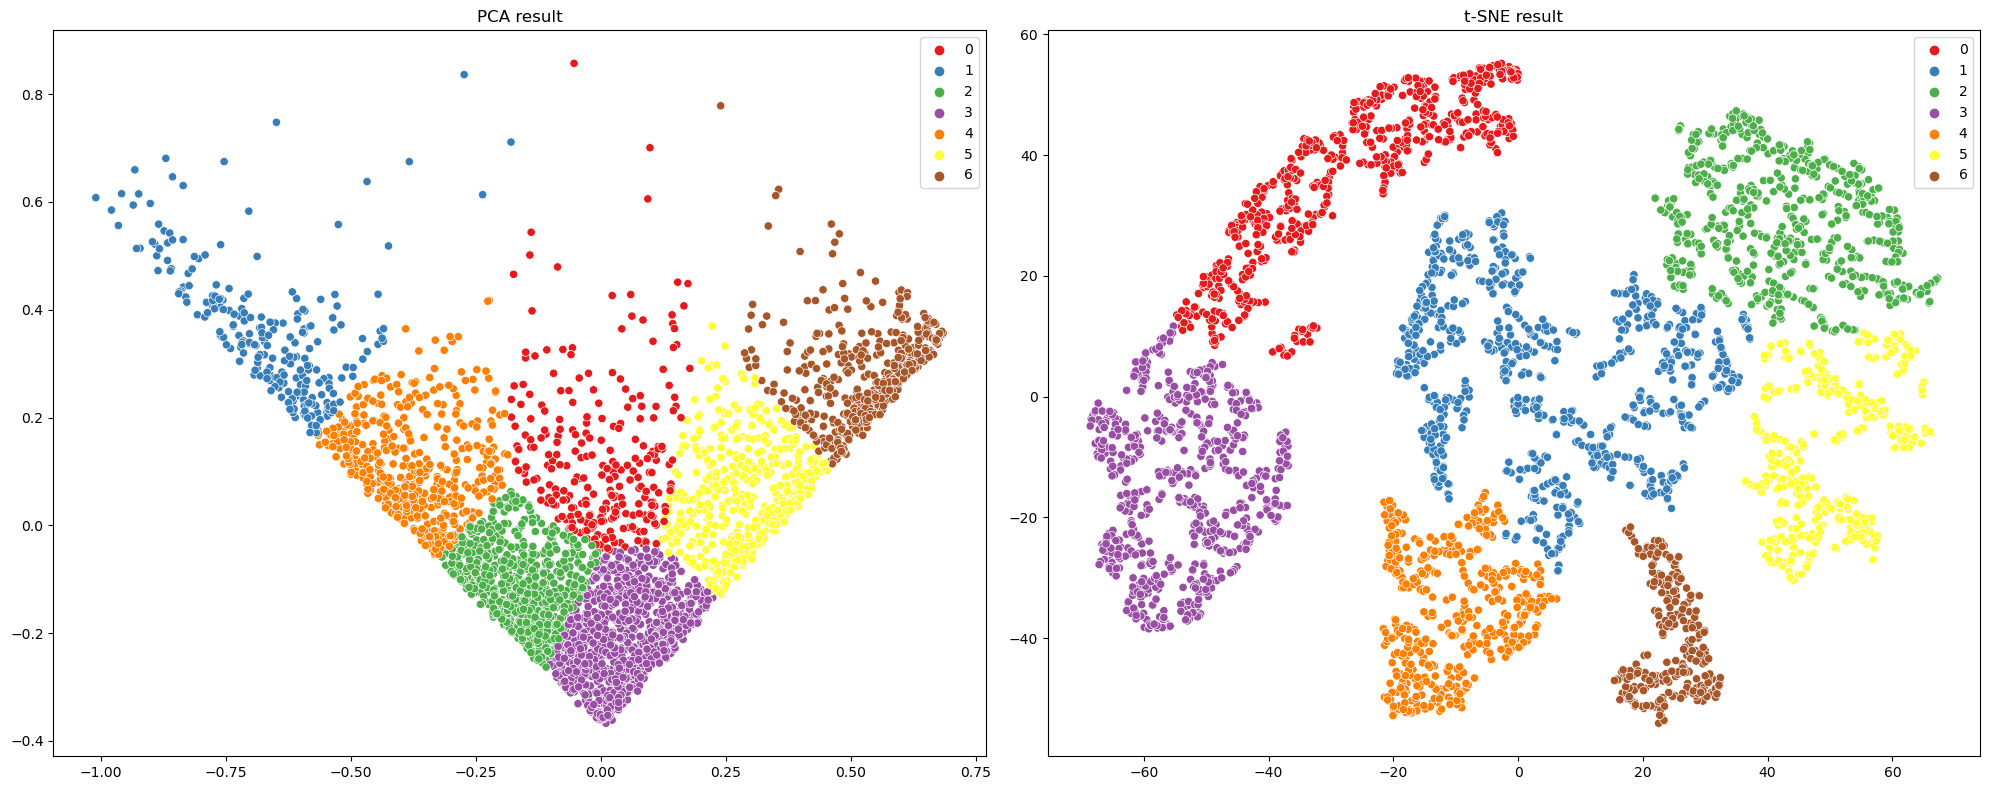

In [103]:
km_pca = cluster.KMeans(**dict(list(rfmq_pca_scores_int['Best_Params'].iloc[0].items())[1:]))
clusters_pca_int = km_pca.fit_predict(rfmq_pca)

ac_tsne = cluster.AgglomerativeClustering(**dict(list(rfmq_tsne_scores_int['Best_Params'].iloc[2].items())[1:]))
clusters_tsne_int = ac_tsne.fit_predict(rfmq_tsne)


plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=rfmq_pca[:,0], y=rfmq_pca[:,1], hue=clusters_pca_int, palette='Set1')
plt.title('PCA result')

plt.subplot(1, 2, 2)
sns.scatterplot(x=rfmq_tsne[:,0], y=rfmq_tsne[:,1], hue=clusters_tsne_int, palette='Set1')
plt.title('t-SNE result')

plt.tight_layout()
plt.show()

Интерпретация кластеризации

In [163]:
rfmq_pca_int = rfmq_table.copy()
rfmq_pca_int['clusters_pca'] = clusters_pca_int
rfmq_pca_int_for_plot = rfmq_pca_int.groupby('clusters_pca').mean()[rfmq_table.columns]

plot_cluster_profile(rfmq_pca_int_for_plot, 7)

In [169]:
interpretation_score(rfmq_table, clusters_pca_int, list(rfmq_table))[0]

Cluster   Recency  Frequency  Monetary  Quantity
0      0.0  0.528465   0.510726  0.640264  0.755363
1      1.0  0.713650   0.102029  0.155407  0.374757
2      2.0  0.045205   0.754734  0.774893  0.863164
3      3.0  0.632157   0.335509  0.299318  0.432216
4      4.0  0.537152   0.470588  0.634056  0.762229
5      5.0  0.006222   0.648296  0.741630  0.747259
6      6.0  0.328147   0.964639  0.695898  0.824611

Для PCA набора получилась схожая кластеризация с RFM таблицей:  
Первый кластер - клиенты, которые совершили по одной-две небольшой покупки, покупают преимущественно в последние 2 месяца.  
Второй кластер - лояльные оптовые клиенты, закупают много и часто, на большие суммы и закупают сейчас.   
Третий кластер - ухоядщие клиенты, котрые уже на закупали от 100 до 200 дней, раньше делали по 1-2 заказу на небольшие суммы.  
Четвертый кластер - лояльные неоптовые клиенты, закупают часто не дорогие заказы, продолжают закупать сейчас.  
Пятый кластер - новые заинтересовавшиеся клиенты, сделали в среднем по 4 заказа, купили на небольшую суммуи в небольшом количестве, последний раз покупали преимущественно в течении полутора месяцев.   
Шестой кластер - ушедшие клиенты, которые сделали один заказ и уже более 7 месяцев не заказывали.  
Седьмой кластер - недовольные клиенты, раньше они закупали в среднем по 4 заказа, на разные суммы и в разных количествах, но уже более 2 месяцев не покупают. 

In [164]:
rfmq_tsne_int = rfmq_table.copy()
rfmq_tsne_int['clusters_tsne'] = clusters_tsne_int
rfmq_tsne_int_for_plot = rfmq_tsne_int.groupby('clusters_tsne').mean()[rfmq_table.columns]

plot_cluster_profile(rfmq_tsne_int_for_plot, 7)

In [189]:
interpretation_score(rfmq_table, clusters_tsne_int, list(rfmq_table))[0]

Cluster   Recency  Frequency  Monetary  Quantity
0      0.0  0.154837   0.217023  0.624686  0.654837
1      1.0  0.717137   0.045296  0.647450  0.774153
2      2.0  0.735654   0.471308  0.808404  0.826278
3      3.0  0.611005   0.207061  0.625636  0.722010
4      4.0  0.777367   0.598520  0.271045  0.394696
5      5.0  0.215264   0.881445  0.903874  0.936207
6      6.0  0.664641   0.043403  0.796875  0.861400

Для t-SNE набора кластеризация также схожа с кластеризацией RFM таблицы:  
Первый кластер - ушедшие клиенты, которые сделали ровно 1 заказ более 100 дней назад и больше не заказывали.   
Второй кластер - лояльные клиенты, которые выставили по 4-5  заказов на небольшие в денежном и количественном выражении, продолжают закупать преимущественно в последние 2 месяца.  
Третий кластер - клиенты, котрые преимущественно в последние 3 месяца сделали либо 2 не крупных заказа, либо один, но больше.  
Четвертый кластер - новые клиенты, совершили ровно одну покупку небольшого количества товара в последние 100 дней.  
Пятый кластер - крупные клиенты, которые совершили либо много крупных в объеме заказов, продолжают закупать, последнюю покупку совершили преимущественно в последние 2 месяца.  
Шестой кластер - уходящие клиенты, которые сделали в среднем 2-3 покупки и уже более 3 месяцев не заказывали.  
Седьмой кластер - лояльные  клиенты, которые совершили ровно три покупки, последняя из которых была в течение ближайших 100 дней.

__________

Теперь попытаемся найти оптимальную кластеризацию для ранее сформированной RFMQ  таблицы с дополнительными признаками.

Понизим размерность до двух признаков

In [316]:
# Pipeline with PCA
pipeline_pca = pipeline.Pipeline([
    ('scaler', preprocessing.MinMaxScaler()), 
    ('pca', decomposition.PCA(n_components=2))  
])

rfmq_plus_pca = pipeline_pca.fit_transform(rfmq_plus)

# Pipeline with t-SNE
pipeline_tsne = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),  
    ('tsne', manifold.TSNE(n_components=2, random_state=42))  
])

rfmq_plus_tsne = pipeline_tsne.fit_transform(rfmq_plus)

In [354]:
rfmq_plus_pca_scores_int = find_optimal_hyperparameters_interp(rfmq_plus_pca, rfmq_plus, n_trials=70)
print('Clustering for PCA RFMQ+ table:')
display(rfmq_plus_pca_scores_int)

rfmq_plus_tsne_scores_int = find_optimal_hyperparameters_interp(rfmq_plus_tsne, rfmq_plus, n_trials=70)
print('Clustering for t-SNE RFMQ+ table:')
display(rfmq_plus_tsne_scores_int)

Clustering for PCA RFMQ+ table:


Algorithm  Best_interpretation_score  Best_Silhouette_Score  \
0                   KMeans                   0.665570               0.437009   
1          GaussianMixture                   0.638229               0.301492   
2  AgglomerativeClustering                   0.667579               0.362781   
3                   DBSCAN                   0.842077              -0.245392   
4                  HDBSCAN                   0.734750               0.168272   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   5966.823412                   0.752348                7   
1                   3749.781001                   1.117198                7   
2                   4515.875376                   0.881559                7   
3                    263.757546                   2.440639                6   
4                   1308.852880                   1.232496                4   

                                         Best_Params  
0           {'metric': 'euclidean', 'n_clusters': 7}  
1  {'metric': 'euclidean', 'n_components': 7, 'co...  
2  {'metric': 'manhattan', 'n_clusters': 7, 'link...  
3  {'metric': 'euclidean', 'eps': 0.0464084687325...  
4  {'metric': 'cosine', 'min_samples': 3, 'min_cl...

Clustering for t-SNE RFMQ+ table:


Algorithm  Best_interpretation_score  Best_Silhouette_Score  \
0                   KMeans                   0.668066               0.487067   
1          GaussianMixture                   0.665200               0.455936   
2  AgglomerativeClustering                   0.628406               0.514013   
3                   DBSCAN                   0.698463               0.283802   
4                  HDBSCAN                   0.846331               0.207047   

   Best_Calinski_Harabasz_Score  Best_Davies_Bouldin_Score  Best_n_clusters  \
0                   4835.566783                   0.725728                6   
1                   4676.589649                   0.729250                6   
2                   4944.242647                   0.792307                7   
3                   1428.572319                   1.264151                6   
4                    969.624599                   0.939192                3   

                                         Best_Params  
0           {'metric': 'euclidean', 'n_clusters': 6}  
1  {'metric': 'manhattan', 'n_components': 6, 'co...  
2  {'metric': 'cosine', 'n_clusters': 7, 'linkage...  
3  {'metric': 'euclidean', 'eps': 5.0515180911178...  
4  {'metric': 'manhattan', 'min_samples': 14, 'mi...

Выбирать оптимальную модель с подобранными гиперпараметрами будем также сбалансировано, обращая внимание на коэффициент интерпретации и остальные метрики.  

Для PCA набора оптимальным кажется алгортим KMeans для 7 кластеров, а для  t_SNE набора - AgglomerativeClustering тоже с 7 кластерами и расстоянием между кластерами 'average'

Интерпретация

In [356]:
km_pca = cluster.KMeans(**dict(list(rfmq_plus_pca_scores_int['Best_Params'].iloc[0].items())[1:]))
clusters_pca_plus_int = km_pca.fit_predict(rfmq_plus_pca)

ac_tsne = cluster.AgglomerativeClustering(**dict(list(rfmq_plus_tsne_scores_int['Best_Params'].iloc[2].items())[1:]))
clusters_tsne_plus_int = ac_tsne.fit_predict(rfmq_plus_tsne)

In [357]:
rfmq_plus_pca_int = rfmq_plus.copy()
rfmq_plus_pca_int['clusters_pca'] = clusters_pca_plus_int
rfmq_plus_pca_int_for_plot = rfmq_plus_pca_int.groupby('clusters_pca').mean()[rfmq_plus.columns]

plot_cluster_profile(rfmq_plus_pca_int_for_plot, 7)

In [359]:
interpretation_score(rfmq_plus, clusters_pca_plus_int, list(rfmq_plus.columns))[0]

Cluster   Recency  Frequency  Monetary  Quantity  Delivery_Region  \
0      0.0  0.003637   0.757502  0.826614  0.832070         0.993028   
1      1.0  0.555377   0.399679  0.689246  0.803531         0.991332   
2      2.0  0.053468   0.637336  0.778796  0.856401         1.000000   
3      3.0  0.727018   0.094451  0.231222  0.375841         0.991872   
4      4.0  0.535285   0.552928  0.695571  0.783408         0.991366   
5      5.0  0.638931   0.179333  0.375789  0.635026         0.991589   
6      6.0  0.265037   0.947161  0.666386  0.820967         1.000000   

   Unique_products  Loyalty_Level  Recent_Orders  
0         0.851167       0.712943       0.216732  
1         0.948315       0.897271       0.596469  
2         0.883899       0.710663       0.210510  
3         0.903868       0.200392       0.999720  
4         0.857357       0.450826       0.359985  
5         0.893962       0.544308       0.998498  
6         0.951939       0.910905       0.693929

In [366]:
for i in range(7):
    display(rfmq_plus_pca_int[rfmq_plus_pca_int['clusters_pca'] == i].describe())

Recency   Frequency     Monetary     Quantity  Delivery_Region  \
count  502.000000  502.000000   502.000000   502.000000       502.000000   
mean   254.288845    1.330677   397.631315   214.932271         1.103586   
std     30.701223    0.667326   401.476092   274.055139         0.342043   
min    200.000000    1.000000     0.000000     0.000000         1.000000   
25%    232.000000    1.000000   154.975000    72.500000         1.000000   
50%    254.000000    1.000000   299.655000   141.000000         1.000000   
75%    280.000000    2.000000   457.247500   255.750000         1.000000   
max    310.000000    6.000000  3648.720000  3906.000000         3.000000   

       Unique_products  Loyalty_Level  Recent_Orders  clusters_pca  
count       502.000000     502.000000          502.0         502.0  
mean         21.657371       1.241036            0.0           0.0  
std          21.027739       0.489072            0.0           0.0  
min           1.000000       1.000000            0.0           0.0  
25%           8.000000       1.000000            0.0           0.0  
50%          17.000000       1.000000            0.0           0.0  
75%          27.000000       1.000000            0.0           0.0  
max         158.000000       3.000000            0.0           0.0

Recency   Frequency     Monetary     Quantity  Delivery_Region  \
count  686.000000  686.000000   686.000000   686.000000       686.000000   
mean    26.883382    3.542274  1109.052915   668.555394         1.083090   
std     20.155261    0.828572   605.881444   427.568002         0.286596   
min      0.000000    1.000000    36.560000    17.000000         1.000000   
25%     10.000000    3.000000   678.272500   339.500000         1.000000   
50%     23.000000    3.000000   972.655000   564.500000         1.000000   
75%     39.000000    4.000000  1383.230000   891.000000         1.000000   
max     81.000000    7.000000  4151.260000  2672.000000         3.000000   

       Unique_products  Loyalty_Level  Recent_Orders  clusters_pca  
count       686.000000     686.000000     686.000000         686.0  
mean         67.725948       3.010204       1.902332           1.0  
std          49.324347       0.778290       0.978943           0.0  
min           1.000000       1.000000       1.000000           1.0  
25%          33.000000       3.000000       1.000000           1.0  
50%          56.000000       3.000000       2.000000           1.0  
75%          87.750000       3.000000       3.000000           1.0  
max         312.000000       5.000000       5.000000           1.0

Recency   Frequency     Monetary     Quantity  Delivery_Region  \
count  528.000000  528.000000   528.000000   528.000000       528.000000   
mean   147.331439    1.587121   440.031799   284.109848         1.106061   
std     32.406778    0.705081   357.245675   330.738744         0.354051   
min     91.000000    1.000000    15.000000     1.000000         1.000000   
25%    119.000000    1.000000   187.837500   103.000000         1.000000   
50%    149.500000    1.000000   337.590000   197.500000         1.000000   
75%    176.000000    2.000000   596.340000   348.000000         1.000000   
max    203.000000    4.000000  3096.000000  4300.000000         3.000000   

       Unique_products  Loyalty_Level  Recent_Orders  clusters_pca  
count       528.000000     528.000000          528.0         528.0  
mean         26.642045       1.460227            0.0           2.0  
std          24.637845       0.573224            0.0           0.0  
min           1.000000       1.000000            0.0           2.0  
25%          10.000000       1.000000            0.0           2.0  
50%          20.500000       1.000000            0.0           2.0  
75%          34.000000       2.000000            0.0           2.0  
max         153.000000       3.000000            0.0           2.0

Recency   Frequency     Monetary     Quantity  Delivery_Region  \
count  233.000000  233.000000   233.000000   233.000000       233.000000   
mean    19.420601    9.635193  3217.295451  1994.480687         1.094421   
std     24.711855    1.602788  1068.011898  1018.727524         0.293043   
min      0.000000    6.000000  1177.530000   352.000000         1.000000   
25%      5.000000    8.000000  2411.680000  1275.000000         1.000000   
50%     12.000000   10.000000  3093.920000  1823.000000         1.000000   
75%     23.000000   11.000000  3957.780000  2479.000000         1.000000   
max    217.000000   12.000000  5655.480000  9322.000000         2.000000   

       Unique_products  Loyalty_Level  Recent_Orders  clusters_pca  
count       233.000000     233.000000     233.000000         233.0  
mean        137.755365       7.090129       3.236052           3.0  
std          90.486021       1.394427       1.581162           0.0  
min           4.000000       3.000000       0.000000           3.0  
25%          82.000000       6.000000       2.000000           3.0  
50%         115.000000       7.000000       3.000000           3.0  
75%         172.000000       8.000000       4.000000           3.0  
max         579.000000      10.000000       9.000000           3.0

Recency    Frequency     Monetary     Quantity  Delivery_Region  \
count  1137.000000  1137.000000  1137.000000  1137.000000      1137.000000   
mean     40.986807     1.456464   428.067300   275.098505         1.092348   
std      24.682790     0.545545   316.621881   237.765061         0.307339   
min       0.000000     1.000000     0.000000     0.000000         1.000000   
25%      19.000000     1.000000   202.680000   117.000000         1.000000   
50%      39.000000     1.000000   349.700000   211.000000         1.000000   
75%      63.000000     2.000000   574.440000   354.000000         1.000000   
max      89.000000     3.000000  2601.550000  2100.000000         3.000000   

       Unique_products  Loyalty_Level  Recent_Orders  clusters_pca  
count      1137.000000    1137.000000    1137.000000        1137.0  
mean         29.620932       1.376429       1.149516           4.0  
std          24.799790       0.493700       0.366491           0.0  
min           1.000000       1.000000       1.000000           4.0  
25%          12.000000       1.000000       1.000000           4.0  
50%          23.000000       1.000000       1.000000           4.0  
75%          40.000000       2.000000       1.000000           4.0  
max         170.000000       3.000000       3.000000           4.0

Recency   Frequency     Monetary     Quantity  Delivery_Region  \
count  472.000000  472.000000   472.000000   472.000000       472.000000   
mean    26.959746    6.074153  2132.115657  1329.675847         1.105932   
std     22.919421    1.278937   920.866304   794.076201         0.314894   
min      0.000000    3.000000   306.720000    95.000000         1.000000   
25%      9.000000    5.000000  1439.122500   792.250000         1.000000   
50%     21.000000    6.000000  2002.975000  1212.000000         1.000000   
75%     40.000000    7.000000  2701.570000  1685.250000         1.000000   
max    108.000000   10.000000  5568.350000  8000.000000         3.000000   

       Unique_products  Loyalty_Level  Recent_Orders  clusters_pca  
count       472.000000     472.000000     472.000000         472.0  
mean        101.904661       4.826271       2.385593           5.0  
std          63.475704       1.021795       1.464239           0.0  
min           1.000000       2.000000       0.000000           5.0  
25%          58.000000       4.000000       1.000000           5.0  
50%          90.000000       5.000000       2.000000           5.0  
75%         131.000000       5.000000       3.000000           5.0  
max         370.000000       8.000000       9.000000           5.0

Recency   Frequency     Monetary     Quantity  Delivery_Region  \
count  243.000000  243.000000   243.000000   243.000000       243.000000   
mean   118.991770    3.930041  1458.704568   944.567901         1.139918   
std     39.943658    1.278899   910.368599   923.496933         0.412825   
min     66.000000    1.000000    70.020000    20.000000         1.000000   
25%     88.000000    3.000000   830.810000   428.000000         1.000000   
50%    108.000000    4.000000  1213.730000   750.000000         1.000000   
75%    138.000000    4.000000  1809.340000  1137.500000         1.000000   
max    264.000000   10.000000  4873.810000  7824.000000         3.000000   

       Unique_products  Loyalty_Level  Recent_Orders  clusters_pca  
count       243.000000     243.000000     243.000000         243.0  
mean         63.818930       3.440329       0.279835           6.0  
std          54.004898       0.904271       0.458939           0.0  
min           1.000000       1.000000       0.000000           6.0  
25%          29.500000       3.000000       0.000000           6.0  
50%          50.000000       3.000000       0.000000           6.0  
75%          80.000000       4.000000       1.000000           6.0  
max         420.000000       6.000000       2.000000           6.0

Для PCA набора:  
Первая группа - ушедшие клиенты, которые совершили 1-2 покупки, но уже не заказывали более 200 дней.  
Вторая группа - лояльные клиенты, которые совершили в среднем 3-4 неюольшие покупки, продолжают покупать и в последние 3 месяца совершили по 1-2 покупки.  
Третья группа - уходящие клиенты, совершили 1-2 не очень крупных покупки, но последний раз покупали в период от 90 до 200 дней.  
Четвертая группа - это лояльные оптовые клиенты, которые покупают постоянно и в большом объеме, продолжают покупать сейчас.   
Пятая группа -  это новые пробующие клиенты, они сделали либо первую покупку в последние 3 месяца, либо у них это вторая покупка, которой предшествовала одна небольшая покупка ранее.  
Шестая группа - это лояльные неоптовые клиенты, которые покупают постоянно и преимущественно от 1500 до 3000 фунтов, продолжают активно покупать в последние 3 месяца.  
Седьмая группа - это недовольные клиенты, которые раньше покупали постоянно, совершив 3-4 покупки в среднем, но в последние 2 месяца перестали покупать.


In [360]:
rfmq_plus_tsne_int = rfmq_plus.copy()
rfmq_plus_tsne_int['clusters_tsne'] = clusters_tsne_plus_int
rfmq_plus_tsne_int_for_plot = rfmq_plus_tsne_int.groupby('clusters_tsne').mean()[rfmq_plus.columns]

plot_cluster_profile(rfmq_plus_tsne_int_for_plot, 7)

In [365]:
interpretation_score(rfmq_plus, clusters_tsne_plus_int, list(rfmq_plus.columns))[0]

Cluster   Recency  Frequency  Monetary  Quantity  Delivery_Region  \
0      0.0  0.609065   0.503935  0.799811  0.801700         0.890777   
1      1.0  0.547842   0.505941  0.813634  0.866166         0.891495   
2      2.0  0.179471   0.470088  0.667191  0.682935         0.890743   
3      3.0  0.993631   0.990446  0.977707  0.982629         0.000000   
4      4.0  0.595016   0.474766  0.781308  0.793146         0.891900   
5      5.0  0.217457   0.962807  0.871326  0.924715         0.895921   
6      6.0  0.678539   0.351551  0.300276  0.363832         0.893460   

   Unique_products  Loyalty_Level  Recent_Orders  
0         0.919736       0.496695       0.274473  
1         0.949031       0.902126       0.589118  
2         0.721977       0.254093       0.186398  
3         0.945570       0.997394       0.989288  
4         0.804984       0.261682       0.281308  
5         0.947510       0.905519       0.224955  
6         0.914952       0.561560       1.000000

In [364]:
for i in range(7):
    display(rfmq_plus_tsne_int[rfmq_plus_tsne_int['clusters_tsne'] == i].describe())


Recency   Frequency     Monetary     Quantity  Delivery_Region  \
count  624.000000  624.000000   624.000000   624.000000            624.0   
mean    42.168269    3.059295   814.741154   472.099359              1.0   
std     25.114292    1.299961   521.544524   326.148584              0.0   
min      0.000000    1.000000     2.900000     2.000000              1.0   
25%     21.750000    2.000000   419.610000   233.750000              1.0   
50%     40.000000    3.000000   679.925000   375.000000              1.0   
75%     64.000000    4.000000  1096.407500   641.250000              1.0   
max    127.000000   11.000000  3276.400000  1759.000000              1.0   

       Unique_products  Loyalty_Level  Recent_Orders  clusters_tsne  
count       624.000000     624.000000     624.000000          624.0  
mean         48.700321       2.847756       0.996795            0.0  
std          34.797533       1.058889       0.056568            0.0  
min           1.000000       1.000000       0.000000            0.0  
25%          23.750000       2.000000       1.000000            0.0  
50%          40.000000       3.000000       1.000000            0.0  
75%          69.000000       3.000000       1.000000            0.0  
max         174.000000       7.000000       1.000000            0.0

Recency   Frequency     Monetary     Quantity  Delivery_Region  \
count  603.000000  603.000000   603.000000   603.000000            603.0   
mean    22.936982    3.412935  1020.142090   612.917081              1.0   
std     18.430150    1.270793   599.129359   407.257659              0.0   
min      0.000000    1.000000    36.560000    17.000000              1.0   
25%      9.000000    2.000000   594.065000   305.500000              1.0   
50%     19.000000    3.000000   895.130000   525.000000              1.0   
75%     31.500000    4.000000  1368.045000   840.500000              1.0   
max     88.000000    8.000000  3861.000000  2319.000000              1.0   

       Unique_products  Loyalty_Level  Recent_Orders  clusters_tsne  
count       603.000000     603.000000     603.000000          603.0  
mean         65.573798       2.767828       2.323383            1.0  
std          52.835347       1.171006       0.698765            0.0  
min           1.000000       1.000000       1.000000            1.0  
25%          29.000000       2.000000       2.000000            1.0  
50%          51.000000       3.000000       2.000000            1.0  
75%          86.000000       3.000000       3.000000            1.0  
max         312.000000       7.000000       5.000000            1.0

Recency   Frequency     Monetary     Quantity  Delivery_Region  \
count  625.000000  625.000000   625.000000   625.000000            625.0   
mean   209.747200    1.070400   291.873600   171.780800              1.0   
std     61.750325    0.274161   237.884641   167.712661              0.0   
min     91.000000    1.000000     0.000000     0.000000              1.0   
25%    159.000000    1.000000   137.100000    66.000000              1.0   
50%    217.000000    1.000000   229.330000   125.000000              1.0   
75%    263.000000    1.000000   361.280000   226.000000              1.0   
max    310.000000    3.000000  1998.000000  1500.000000              1.0   

       Unique_products  Loyalty_Level  Recent_Orders  clusters_tsne  
count       625.000000     625.000000          625.0          625.0  
mean         18.099200       1.004800            0.0            2.0  
std          15.482716       0.069171            0.0            0.0  
min           1.000000       1.000000            0.0            2.0  
25%           8.000000       1.000000            0.0            2.0  
50%          14.000000       1.000000            0.0            2.0  
75%          24.000000       1.000000            0.0            2.0  
max         107.000000       2.000000            0.0            2.0

Recency   Frequency     Monetary     Quantity  Delivery_Region  \
count  347.000000  347.000000   347.000000   347.000000       347.000000   
mean    82.876081    2.913545  1267.915159   767.965418         2.083573   
std     84.517564    2.414675  1201.297111   800.511021         0.277147   
min      0.000000    1.000000     0.000000     0.000000         2.000000   
25%     19.000000    1.000000   404.530000   223.500000         2.000000   
50%     53.000000    2.000000   830.980000   476.000000         2.000000   
75%    115.500000    4.000000  1723.415000  1093.000000         2.000000   
max    310.000000   12.000000  5655.480000  6481.000000         3.000000   

       Unique_products  Loyalty_Level  Recent_Orders  clusters_tsne  
count       347.000000     347.000000     347.000000          347.0  
mean         51.311239       2.585014       1.121037            3.0  
std          46.742512       1.940027       1.178954            0.0  
min           1.000000       1.000000       0.000000            3.0  
25%          20.000000       1.000000       0.000000            3.0  
50%          35.000000       2.000000       1.000000            3.0  
75%          65.500000       3.000000       2.000000            3.0  
max         259.000000       9.000000       6.000000            3.0

Recency   Frequency     Monetary     Quantity  Delivery_Region  \
count  591.000000  591.000000   591.000000   591.000000            591.0   
mean    45.150592    1.016920   340.595871   226.729272              1.0   
std     24.248348    0.129083   294.270706   229.943400              0.0   
min      1.000000    1.000000     0.000000     0.000000              1.0   
25%     24.000000    1.000000   157.870000    91.000000              1.0   
50%     46.000000    1.000000   272.220000   166.000000              1.0   
75%     65.000000    1.000000   412.800000   278.500000              1.0   
max     89.000000    2.000000  2291.810000  2100.000000              1.0   

       Unique_products  Loyalty_Level  Recent_Orders  clusters_tsne  
count       591.000000     591.000000          591.0          591.0  
mean         23.514382       1.003384            1.0            4.0  
std          19.842585       0.058124            0.0            0.0  
min           1.000000       1.000000            1.0            4.0  
25%           9.000000       1.000000            1.0            4.0  
50%          18.000000       1.000000            1.0            4.0  
75%          31.000000       1.000000            1.0            4.0  
max         128.000000       2.000000            1.0            4.0

Recency   Frequency     Monetary     Quantity  Delivery_Region  \
count  467.000000  467.000000   467.000000   467.000000            467.0   
mean   164.334047    2.933619   844.452634   516.447537              1.0   
std     54.492270    1.416444   653.774004   513.561538              0.0   
min     91.000000    1.000000    52.000000    20.000000              1.0   
25%    116.000000    2.000000   388.885000   189.000000              1.0   
50%    156.000000    2.000000   657.900000   365.000000              1.0   
75%    198.000000    3.000000  1057.370000   661.000000              1.0   
max    310.000000   12.000000  4464.100000  4300.000000              1.0   

       Unique_products  Loyalty_Level  Recent_Orders  clusters_tsne  
count       467.000000     467.000000          467.0          467.0  
mean         43.685225       2.565310            0.0            5.0  
std          35.957078       0.941141            0.0            0.0  
min           1.000000       1.000000            0.0            5.0  
25%          18.000000       2.000000            0.0            5.0  
50%          34.000000       2.000000            0.0            5.0  
75%          58.000000       3.000000            0.0            5.0  
max         187.000000       6.000000            0.0            5.0

Recency   Frequency     Monetary     Quantity  Delivery_Region  \
count  544.000000  544.000000   544.000000   544.000000            544.0   
mean    24.321691    7.428309  2662.391379  1724.207721              1.0   
std     25.274868    2.305092  1055.795525  1001.981982              0.0   
min      0.000000    1.000000   515.730000   206.000000              1.0   
25%      7.000000    6.000000  1855.987500  1089.250000              1.0   
50%     16.000000    7.000000  2542.155000  1551.500000              1.0   
75%     33.000000    9.000000  3340.832500  2063.750000              1.0   
max    169.000000   12.000000  5589.830000  9322.000000              1.0   

       Unique_products  Loyalty_Level  Recent_Orders  clusters_tsne  
count       544.000000     544.000000     544.000000          544.0  
mean        123.965074       5.566176       2.862132            6.0  
std          80.658390       1.706675       1.631109            0.0  
min           1.000000       1.000000       0.000000            6.0  
25%          71.000000       4.000000       2.000000            6.0  
50%         108.500000       5.000000       3.000000            6.0  
75%         155.000000       7.000000       4.000000            6.0  
max         579.000000      10.000000       9.000000            6.0

Для t-SNE  набора:  
Первая группа - непостоянные клиенты, которые раньше совершили в среднем 2 покупки на небольшие суммы, но за последние 3 месяца совершили только одну покупку, из Великобритании и Ирландии.  
Вторая группа - заинтересовавшиеся клиенты, которые совершили 1-2 покупки ранее, но и впоследние 3 месяца совершают по 2-3 покупки,  из Великобритании и Ирландии.  
Третья группа - ушедшие клиенты, которые сделали ровно 1 заказ более 3 месяцев назад и больше не заказывали.     
Четвертая группа - клиенты не из Великобритании и Ирландии, объединенные в одну группу.      
Пятая группа -  новые пробующие клиенты, которые сделали одну небольшую покупку в последние 3 месяца, з Великобритании и Ирландии.  
Шестая группа - уходящие клиенты, которы не делали покупок уже 3 месяца, преимущественно полгода, до этого в среднем совершили 3 покупки, из Великобритании и Ирландии.  
Седьмая группа - лояльные оптовые клиенты, которые покупают постоянно и много, в среднем более 7 заказов, в последние 3 месяца сделали 2-3 заказа, из Великобритании и Ирландии.

## 4. Выводы и оформление работы

В рамках данного проекта были проведены следующие этапы:  
- первичный анализ и очистка данных;
- разведывательный анализ;
- формирование RFM таблицы, RFMQ таблицы и RFMQ таблицы, дополненной сгенерированными признакми;
- для всех таблиц проведено исследование по поиску оптимальной кластеризации, понижению размерности;
- визуализация и интерпретация кластеризации.


В целях исследования по поиску оптимальной кластеризации была написана функция, оптимизирующая с помощью библиотеки Optuna гиперпараметры пяти алгоритмов кластеризации: KMeans, GaussianMixture, AgglomerativeClustering, DBSCAN, HDBSCAN, оптимизация проводилась по метрики silhouette_score, также учитывались calinski_harabasz_score и davies_bouldin_score. В целях маркетинговой значимости количество кластеров было огрангичено от 3 до 10. Исследования данной функцией проводилась на сформированных таблицах с понижением размерности алгоритмом PCA b t-SNE, также для RFM таблицы выполнен подбор гиперпараметров без понижения размерности на стандартизированном и нормализованном датафрейме.  

В качестве эксперимента был разработан коэффициент интерпретации кластеризации, который численно может показать, насколько получившаяся кластеризация может быть хорошо интерпретируема. На основании данного коэффициента также был проведен поиск оптимальной кластеризацией доработанной ранее написанной функцией.  

Результаты лучших кластеризаций представлены в таблице ниже: 

По метрики silhouette_score:
| N  | Таблица |Предобработка| Алгоритм | Параметры | silhouette_score | Количество кластеров |
|:---|:-------:|:-----------:|:--------:|:---------:|:----------------:|:--------------------:|
|1|RFM | MinMax and PCA | GaussianMixture|{'n_components': 3, 'covariance_type': 'full'}|0.74|3 |
|2|RFMQ | MinMax and PCA | GaussianMixture|{'n_components': 3, 'covariance_type': 'full'}|0.75|3 |
|3|RFMQ+ | Standard and t-SNE | KMeans|{'n_clusters': 9}|0.62|9 |

С учетом коэффициента интерпретации:
| N  | Таблица |Предобработка| Алгоритм | Параметры | silhouette_score | Количество кластеров |
|:---|:-------:|:-----------:|:--------:|:---------:|:----------------:|:--------------------:|
|4|RFM | MinMax and PCA | GaussianMixture|{'n_components': 7, 'covariance_type': 'spherical'}|0.43|7 |
|5|RFMQ | Standard and t-SNE| AgglomerativeClustering|{'n_clusters'=7, 'linkage'='average'}|0.44|7 |
|6|RFMQ+ | Standard and t-SNE | AgglomerativeClustering|{'n_clusters'=7, 'linkage'='average'}|0.51|7 |

Для понимания профиля клиента и интуитивно результаты кластеризации с учетом коэффициента интерпретации дали более понятный результат.  

Интерпритации и визуализации представлены в самих исследованиях.


